In [1]:
import math
import numpy as np

In [2]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [3]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [4]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [5]:
import random,numpy as np
rad0=50.
ecc0=0.9
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.9
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50.0, 0.9, array([1., 1.]))


In [6]:
def getxyuveqtwoellipses(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, eccentricity, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ux0=0.
    uy0=0.
    uz0=0.
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    #masses=np.zeros(2)
    #masses[0]=masses[1]+masses[0]
    #masses[1]=(masses[1]*masses[0])/(masses[1]+masses[0])
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius #NO REDUCED MASS 
        #focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        coordsep=orbitalr*(1+eccentricity) #start at aphelion
        x0=(coordsep)*cosphi
        y0=(coordsep)*sinphi
        starsep=np.sqrt((x0[0]-x0[1])**2+(y0[0]-y0[1])**2) #two stars, at opposite ends of the orbit
        Fapastron=masses[1]*masses[0]/starsep**2
        #print('xycomp',coordsep,focusdisp,x0,y0)
        #x0[0]=0.0
        #y0[0]=0.0
        v=np.zeros(2)
        #v= np.sqrt(masses[1]*masses[0]/masses*(2./starsep-1./(2*orbitalr)))
        vapsq=masses[1]*masses[0]/masses/orbitalr*(1-eccentricity)/(1+eccentricity)/4.
        #vapsq=masses[1]*masses[0]/masses*(1./(coordsep)-1./orbitalr)/2.
        v=np.sqrt(vapsq)
        #v= np.sqrt(masses[1]*masses[0]/masses*(1./orbitalr-2./starsep))
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        print("vstuff", coordsep,orbitalr, 2./coordsep, 1./orbitalr, (2./starsep-1./(2.*orbitalr)), 1./(coordsep))
        
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v[0]*sinphi
        uy0=v[1]*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a[0]*cosphi
        ay0=-a[1]*sinphi
        az0=np.zeros(2)

    statevec=[]
    avec=[]
    for i in np.arange(len(x0)):
        stateveci=np.array([x0[i],y0[i],z0[i],ux0[i],uy0[i],uz0[i]])
        aveci=np.array([ax0[i],ay0[i],az0[i]])
        statevec.append(stateveci)
        avec.append(aveci)
    statevecnp=np.array(statevec)
    avecnp=np.array(avec)
    return masses, statevecnp,avecnp

In [7]:
xyuvaeqellipse=getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50.0 [3.66519143 0.52359878] 0.9 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50.0
[-43.30127019  43.30127019]
[-25.  25.]
0.9
vstuff 95.0 50.0 0.021052631578947368 0.02 0.000526315789473682 0.010526315789473684
(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [8]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [9]:
class OrbitDiffEqOld:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    axii[j]-=Gconstant*self.masses[k]*(xvec[j,0]  - xvec[k,0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    ayii[j]-=Gconstant*self.masses[k]*(xvec[j,1]  - xvec[k,1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    azii[j]-=Gconstant*self.masses[k]*(xvec[j,2]  - xvec[k,2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)
        #xii = intvalx
        #tnew,intvalvx=RK4implicit(h,self.ti,self.vxi,self.dvxidt)
        #vxii=intvalvx
        #tnew,intvaly=RK4implicit(h,self.ti,self.yi,self.dyidt)
        #yii = intvaly
        #tnew,intvalvy=RK4implicit(h,self.ti,self.vyi,self.dvyidt)
        #vyii=intvalvy
        #tnew,intvalz=RK4implicit(h,self.ti,self.zi,self.dzidt)
        #zii = intvalz
        #tnew,intvalvz=RK4implicit(h,self.ti,self.vzi,self.dvzidt)
        #vzii=intvalvz
        #axii=self.dvxidt(self.ti,np.zeros(np.shape(self.xi)))
        #ayii=self.dvyidt(self.ti,np.zeros(np.shape(self.yi)))
        #azii=self.dvzidt(self.ti,np.zeros(np.shape(self.zi)))
 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [10]:
class OrbitDiffEq:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3])**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,0])):
            for j in np.arange(len(xvec[:,0])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    axii[j]-=Gconstant*self.masses[k]*(vecshift[0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    ayii[j]-=Gconstant*self.masses[k]*(vecshift[1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.squm(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    azii[j]-=Gconstant*self.masses[k]*(vecshift[2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)

 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [11]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0


In [12]:
dt=1 #natural units #*31556926 #seconds per year
numsteps=6000
masses,xvec0,avec0=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec0,avec0,0.0)
ODEeq.print2D()
t=0.0
star1x=[]
star2x=[]
star1a=[]
star2a=[]
times=[]
for i in np.arange(1,numsteps):
    masses,xvec,avec,t=ODEeq.timestepRK4ODE(i,dt)
    ODEeq.print2D()
    star1x.append(xvec[0])
    star2x.append(xvec[1])
    star1a.append(avec[0])
    star2a.append(avec[1])
    times.append(t)



[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
avec [[ 2.39896234e-05 -2.39896234e-05]
 [ 1.38504155e-05 -1.38504155e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39884406e-05 -2.39884406e-05]
 [ 1.38524636e-05 -1.38524636e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39884441e-05 -2.39884441e-05]
 [ 1.38524656e-05 -1.38524656e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39872642e-05 -2.39872642e-05]
 [ 1.38545154e-05 -1.38545154e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.22642903e+01 -4.75140419e+01  0.00000000e+00  8.13505950e-03
  -1.40349347e-02  0.00000000e+00]
 [ 8.22642903e+01  4.75140419e+01  0.00000000e+00 -8.13505950e-03
   1.40349347e-02  0.00000000e+00]] 1.0
avec [[ 2.39872642e-05 -2.39872642e-05]
 [ 1.38545154e-05 -1.38545154e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39860

avec [[ 2.39044843e-05 -2.39044843e-05]
 [ 1.40198587e-05 -1.40198587e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.19288028e+01 -4.80508267e+01  0.00000000e+00  9.06889027e-03
  -1.34914192e-02  0.00000000e+00]
 [ 8.19288028e+01  4.80508267e+01  0.00000000e+00 -9.06889027e-03
   1.34914192e-02  0.00000000e+00]] 40.0
avec [[ 2.39044843e-05 -2.39044843e-05]
 [ 1.40198587e-05 -1.40198587e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39035376e-05 -2.39035376e-05]
 [ 1.40220476e-05 -1.40220476e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39035410e-05 -2.39035410e-05]
 [ 1.40220496e-05 -1.40220496e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39025972e-05 -2.39025972e-05]
 [ 1.40242403e-05 -1.40242403e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.19197219e+01 -4.80643111e+01  0.00000000e+00  9.09279381e-03
  -1.34773972e-02  0.00000000e+00]
 [ 8.19197219e+01  4.80643111e+01  0.00000000e+00 -9.09279381e-03
   1.34773972e-02  0.00000000e+00]] 41.0
avec [[ 2.390

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38782680e-05 -2.38782680e-05]
 [ 1.40841054e-05 -1.40841054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38774061e-05 -2.38774061e-05]
 [ 1.40863472e-05 -1.40863472e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.17900812e+01 -4.82516183e+01  0.00000000e+00  9.42725116e-03
  -1.32806247e-02  0.00000000e+00]
 [ 8.17900812e+01  4.82516183e+01  0.00000000e+00 -9.42725116e-03
   1.32806247e-02  0.00000000e+00]] 55.0
avec [[ 2.38774061e-05 -2.38774061e-05]
 [ 1.40863472e-05 -1.40863472e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38765470e-05 -2.38765470e-05]
 [ 1.40885908e-05 -1.40885908e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38765505e-05 -2.38765505e-05]
 [ 1.40885929e-05 -1.40885929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38756943e-05 -2.38756943e-05]
 [ 1.40908383e-05 -1.40908383e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.17806420e+01 -4.82648919e+01  0.00000000e+00  9.45112771e-03
  -1.326

 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.38366853e-05 -2.38366853e-05]
 [ 1.42055370e-05 -1.42055370e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.15369069e+01 -4.85921401e+01  0.00000000e+00  1.00475173e-02
  -1.29128412e-02  0.00000000e+00]
 [ 8.15369069e+01  4.85921401e+01  0.00000000e+00 -1.00475173e-02
   1.29128412e-02  0.00000000e+00]] 81.0
avec [[ 2.38366853e-05 -2.38366853e-05]
 [ 1.42055370e-05 -1.42055370e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38359775e-05 -2.38359775e-05]
 [ 1.42078780e-05 -1.42078780e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38359809e-05 -2.38359809e-05]
 [ 1.42078801e-05 -1.42078801e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.3835276e-05 -2.3835276e-05]
 [ 1.4210223e-05 -1.4210223e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-8.15268475e+01 -4.86050458e+01  0.00000000e+00  1.00713533e-02
  -1.28986333e-02  0.00000000e+00]
 [ 8.15268475e+01  4.86050458e+01  0.00000000e+00 -1.00713533e-02
   1.28986333e-02  0.00000

avec [[ 2.38072014e-05 -2.38072014e-05]
 [ 1.43152620e-05 -1.43152620e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.12995120e+01 -4.88853685e+01  0.00000000e+00  1.05954103e-02
  -1.25848599e-02  0.00000000e+00]
 [ 8.12995120e+01  4.88853685e+01  0.00000000e+00 -1.05954103e-02
   1.25848599e-02  0.00000000e+00]] 104.0
avec [[ 2.38072014e-05 -2.38072014e-05]
 [ 1.43152620e-05 -1.43152620e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38066266e-05 -2.38066266e-05]
 [ 1.43176919e-05 -1.43176919e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38066301e-05 -2.38066301e-05]
 [ 1.43176940e-05 -1.43176940e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38060583e-05 -2.38060583e-05]
 [ 1.43201260e-05 -1.43201260e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.12889046e+01 -4.88979462e+01  0.00000000e+00  1.06192169e-02
  -1.25705422e-02  0.00000000e+00]
 [ 8.12889046e+01  4.88979462e+01  0.00000000e+00 -1.06192169e-02
   1.25705422e-02  0.00000000e+00]] 105.0
avec [[ 2.3

[1. 1.] [[-8.10159876e+01 -4.92077219e+01  0.00000000e+00  1.12140430e-02
  -1.22109971e-02  0.00000000e+00]
 [ 8.10159876e+01  4.92077219e+01  0.00000000e+00 -1.12140430e-02
   1.22109971e-02  0.00000000e+00]] 130.0
avec [[ 2.3781231e-05 -2.3781231e-05]
 [ 1.4444312e-05 -1.4444312e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.37808062e-05 -2.37808062e-05]
 [ 1.44468460e-05 -1.44468460e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37808097e-05 -2.37808097e-05]
 [ 1.44468481e-05 -1.44468481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37803878e-05 -2.37803878e-05]
 [ 1.44493842e-05 -1.44493842e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.10047617e+01 -4.92199257e+01  0.00000000e+00  1.12378238e-02
  -1.21965503e-02  0.00000000e+00]
 [ 8.10047617e+01  4.92199257e+01  0.00000000e+00 -1.12378238e-02
   1.21965503e-02  0.00000000e+00]] 131.0
avec [[ 2.37803878e-05 -2.37803878e-05]
 [ 1.44493842e-05 -1.44493842e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.3779968

[1. 1.] [[-8.07045427e+01 -4.95321370e+01  0.00000000e+00  1.18558646e-02
  -1.18191264e-02  0.00000000e+00]
 [ 8.07045427e+01  4.95321370e+01  0.00000000e+00 -1.18558646e-02
   1.18191264e-02  0.00000000e+00]] 157.0
avec [[ 2.37625060e-05 -2.37625060e-05]
 [ 1.45841568e-05 -1.45841568e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37622367e-05 -2.37622367e-05]
 [ 1.45868029e-05 -1.45868029e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37622402e-05 -2.37622402e-05]
 [ 1.45868050e-05 -1.45868050e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37619737e-05 -2.37619737e-05]
 [ 1.45894532e-05 -1.45894532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.06926750e+01 -4.95439489e+01  0.00000000e+00  1.18796268e-02
  -1.18045396e-02  0.00000000e+00]
 [ 8.06926750e+01  4.95439489e+01  0.00000000e+00 -1.18796268e-02
   1.18045396e-02  0.00000000e+00]] 158.0
avec [[ 2.37619737e-05 -2.37619737e-05]
 [ 1.45894532e-05 -1.45894532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.3

avec [[ 2.37520586e-05 -2.37520586e-05]
 [ 1.47329334e-05 -1.47329334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37520621e-05 -2.37520621e-05]
 [ 1.47329356e-05 -1.47329356e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37519510e-05 -2.37519510e-05]
 [ 1.47357004e-05 -1.47357004e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.03632653e+01 -4.98573360e+01  0.00000000e+00  1.25210459e-02
  -1.14086642e-02  0.00000000e+00]
 [ 8.03632653e+01  4.98573360e+01  0.00000000e+00 -1.25210459e-02
   1.14086642e-02  0.00000000e+00]] 185.0
avec [[ 2.37519510e-05 -2.37519510e-05]
 [ 1.47357004e-05 -1.47357004e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37518428e-05 -2.37518428e-05]
 [ 1.47384674e-05 -1.47384674e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37518463e-05 -2.37518463e-05]
 [ 1.47384696e-05 -1.47384696e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37517410e-05 -2.37517410e-05]
 [ 1.47412388e-05 -1.47412388e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

[1. 1.] [[-8.00950863e+01 -5.00936601e+01  0.00000000e+00  1.30198071e-02
  -1.10979806e-02  0.00000000e+00]
 [ 8.00950863e+01  5.00936601e+01  0.00000000e+00 -1.30198071e-02
   1.10979806e-02  0.00000000e+00]] 206.0
avec [[ 2.37499618e-05 -2.37499618e-05]
 [ 1.48538764e-05 -1.48538764e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37499747e-05 -2.37499747e-05]
 [ 1.48567374e-05 -1.48567374e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37499782e-05 -2.37499782e-05]
 [ 1.48567396e-05 -1.48567396e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37499940e-05 -2.37499940e-05]
 [ 1.48596028e-05 -1.48596028e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.00820546e+01 -5.01047507e+01  0.00000000e+00  1.30435571e-02
  -1.10831238e-02  0.00000000e+00]
 [ 8.00820546e+01  5.01047507e+01  0.00000000e+00 -1.30435571e-02
   1.10831238e-02  0.00000000e+00]] 207.0
avec [[ 2.37499940e-05 -2.37499940e-05]
 [ 1.48596028e-05 -1.48596028e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37588558e-05 -2.37588558e-05]
 [ 1.50719231e-05 -1.50719231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.95970954e+01 -5.04940689e+01  0.00000000e+00  1.38986713e-02
  -1.05443927e-02  0.00000000e+00]
 [ 7.95970954e+01  5.04940689e+01  0.00000000e+00 -1.38986713e-02
   1.05443927e-02  0.00000000e+00]] 243.0
avec [[ 2.37588558e-05 -2.37588558e-05]
 [ 1.50719231e-05 -1.50719231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37590829e-05 -2.37590829e-05]
 [ 1.50749570e-05 -1.50749570e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37590865e-05 -2.37590865e-05]
 [ 1.50749593e-05 -1.50749593e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37593165e-05 -2.37593165e-05]
 [ 1.50779956e-05 -1.50779956e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.95831849e+01 -5.05046058e+01  0.00000000e+00  1.39224304e-02
  -1.05293178e-02  0.00000000e+00]
 [ 7.95831849e+01  5.05046058e+01  0.00000000e+00 -1.39224304e-02
   1.05293178e-02

avec [[ 2.37868418e-05 -2.37868418e-05]
 [ 1.53257151e-05 -1.53257151e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37873054e-05 -2.37873054e-05]
 [ 1.53289500e-05 -1.53289500e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.90072740e+01 -5.09136502e+01  0.00000000e+00  1.48733005e-02
  -9.92123181e-03  0.00000000e+00]
 [ 7.90072740e+01  5.09136502e+01  0.00000000e+00 -1.48733005e-02
   9.92123181e-03  0.00000000e+00]] 284.0
avec [[ 2.37873054e-05 -2.37873054e-05]
 [ 1.53289500e-05 -1.53289500e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37877721e-05 -2.37877721e-05]
 [ 1.53321874e-05 -1.53321874e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37877756e-05 -2.37877756e-05]
 [ 1.53321897e-05 -1.53321897e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37882452e-05 -2.37882452e-05]
 [ 1.53354297e-05 -1.53354297e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.89923888e+01 -5.09235638e+01  0.00000000e+00  1.48970883e-02
  -9.90589962e-03  0.00000000e+00]
 [ 7.899

avec [[ 2.37993596e-05 -2.37993596e-05]
 [ 1.54073875e-05 -1.54073875e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37998969e-05 -2.37998969e-05]
 [ 1.54106870e-05 -1.54106870e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37999005e-05 -2.37999005e-05]
 [ 1.54106893e-05 -1.54106893e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38004407e-05 -2.38004407e-05]
 [ 1.54139914e-05 -1.54139914e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.88119107e+01 -5.10413285e+01  0.00000000e+00  1.51826187e-02
  -9.72140458e-03  0.00000000e+00]
 [ 7.88119107e+01  5.10413285e+01  0.00000000e+00 -1.51826187e-02
   9.72140458e-03  0.00000000e+00]] 297.0
avec [[ 2.38004407e-05 -2.38004407e-05]
 [ 1.54139914e-05 -1.54139914e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38009839e-05 -2.38009839e-05]
 [ 1.54172962e-05 -1.54172962e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38009875e-05 -2.38009875e-05]
 [ 1.54172985e-05 -1.54172985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

   9.48944526e-03  0.00000000e+00]] 312.0
avec [[ 2.38180777e-05 -2.38180777e-05]
 [ 1.55143160e-05 -1.55143160e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38187098e-05 -2.38187098e-05]
 [ 1.55177002e-05 -1.55177002e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38187134e-05 -2.38187134e-05]
 [ 1.55177025e-05 -1.55177025e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38193484e-05 -2.38193484e-05]
 [ 1.55210894e-05 -1.55210894e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.85659416e+01 -5.11948935e+01  0.00000000e+00  1.55635730e-02
  -9.47392755e-03  0.00000000e+00]
 [ 7.85659416e+01  5.11948935e+01  0.00000000e+00 -1.55635730e-02
   9.47392755e-03  0.00000000e+00]] 313.0
avec [[ 2.38193484e-05 -2.38193484e-05]
 [ 1.55210894e-05 -1.55210894e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38199864e-05 -2.38199864e-05]
 [ 1.55244790e-05 -1.55244790e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38199900e-05 -2.38199900e-05]
 [ 1.55244813e-05 -1.55244813e-05]


avec [[ 2.38663131e-05 -2.38663131e-05]
 [ 1.57436060e-05 -1.57436060e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38671426e-05 -2.38671426e-05]
 [ 1.57471720e-05 -1.57471720e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38671463e-05 -2.38671463e-05]
 [ 1.57471744e-05 -1.57471744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38679788e-05 -2.38679788e-05]
 [ 1.57507432e-05 -1.57507432e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.80393658e+01 -5.14990407e+01  0.00000000e+00  1.63503781e-02
  -8.95797536e-03  0.00000000e+00]
 [ 7.80393658e+01  5.14990407e+01  0.00000000e+00 -1.63503781e-02
   8.95797536e-03  0.00000000e+00]] 346.0
avec [[ 2.38679788e-05 -2.38679788e-05]
 [ 1.57507432e-05 -1.57507432e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38688143e-05 -2.38688143e-05]
 [ 1.57543149e-05 -1.57543149e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38688180e-05 -2.38688180e-05]
 [ 1.57543173e-05 -1.57543173e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39195389e-05 -2.39195389e-05]
 [ 1.59552609e-05 -1.59552609e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.75721925e+01 -5.17436633e+01  0.00000000e+00  1.70193811e-02
  -8.51411254e-03  0.00000000e+00]
 [ 7.75721925e+01  5.17436633e+01  0.00000000e+00 -1.70193811e-02
   8.51411254e-03  0.00000000e+00]] 374.0
avec [[ 2.39195389e-05 -2.39195389e-05]
 [ 1.59552609e-05 -1.59552609e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39205446e-05 -2.39205446e-05]
 [ 1.59589951e-05 -1.59589951e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39205483e-05 -2.39205483e-05]
 [ 1.59589976e-05 -1.59589976e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39215571e-05 -2.39215571e-05]
 [ 1.59627349e-05 -1.59627349e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.75551612e+01 -5.17521694e+01  0.00000000e+00  1.70433016e-02
  -8.49815354e-03  0.00000000e+00]
 [ 7.75551612e+01  5.17521694e+01  0.00000000e+00 -1.70433016e-02
   8.49815354e-03

avec [[ 2.39713723e-05 -2.39713723e-05]
 [ 1.61379656e-05 -1.61379656e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39725260e-05 -2.39725260e-05]
 [ 1.61418456e-05 -1.61418456e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39725298e-05 -2.39725298e-05]
 [ 1.61418481e-05 -1.61418481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39736866e-05 -2.39736866e-05]
 [ 1.61457312e-05 -1.61457312e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.71392277e+01 -5.19515105e+01  0.00000000e+00  1.76180303e-02
  -8.11286596e-03  0.00000000e+00]
 [ 7.71392277e+01  5.19515105e+01  0.00000000e+00 -1.76180303e-02
   8.11286596e-03  0.00000000e+00]] 399.0
avec [[ 2.39736866e-05 -2.39736866e-05]
 [ 1.61457312e-05 -1.61457312e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39748466e-05 -2.39748466e-05]
 [ 1.61496173e-05 -1.61496173e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39748503e-05 -2.39748503e-05]
 [ 1.61496198e-05 -1.61496198e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

[1. 1.] [[-7.67276671e+01 -5.21338199e+01  0.00000000e+00  1.81700642e-02
  -7.73943308e-03  0.00000000e+00]
 [ 7.67276671e+01  5.21338199e+01  0.00000000e+00 -1.81700642e-02
   7.73943308e-03  0.00000000e+00]] 422.0
avec [[ 2.4030366e-05 -2.4030366e-05]
 [ 1.6327810e-05 -1.6327810e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.40316701e-05 -2.40316701e-05]
 [ 1.63318419e-05 -1.63318419e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40316738e-05 -2.40316738e-05]
 [ 1.63318445e-05 -1.63318445e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40329811e-05 -2.40329811e-05]
 [ 1.63358796e-05 -1.63358796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.67094850e+01 -5.21415512e+01  0.00000000e+00  1.81940959e-02
  -7.72310124e-03  0.00000000e+00]
 [ 7.67094850e+01  5.21415512e+01  0.00000000e+00 -1.81940959e-02
   7.72310124e-03  0.00000000e+00]] 423.0
avec [[ 2.40329811e-05 -2.40329811e-05]
 [ 1.63358796e-05 -1.63358796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.4034291

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.64524112e+01 -5.22480700e+01  0.00000000e+00  1.85308203e-02
  -7.49360151e-03  0.00000000e+00]
 [ 7.64524112e+01  5.22480700e+01  0.00000000e+00 -1.85308203e-02
   7.49360151e-03  0.00000000e+00]] 437.0
avec [[ 2.40709242e-05 -2.40709242e-05]
 [ 1.64502246e-05 -1.64502246e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40723236e-05 -2.40723236e-05]
 [ 1.64543548e-05 -1.64543548e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40723274e-05 -2.40723274e-05]
 [ 1.64543574e-05 -1.64543574e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40737299e-05 -2.40737299e-05]
 [ 1.64584909e-05 -1.64584909e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.64338684e+01 -5.22555554e+01  0.00000000e+00  1.85548926e-02
  -7.47714715e-03  0.00000000e+00]
 [ 7.64338684e+01  5.22555554e+01  0.00000000e+00 -1.85548926e-02
   7.47714715e-03  0.00000000e+00]] 438.0
avec [[ 2.40737299e-05 -2.40737299e-05]
 [ 1.64584909e-05 -1.64584909e-05]
 [ 0.000000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41591031e-05 -2.41591031e-05]
 [ 1.66997684e-05 -1.66997684e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41606930e-05 -2.41606930e-05]
 [ 1.67040998e-05 -1.67040998e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.58856417e+01 -5.24654378e+01  0.00000000e+00  1.92542655e-02
  -6.99631734e-03  0.00000000e+00]
 [ 7.58856417e+01  5.24654378e+01  0.00000000e+00 -1.92542655e-02
   6.99631734e-03  0.00000000e+00]] 467.0
avec [[ 2.41606930e-05 -2.41606930e-05]
 [ 1.67040998e-05 -1.67040998e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41622861e-05 -2.41622861e-05]
 [ 1.67084348e-05 -1.67084348e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41622899e-05 -2.41622899e-05]
 [ 1.67084374e-05 -1.67084374e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41638863e-05 -2.41638863e-05]
 [ 1.67127759e-05 -1.67127759e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.58663753e+01 -5.24724258e+01  0.00000000e+00  1.92784278e-02
  -6.97

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42218989e-05 -2.42218989e-05]
 [ 1.68669063e-05 -1.68669063e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42236139e-05 -2.42236139e-05]
 [ 1.68713732e-05 -1.68713732e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.55154459e+01 -5.25953428e+01  0.00000000e+00  1.97139089e-02
  -6.67735851e-03  0.00000000e+00]
 [ 7.55154459e+01  5.25953428e+01  0.00000000e+00 -1.97139089e-02
   6.67735851e-03  0.00000000e+00]] 486.0
avec [[ 2.42236139e-05 -2.42236139e-05]
 [ 1.68713732e-05 -1.68713732e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42253321e-05 -2.42253321e-05]
 [ 1.68758438e-05 -1.68758438e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42253360e-05 -2.42253360e-05]
 [ 1.68758465e-05 -1.68758465e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42270576e-05 -2.42270576e-05]
 [ 1.68803208e-05 -1.68803208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.54957199e+01 -5.26020117e+01  0.00000000e+00  1.97381342e-02
  -6.66

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42931796e-05 -2.42931796e-05]
 [ 1.70485054e-05 -1.70485054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42950285e-05 -2.42950285e-05]
 [ 1.70531203e-05 -1.70531203e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.51163183e+01 -5.27255036e+01  0.00000000e+00  2.01990864e-02
  -6.33812344e-03  0.00000000e+00]
 [ 7.51163183e+01  5.27255036e+01  0.00000000e+00 -2.01990864e-02
   6.33812344e-03  0.00000000e+00]] 506.0
avec [[ 2.42950285e-05 -2.42950285e-05]
 [ 1.70531203e-05 -1.70531203e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42968808e-05 -2.42968808e-05]
 [ 1.70577390e-05 -1.70577390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42968847e-05 -2.42968847e-05]
 [ 1.70577417e-05 -1.70577417e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42987404e-05 -2.42987404e-05]
 [ 1.70623641e-05 -1.70623641e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.50961071e+01 -5.27318332e+01  0.00000000e+00  2.02233833e-02
  -6.32

avec [[ 2.44061637e-05 -2.44061637e-05]
 [ 1.73225921e-05 -1.73225921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44061677e-05 -2.44061677e-05]
 [ 1.73225950e-05 -1.73225950e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44082153e-05 -2.44082153e-05]
 [ 1.73274346e-05 -1.73274346e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.45203133e+01 -5.29021004e+01  0.00000000e+00  2.09052556e-02
  -5.83963691e-03  0.00000000e+00]
 [ 7.45203133e+01  5.29021004e+01  0.00000000e+00 -2.09052556e-02
   5.83963691e-03  0.00000000e+00]] 535.0
avec [[ 2.44082153e-05 -2.44082153e-05]
 [ 1.73274346e-05 -1.73274346e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44102664e-05 -2.44102664e-05]
 [ 1.73322782e-05 -1.73322782e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44102704e-05 -2.44102704e-05]
 [ 1.73322811e-05 -1.73322811e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44123249e-05 -2.44123249e-05]
 [ 1.73371287e-05 -1.73371287e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

[1. 1.] [[-7.38605013e+01 -5.30747546e+01  0.00000000e+00  2.16639511e-02
  -5.29775189e-03  0.00000000e+00]
 [ 7.38605013e+01  5.30747546e+01  0.00000000e+00 -2.16639511e-02
   5.29775189e-03  0.00000000e+00]] 566.0
avec [[ 2.45421492e-05 -2.45421492e-05]
 [ 1.76355226e-05 -1.76355226e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45444192e-05 -2.45444192e-05]
 [ 1.76406212e-05 -1.76406212e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45444233e-05 -2.45444233e-05]
 [ 1.76406241e-05 -1.76406241e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45466969e-05 -2.45466969e-05]
 [ 1.76457269e-05 -1.76457269e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.38388251e+01 -5.30800435e+01  0.00000000e+00  2.16884956e-02
  -5.28011126e-03  0.00000000e+00]
 [ 7.38388251e+01  5.30800435e+01  0.00000000e+00 -2.16884956e-02
   5.28011126e-03  0.00000000e+00]] 567.0
avec [[ 2.45466969e-05 -2.45466969e-05]
 [ 1.76457268e-05 -1.76457268e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.4

avec [[ 2.46873850e-05 -2.46873850e-05]
 [ 1.79545361e-05 -1.79545361e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46873892e-05 -2.46873892e-05]
 [ 1.79545391e-05 -1.79545391e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46898819e-05 -2.46898819e-05]
 [ 1.79599042e-05 -1.79599042e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.31771032e+01 -5.32304597e+01  0.00000000e+00  2.24270114e-02
  -4.74606617e-03  0.00000000e+00]
 [ 7.31771032e+01  5.32304597e+01  0.00000000e+00 -2.24270114e-02
   4.74606617e-03  0.00000000e+00]] 597.0
avec [[ 2.46898819e-05 -2.46898819e-05]
 [ 1.79599042e-05 -1.79599042e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46923782e-05 -2.46923782e-05]
 [ 1.79652738e-05 -1.79652738e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46923824e-05 -2.46923824e-05]
 [ 1.79652768e-05 -1.79652768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46948825e-05 -2.46948825e-05]
 [ 1.79706510e-05 -1.79706510e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

avec [[ 2.48220893e-05 -2.48220893e-05]
 [ 1.82396858e-05 -1.82396858e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48247780e-05 -2.48247780e-05]
 [ 1.82452915e-05 -1.82452915e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.25856409e+01 -5.33477552e+01  0.00000000e+00  2.30706799e-02
  -4.27542576e-03  0.00000000e+00]
 [ 7.25856409e+01  5.33477552e+01  0.00000000e+00 -2.30706799e-02
   4.27542576e-03  0.00000000e+00]] 623.0
avec [[ 2.48247780e-05 -2.48247780e-05]
 [ 1.82452915e-05 -1.82452915e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48274705e-05 -2.48274705e-05]
 [ 1.82509021e-05 -1.82509021e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48274748e-05 -2.48274748e-05]
 [ 1.82509052e-05 -1.82509052e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48301711e-05 -2.48301711e-05]
 [ 1.82565205e-05 -1.82565205e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.25625578e+01 -5.33520215e+01  0.00000000e+00  2.30955073e-02
  -4.25717486e-03  0.00000000e+00]
 [ 7.256

[1. 1.] [[-7.20247824e+01 -5.34450847e+01  0.00000000e+00  2.36680611e-02
  -3.83426318e-03  0.00000000e+00]
 [ 7.20247824e+01  5.34450847e+01  0.00000000e+00 -2.36680611e-02
   3.83426318e-03  0.00000000e+00]] 647.0
avec [[ 2.49584847e-05 -2.49584847e-05]
 [ 1.85201300e-05 -1.85201300e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49613639e-05 -2.49613639e-05]
 [ 1.85259747e-05 -1.85259747e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49613682e-05 -2.49613682e-05]
 [ 1.85259779e-05 -1.85259779e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49642513e-05 -2.49642513e-05]
 [ 1.85318277e-05 -1.85318277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.20011018e+01 -5.34489097e+01  0.00000000e+00  2.36930225e-02
  -3.81573720e-03  0.00000000e+00]
 [ 7.20011018e+01  5.34489097e+01  0.00000000e+00 -2.36930225e-02
   3.81573720e-03  0.00000000e+00]] 648.0
avec [[ 2.49642513e-05 -2.49642513e-05]
 [ 1.85318277e-05 -1.85318277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.4

avec [[ 2.50616987e-05 -2.50616987e-05]
 [ 1.87277684e-05 -1.87277684e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50647175e-05 -2.50647175e-05]
 [ 1.87337916e-05 -1.87337916e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.15947083e+01 -5.35110897e+01  0.00000000e+00  2.41182622e-02
  -3.49898780e-03  0.00000000e+00]
 [ 7.15947083e+01  5.35110897e+01  0.00000000e+00 -2.41182622e-02
   3.49898780e-03  0.00000000e+00]] 665.0
avec [[ 2.50647175e-05 -2.50647175e-05]
 [ 1.87337916e-05 -1.87337916e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50677404e-05 -2.50677404e-05]
 [ 1.87398200e-05 -1.87398200e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50677448e-05 -2.50677448e-05]
 [ 1.87398233e-05 -1.87398233e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50707717e-05 -2.50707717e-05]
 [ 1.87458568e-05 -1.87458568e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.15705775e+01 -5.35145793e+01  0.00000000e+00  2.41433299e-02
  -3.48024797e-03  0.00000000e+00]
 [ 7.157

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52242090e-05 -2.52242090e-05]
 [ 1.90480761e-05 -1.90480761e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52274415e-05 -2.52274415e-05]
 [ 1.90543770e-05 -1.90543770e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.09591436e+01 -5.35956956e+01  0.00000000e+00  2.47720361e-02
  -3.00777292e-03  0.00000000e+00]
 [ 7.09591436e+01  5.35956956e+01  0.00000000e+00 -2.47720361e-02
   3.00777292e-03  0.00000000e+00]] 691.0
avec [[ 2.52274415e-05 -2.52274415e-05]
 [ 1.90543770e-05 -1.90543770e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52306782e-05 -2.52306782e-05]
 [ 1.90606835e-05 -1.90606835e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52306826e-05 -2.52306826e-05]
 [ 1.90606869e-05 -1.90606869e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52339235e-05 -2.52339235e-05]
 [ 1.90669988e-05 -1.90669988e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.09343590e+01 -5.35986939e+01  0.00000000e+00  2.47972668e-02
  -2.98

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53096745e-05 -2.53096745e-05]
 [ 1.92137445e-05 -1.92137445e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.5309679e-05 -2.5309679e-05]
 [ 1.9213748e-05 -1.9213748e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.53130212e-05 -2.53130212e-05]
 [ 1.92201938e-05 -1.92201938e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.06349731e+01 -5.36331820e+01  0.00000000e+00  2.51005461e-02
  -2.75899230e-03  0.00000000e+00]
 [ 7.06349731e+01  5.36331820e+01  0.00000000e+00 -2.51005461e-02
   2.75899230e-03  0.00000000e+00]] 704.0
avec [[ 2.53130212e-05 -2.53130212e-05]
 [ 1.92201938e-05 -1.92201938e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53163677e-05 -2.53163677e-05]
 [ 1.92266454e-05 -1.92266454e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53163722e-05 -2.53163722e-05]
 [ 1.92266488e-05 -1.92266488e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53197229e-05 -2.53197229e-05]
 [ 1.92331060e-05 -1.92331060e-05]
 [ 0.0000000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54964523e-05 -2.54964523e-05]
 [ 1.95701729e-05 -1.95701729e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55000289e-05 -2.55000289e-05]
 [ 1.95769334e-05 -1.95769334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.99480094e+01 -5.37006262e+01  0.00000000e+00  2.57864937e-02
  -2.23526933e-03  0.00000000e+00]
 [ 6.99480094e+01  5.37006262e+01  0.00000000e+00 -2.57864937e-02
   2.23526933e-03  0.00000000e+00]] 731.0
avec [[ 2.55000289e-05 -2.55000289e-05]
 [ 1.95769334e-05 -1.95769334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55036100e-05 -2.55036100e-05]
 [ 1.95836999e-05 -1.95836999e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55036146e-05 -2.55036146e-05]
 [ 1.95837035e-05 -1.95837035e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55072001e-05 -2.55072001e-05]
 [ 1.95904761e-05 -1.95904761e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.99222101e+01 -5.37028516e+01  0.00000000e+00  2.58119974e-02
  -2.21

avec [[ 2.55983435e-05 -2.55983435e-05]
 [ 1.97618081e-05 -1.97618081e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55983482e-05 -2.55983482e-05]
 [ 1.97618117e-05 -1.97618117e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56020501e-05 -2.56020501e-05]
 [ 1.97687431e-05 -1.97687431e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.95844962e+01 -5.37299952e+01  0.00000000e+00  2.61442042e-02
  -1.95985518e-03  0.00000000e+00]
 [ 6.95844962e+01  5.37299952e+01  0.00000000e+00 -2.61442042e-02
   1.95985518e-03  0.00000000e+00]] 745.0
avec [[ 2.56020501e-05 -2.56020501e-05]
 [ 1.97687431e-05 -1.97687431e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56057565e-05 -2.56057565e-05]
 [ 1.97756806e-05 -1.97756806e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56057612e-05 -2.56057612e-05]
 [ 1.97756843e-05 -1.97756843e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56094721e-05 -2.56094721e-05]
 [ 1.97826280e-05 -1.97826280e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

[1. 1.] [[-6.91629067e+01 -5.37588129e+01  0.00000000e+00  2.65547983e-02
  -1.64176251e-03  0.00000000e+00]
 [ 6.91629067e+01  5.37588129e+01  0.00000000e+00 -2.65547983e-02
   1.64176251e-03  0.00000000e+00]] 761.0
avec [[ 2.57229932e-05 -2.57229932e-05]
 [ 1.99939193e-05 -1.99939193e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57268462e-05 -2.57268462e-05]
 [ 2.00010592e-05 -2.00010592e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57268509e-05 -2.57268509e-05]
 [ 2.00010629e-05 -2.00010629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57307086e-05 -2.57307086e-05]
 [ 2.00082092e-05 -2.00082092e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.91363391e+01 -5.37604447e+01  0.00000000e+00  2.65805251e-02
  -1.62176145e-03  0.00000000e+00]
 [ 6.91363391e+01  5.37604447e+01  0.00000000e+00 -2.65805251e-02
   1.62176145e-03  0.00000000e+00]] 762.0
avec [[ 2.57307086e-05 -2.57307086e-05]
 [ 2.00082092e-05 -2.00082092e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.5

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59502587e-05 -2.59502587e-05]
 [ 2.04115000e-05 -2.04115000e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59502636e-05 -2.59502636e-05]
 [ 2.04115039e-05 -2.04115039e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59543869e-05 -2.59543869e-05]
 [ 2.04190231e-05 -2.04190231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.83819692e+01 -5.37979578e+01  0.00000000e+00  2.73040817e-02
  -1.05582897e-03  0.00000000e+00]
 [ 6.83819692e+01  5.37979578e+01  0.00000000e+00 -2.73040817e-02
   1.05582897e-03  0.00000000e+00]] 790.0
avec [[ 2.59543869e-05 -2.59543869e-05]
 [ 2.04190231e-05 -2.04190231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59585150e-05 -2.59585150e-05]
 [ 2.04265493e-05 -2.04265493e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59585199e-05 -2.59585199e-05]
 [ 2.04265531e-05 -2.04265531e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59626529e-05 -2.59626529e-05]
 [ 2.04340862e-05 -2.04340862e-05]
 [ 0.0

[1. 1.] [[-6.76352711e+01 -5.38189724e+01  0.00000000e+00  2.80079240e-02
  -4.98938043e-04  0.00000000e+00]
 [ 6.76352711e+01  5.38189724e+01  0.00000000e+00 -2.80079240e-02
   4.98938043e-04  0.00000000e+00]] 817.0
avec [[ 2.61844900e-05 -2.61844900e-05]
 [ 2.08356132e-05 -2.08356132e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61888862e-05 -2.61888862e-05]
 [ 2.08435236e-05 -2.08435236e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61888913e-05 -2.61888913e-05]
 [ 2.08435277e-05 -2.08435277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61932925e-05 -2.61932925e-05]
 [ 2.08514454e-05 -2.08514454e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.76072501e+01 -5.38194610e+01  0.00000000e+00  2.80341129e-02
  -4.78094516e-04  0.00000000e+00]
 [ 6.76072501e+01  5.38194610e+01  0.00000000e+00 -2.80341129e-02
   4.78094516e-04  0.00000000e+00]] 818.0
avec [[ 2.61932925e-05 -2.61932925e-05]
 [ 2.08514454e-05 -2.08514454e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.6

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64153946e-05 -2.64153946e-05]
 [ 2.12487159e-05 -2.12487159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64200554e-05 -2.64200554e-05]
 [ 2.12570130e-05 -2.12570130e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.68981885e+01 -5.38248555e+01  0.00000000e+00  2.86917527e-02
   4.82216719e-05  0.00000000e+00]
 [ 6.68981885e+01  5.38248555e+01  0.00000000e+00 -2.86917527e-02
  -4.82216719e-05  0.00000000e+00]] 843.0
avec [[ 2.64200554e-05 -2.64200554e-05]
 [ 2.12570130e-05 -2.12570130e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64247215e-05 -2.64247215e-05]
 [ 2.12653179e-05 -2.12653179e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64247267e-05 -2.64247267e-05]
 [ 2.12653221e-05 -2.12653221e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64293981e-05 -2.64293981e-05]
 [ 2.12736349e-05 -2.12736349e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.68694836e+01 -5.38247966e+01  0.00000000e+00  2.87181774e-02
   6.94

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68209529e-05 -2.68209529e-05]
 [ 2.19651022e-05 -2.19651022e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.56995109e+01 -5.38048174e+01  0.00000000e+00  2.97830669e-02
   9.34085725e-04  0.00000000e+00]
 [ 6.56995109e+01  5.38048174e+01  0.00000000e+00 -2.97830669e-02
  -9.34085725e-04  0.00000000e+00]] 884.0
avec [[ 2.68209529e-05 -2.68209529e-05]
 [ 2.19651022e-05 -2.19651022e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68260705e-05 -2.68260705e-05]
 [ 2.19740832e-05 -2.19740832e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68260759e-05 -2.68260759e-05]
 [ 2.19740877e-05 -2.19740877e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68311993e-05 -2.68311993e-05]
 [ 2.19830775e-05 -2.19830775e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.56697144e+01 -5.38038723e+01  0.00000000e+00  2.98098930e-02
   9.56059812e-04  0.00000000e+00]
 [ 6.56697144e+01  5.38038723e+01  0.00000000e+00 -2.98098930e-02
  -9.56059812e-04

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72659031e-05 -2.72659031e-05]
 [ 2.27413354e-05 -2.27413354e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72715139e-05 -2.72715139e-05]
 [ 2.27510768e-05 -2.27510768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.44248366e+01 -5.37459862e+01  0.00000000e+00  3.09188620e-02
   1.87289923e-03  0.00000000e+00]
 [ 6.44248366e+01  5.37459862e+01  0.00000000e+00 -3.09188620e-02
  -1.87289923e-03  0.00000000e+00]] 926.0
avec [[ 2.72715139e-05 -2.72715139e-05]
 [ 2.27510768e-05 -2.27510768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72771309e-05 -2.72771309e-05]
 [ 2.27608280e-05 -2.27608280e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72771366e-05 -2.72771366e-05]
 [ 2.27608328e-05 -2.27608328e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72827598e-05 -2.72827598e-05]
 [ 2.27705937e-05 -2.27705937e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.43939041e+01 -5.37441019e+01  0.00000000e+00  3.09461391e-02
   1.89

  -2.19334292e-03  0.00000000e+00]] 940.0
avec [[ 2.74312308e-05 -2.74312308e-05]
 [ 2.30278813e-05 -2.30278813e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74370234e-05 -2.74370234e-05]
 [ 2.30379086e-05 -2.30379086e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74370293e-05 -2.74370293e-05]
 [ 2.30379135e-05 -2.30379135e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74428283e-05 -2.74428283e-05]
 [ 2.30479509e-05 -2.30479509e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.39579793e+01 -5.37153222e+01  0.00000000e+00  3.13292125e-02
   2.21638084e-03  0.00000000e+00]
 [ 6.39579793e+01  5.37153222e+01  0.00000000e+00 -3.13292125e-02
  -2.21638084e-03  0.00000000e+00]] 941.0
avec [[ 2.74428283e-05 -2.74428283e-05]
 [ 2.30479509e-05 -2.30479509e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74486336e-05 -2.74486336e-05]
 [ 2.30579983e-05 -2.30579983e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74486395e-05 -2.74486395e-05]
 [ 2.30580032e-05 -2.30580032e-05]


avec [[ 2.75959331e-05 -2.75959331e-05]
 [ 2.33125605e-05 -2.33125605e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.35483763e+01 -5.36845543e+01  0.00000000e+00  3.16869597e-02
   2.51771666e-03  0.00000000e+00]
 [ 6.35483763e+01  5.36845543e+01  0.00000000e+00 -3.16869597e-02
  -2.51771666e-03  0.00000000e+00]] 954.0
avec [[ 2.75959331e-05 -2.75959331e-05]
 [ 2.33125605e-05 -2.33125605e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76019062e-05 -2.76019062e-05]
 [ 2.33228744e-05 -2.33228744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76019122e-05 -2.76019122e-05]
 [ 2.33228795e-05 -2.33228795e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76078920e-05 -2.76078920e-05]
 [ 2.33332039e-05 -2.33332039e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.35166755e+01 -5.36820249e+01  0.00000000e+00  3.17145616e-02
   2.54103953e-03  0.00000000e+00]
 [ 6.35166755e+01  5.36820249e+01  0.00000000e+00 -3.17145616e-02
  -2.54103953e-03  0.00000000e+00]] 955.0
avec [[ 2.7

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79918849e-05 -2.79918849e-05]
 [ 2.39944750e-05 -2.39944750e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.25201981e+01 -5.35919368e+01  0.00000000e+00  3.25762910e-02
   3.27451021e-03  0.00000000e+00]
 [ 6.25201981e+01  5.35919368e+01  0.00000000e+00 -3.25762910e-02
  -3.27451021e-03  0.00000000e+00]] 986.0
avec [[ 2.79918849e-05 -2.79918849e-05]
 [ 2.39944750e-05 -2.39944750e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79982906e-05 -2.79982906e-05]
 [ 2.40054867e-05 -2.40054867e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79982969e-05 -2.79982969e-05]
 [ 2.40054921e-05 -2.40054921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.80047095e-05 -2.80047095e-05]
 [ 2.40165153e-05 -2.40165153e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.24876078e+01 -5.35886503e+01  0.00000000e+00  3.26042893e-02
   3.29851570e-03  0.00000000e+00]
 [ 6.24876078e+01  5.35886503e+01  0.00000000e+00 -3.26042893e-02
  -3.29851570e-03

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84027318e-05 -2.84027318e-05]
 [ 2.46995483e-05 -2.46995483e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.14968183e+01 -5.34787865e+01  0.00000000e+00  3.34503359e-02
   4.02914946e-03  0.00000000e+00]
 [ 6.14968183e+01  5.34787865e+01  0.00000000e+00 -3.34503359e-02
  -4.02914946e-03  0.00000000e+00]] 1017.0
avec [[ 2.84027318e-05 -2.84027318e-05]
 [ 2.46995483e-05 -2.46995483e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.8409585e-05 -2.8409585e-05]
 [ 2.4711298e-05 -2.4711298e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.84095916e-05 -2.84095916e-05]
 [ 2.47113037e-05 -2.47113037e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84164522e-05 -2.84164522e-05]
 [ 2.47230658e-05 -2.47230658e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.14633537e+01 -5.34747450e+01  0.00000000e+00  3.34787455e-02
   4.05386076e-03  0.00000000e+00]
 [ 6.14633537e+01  5.34747450e+01  0.00000000e+00 -3.34787455e-02
  -4.05386076e-03  0.0

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.87838707e-05 -2.87838707e-05]
 [ 2.53524448e-05 -2.53524448e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.05832608e+01 -5.33609183e+01  0.00000000e+00  3.42223046e-02
   4.70476659e-03  0.00000000e+00]
 [ 6.05832608e+01  5.33609183e+01  0.00000000e+00 -3.42223046e-02
  -4.70476659e-03  0.00000000e+00]] 1044.0
avec [[ 2.87838707e-05 -2.87838707e-05]
 [ 2.53524448e-05 -2.53524448e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.87911389e-05 -2.87911389e-05]
 [ 2.53648926e-05 -2.53648926e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.87911457e-05 -2.87911457e-05]
 [ 2.53648987e-05 -2.53648987e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.87984218e-05 -2.87984218e-05]
 [ 2.53773600e-05 -2.53773600e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.05490241e+01 -5.33562009e+01  0.00000000e+00  3.42510958e-02
   4.73013149e-03  0.00000000e+00]
 [ 6.05490241e+01  5.33562009e+01  0.00000000e+00 -3.42510958e-02
  -4.73013149e-0

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.97186698e+01 -5.32353108e+01  0.00000000e+00  3.49465273e-02
   5.34649787e-03  0.00000000e+00]
 [ 5.97186698e+01  5.32353108e+01  0.00000000e+00 -3.49465273e-02
  -5.34649787e-03  0.00000000e+00]] 1069.0
avec [[ 2.91573346e-05 -2.91573346e-05]
 [ 2.59918678e-05 -2.59918678e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91650100e-05 -2.91650100e-05]
 [ 2.60050133e-05 -2.60050133e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91650172e-05 -2.91650172e-05]
 [ 2.60050196e-05 -2.60050196e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91727009e-05 -2.91727009e-05]
 [ 2.60181796e-05 -2.60181796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.96837087e+01 -5.32299513e+01  0.00000000e+00  3.49756923e-02
   5.37250289e-03  0.00000000e+00]
 [ 5.96837087e+01  5.32299513e+01  0.00000000e+00 -3.49756923e-02
  -5.37250289e-03  0.00000000e+00]] 1070.0
avec [[ 2.91727009e-05 -2.91727009e-05]
 [ 2.60181796e-05 -2.60181796e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.97989711e-05 -2.97989711e-05]
 [ 2.70914107e-05 -2.70914107e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.82973155e+01 -5.30003708e+01  0.00000000e+00  3.61254661e-02
   6.40783533e-03  0.00000000e+00]
 [ 5.82973155e+01  5.30003708e+01  0.00000000e+00 -3.61254661e-02
  -6.40783533e-03  0.00000000e+00]] 1109.0
avec [[ 2.97989711e-05 -2.97989711e-05]
 [ 2.70914107e-05 -2.70914107e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.98073490e-05 -2.98073490e-05]
 [ 2.71057876e-05 -2.71057876e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.98073566e-05 -2.98073566e-05]
 [ 2.71057946e-05 -2.71057946e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.98157438e-05 -2.98157438e-05]
 [ 2.71201879e-05 -2.71201879e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.82611751e+01 -5.29939494e+01  0.00000000e+00  3.61552735e-02
   6.43494112e-03  0.00000000e+00]
 [ 5.82611751e+01  5.29939494e+01  0.00000000e+00 -3.61552735e-02
  -6.43494112e-0

avec [[ 3.01240488e-05 -3.01240488e-05]
 [ 2.76495986e-05 -2.76495986e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.76055336e+01 -5.28736987e+01  0.00000000e+00  3.66947133e-02
   6.92783640e-03  0.00000000e+00]
 [ 5.76055336e+01  5.28736987e+01  0.00000000e+00 -3.66947133e-02
  -6.92783640e-03  0.00000000e+00]] 1128.0
avec [[ 3.01240488e-05 -3.01240488e-05]
 [ 2.76495986e-05 -2.76495986e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01327847e-05 -3.01327847e-05]
 [ 2.76646161e-05 -2.76646161e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01327925e-05 -3.01327925e-05]
 [ 2.76646233e-05 -2.76646233e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01415380e-05 -3.01415380e-05]
 [ 2.76796582e-05 -2.76796582e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.75688238e+01 -5.28667570e+01  0.00000000e+00  3.67248461e-02
   6.95550102e-03  0.00000000e+00]
 [ 5.75688238e+01  5.28667570e+01  0.00000000e+00 -3.67248461e-02
  -6.95550102e-03  0.00000000e+00]] 1129.0
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06286696e-05 -3.06286696e-05]
 [ 2.85183395e-05 -2.85183395e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.65662081e+01 -5.26687689e+01  0.00000000e+00  3.75451783e-02
   7.71405469e-03  0.00000000e+00]
 [ 5.65662081e+01  5.26687689e+01  0.00000000e+00 -3.75451783e-02
  -7.71405469e-03  0.00000000e+00]] 1156.0
avec [[ 3.06286696e-05 -3.06286696e-05]
 [ 2.85183394e-05 -2.85183394e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06379643e-05 -3.06379643e-05]
 [ 2.85343744e-05 -2.85343744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06379726e-05 -3.06379726e-05]
 [ 2.85343821e-05 -2.85343821e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06472777e-05 -3.06472777e-05]
 [ 2.85504360e-05 -2.85504360e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.65286476e+01 -5.26610406e+01  0.00000000e+00  3.75758163e-02
   7.74258907e-03  0.00000000e+00]
 [ 5.65286476e+01  5.26610406e+01  0.00000000e+00 -3.75758163e-02
  -7.74258907e-0

avec [[ 3.10967284e-05 -3.10967284e-05]
 [ 2.93271987e-05 -2.93271987e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11065456e-05 -3.11065456e-05]
 [ 2.93442032e-05 -2.93442032e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.56179580e+01 -5.24669208e+01  0.00000000e+00  3.83168130e-02
   8.43723340e-03  0.00000000e+00]
 [ 5.56179580e+01  5.24669208e+01  0.00000000e+00 -3.83168130e-02
  -8.43723340e-03  0.00000000e+00]] 1181.0
avec [[ 3.11065455e-05 -3.11065455e-05]
 [ 2.93442032e-05 -2.93442032e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11163737e-05 -3.11163737e-05]
 [ 2.93612283e-05 -2.93612283e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11163824e-05 -3.11163824e-05]
 [ 2.93612365e-05 -2.93612365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11262217e-05 -3.11262217e-05]
 [ 2.93782823e-05 -2.93782823e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.55796257e+01 -5.24584689e+01  0.00000000e+00  3.83479294e-02
   8.46659464e-03  0.00000000e+00]
 [ 5.55

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14063774e-05 -3.14063774e-05]
 [ 2.98642076e-05 -2.98642076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.50396952e+01 -5.23370418e+01  0.00000000e+00  3.87856473e-02
   8.88127269e-03  0.00000000e+00]
 [ 5.50396952e+01  5.23370418e+01  0.00000000e+00 -3.87856473e-02
  -8.88127269e-03  0.00000000e+00]] 1196.0
avec [[ 3.14063774e-05 -3.14063774e-05]
 [ 2.98642076e-05 -2.98642076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14165426e-05 -3.14165426e-05]
 [ 2.98818676e-05 -2.98818676e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14165515e-05 -3.14165515e-05]
 [ 2.98818761e-05 -2.98818761e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14267282e-05 -3.14267282e-05]
 [ 2.98995579e-05 -2.98995579e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.50008939e+01 -5.23281456e+01  0.00000000e+00  3.88170638e-02
   8.91115457e-03  0.00000000e+00]
 [ 5.50008939e+01  5.23281456e+01  0.00000000e+00 -3.88170638e-02
  -8.91115457e-0

avec [[ 3.17798209e-05 -3.17798209e-05]
 [ 3.05140780e-05 -3.05140780e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17904085e-05 -3.17904085e-05]
 [ 3.05325439e-05 -3.05325439e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17904178e-05 -3.17904178e-05]
 [ 3.05325528e-05 -3.05325528e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18010175e-05 -3.18010175e-05]
 [ 3.05510417e-05 -3.05510417e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.42970756e+01 -5.21628663e+01  0.00000000e+00  3.93860907e-02
   9.45516633e-03  0.00000000e+00]
 [ 5.42970756e+01  5.21628663e+01  0.00000000e+00 -3.93860907e-02
  -9.45516633e-03  0.00000000e+00]] 1215.0
avec [[ 3.18010175e-05 -3.18010175e-05]
 [ 3.05510417e-05 -3.05510417e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18116292e-05 -3.18116292e-05]
 [ 3.05695538e-05 -3.05695538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18116385e-05 -3.18116385e-05]
 [ 3.05695628e-05 -3.05695628e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 3.24032625e-05 -3.24032625e-05]
 [ 3.16049690e-05 -3.16049690e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24032724e-05 -3.24032724e-05]
 [ 3.16049787e-05 -3.16049787e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24145722e-05 -3.24145722e-05]
 [ 3.16248279e-05 -3.16248279e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.31817201e+01 -5.18860078e+01  0.00000000e+00  4.02850174e-02
   1.03254506e-02  0.00000000e+00]
 [ 5.31817201e+01  5.18860078e+01  0.00000000e+00 -4.02850174e-02
  -1.03254506e-02  0.00000000e+00]] 1243.0
avec [[ 3.24145722e-05 -3.24145722e-05]
 [ 3.16248279e-05 -3.16248279e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24258850e-05 -3.24258850e-05]
 [ 3.16447027e-05 -3.16447027e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24258949e-05 -3.24258949e-05]
 [ 3.16447123e-05 -3.16447123e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24372208e-05 -3.24372208e-05]
 [ 3.16646127e-05 -3.16646127e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30689320e-05 -3.30689320e-05]
 [ 3.27787906e-05 -3.27787906e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.20409490e+01 -5.15843502e+01  0.00000000e+00  4.12016875e-02
   1.12269047e-02  0.00000000e+00]
 [ 5.20409490e+01  5.15843502e+01  0.00000000e+00 -4.12016875e-02
  -1.12269047e-02  0.00000000e+00]] 1271.0
avec [[ 3.30689320e-05 -3.30689320e-05]
 [ 3.27787906e-05 -3.27787906e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30810025e-05 -3.30810025e-05]
 [ 3.28001710e-05 -3.28001710e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30810130e-05 -3.30810130e-05]
 [ 3.28001815e-05 -3.28001815e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30930975e-05 -3.30930975e-05]
 [ 3.28215902e-05 -3.28215902e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.19997308e+01 -5.15731069e+01  0.00000000e+00  4.12347685e-02
   1.12597049e-02  0.00000000e+00]
 [ 5.19997308e+01  5.15731069e+01  0.00000000e+00 -4.12347685e-02
  -1.12597049e-0

[1. 1.] [[-5.10845139e+01 -5.13173734e+01  0.00000000e+00  4.19687732e-02
   1.19923566e-02  0.00000000e+00]
 [ 5.10845139e+01  5.13173734e+01  0.00000000e+00 -4.19687732e-02
  -1.19923566e-02  0.00000000e+00]] 1294.0
avec [[ 3.36393051e-05 -3.36393051e-05]
 [ 3.37926438e-05 -3.37926438e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36520447e-05 -3.36520447e-05]
 [ 3.38153820e-05 -3.38153820e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36520558e-05 -3.36520558e-05]
 [ 3.38153932e-05 -3.38153932e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36648104e-05 -3.36648104e-05]
 [ 3.38381623e-05 -3.38381623e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.10425283e+01 -5.13053641e+01  0.00000000e+00  4.20024253e-02
   1.20261720e-02  0.00000000e+00]
 [ 5.10425283e+01  5.13053641e+01  0.00000000e+00 -4.20024253e-02
  -1.20261720e-02  0.00000000e+00]] 1295.0
avec [[ 3.36648103e-05 -3.36648103e-05]
 [ 3.38381623e-05 -3.38381623e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

[1. 1.] [[-4.93352205e+01 -5.07967469e+01  0.00000000e+00  4.33701086e-02
   1.34175326e-02  0.00000000e+00]
 [ 4.93352205e+01  5.07967469e+01  0.00000000e+00 -4.33701086e-02
  -1.34175326e-02  0.00000000e+00]] 1335.0
avec [[ 3.47364200e-05 -3.47364200e-05]
 [ 3.57654657e-05 -3.57654657e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.47504704e-05 -3.47504704e-05]
 [ 3.57909386e-05 -3.57909386e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.47504826e-05 -3.47504826e-05]
 [ 3.57909512e-05 -3.57909512e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.47645500e-05 -3.47645500e-05]
 [ 3.58164602e-05 -3.58164602e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.92918330e+01 -5.07833115e+01  0.00000000e+00  4.34048590e-02
   1.34533235e-02  0.00000000e+00]
 [ 4.92918330e+01  5.07833115e+01  0.00000000e+00 -4.34048590e-02
  -1.34533235e-02  0.00000000e+00]] 1336.0
avec [[ 3.47645500e-05 -3.47645500e-05]
 [ 3.58164602e-05 -3.58164602e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

avec [[ 3.58705266e-05 -3.58705266e-05]
 [ 3.78385443e-05 -3.78385443e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58859663e-05 -3.58859663e-05]
 [ 3.78670208e-05 -3.78670208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.76170847e+01 -5.02457458e+01  0.00000000e+00  4.47468883e-02
   1.48525949e-02  0.00000000e+00]
 [ 4.76170847e+01  5.02457458e+01  0.00000000e+00 -4.47468883e-02
  -1.48525949e-02  0.00000000e+00]] 1374.0
avec [[ 3.58859663e-05 -3.58859663e-05]
 [ 3.78670208e-05 -3.78670208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59014250e-05 -3.59014250e-05]
 [ 3.78955395e-05 -3.78955395e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59014386e-05 -3.59014386e-05]
 [ 3.78955538e-05 -3.78955538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59169166e-05 -3.59169166e-05]
 [ 3.79241148e-05 -3.79241148e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.75723199e+01 -5.02308742e+01  0.00000000e+00  4.47827897e-02
   1.48904905e-02  0.00000000e+00]
 [ 4.75

  -1.53497462e-02  0.00000000e+00]] 1387.0
avec [[ 3.62943924e-05 -3.62943924e-05]
 [ 3.86226667e-05 -3.86226667e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63103604e-05 -3.63103604e-05]
 [ 3.86523136e-05 -3.86523136e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63103744e-05 -3.63103744e-05]
 [ 3.86523285e-05 -3.86523285e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63263623e-05 -3.63263623e-05]
 [ 3.86820200e-05 -3.86820200e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.69870972e+01 -5.00340721e+01  0.00000000e+00  4.52523567e-02
   1.53883985e-02  0.00000000e+00]
 [ 4.69870972e+01  5.00340721e+01  0.00000000e+00 -4.52523567e-02
  -1.53883985e-02  0.00000000e+00]] 1388.0
avec [[ 3.63263623e-05 -3.63263623e-05]
 [ 3.86820200e-05 -3.86820200e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63423703e-05 -3.63423703e-05]
 [ 3.87117562e-05 -3.87117562e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63423844e-05 -3.63423844e-05]
 [ 3.87117712e-05 -3.87117712e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69325430e-05 -3.69325430e-05]
 [ 3.98131363e-05 -3.98131363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69325578e-05 -3.69325578e-05]
 [ 3.98131522e-05 -3.98131522e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69493306e-05 -3.69493306e-05]
 [ 3.98446116e-05 -3.98446116e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.61207085e+01 -4.97346415e+01  0.00000000e+00  4.59484285e-02
   1.61342950e-02  0.00000000e+00]
 [ 4.61207085e+01  4.97346415e+01  0.00000000e+00 -4.59484285e-02
  -1.61342950e-02  0.00000000e+00]] 1407.0
avec [[ 3.69493306e-05 -3.69493306e-05]
 [ 3.98446115e-05 -3.98446115e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69661248e-05 -3.69661248e-05]
 [ 3.98761194e-05 -3.98761194e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69661396e-05 -3.69661396e-05]
 [ 3.98761353e-05 -3.98761353e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69829551e-05 -3.69829551e-05]
 [ 3.99076918e-05 -3.99076918e-05]
 [ 0.

avec [[ 3.80509862e-05 -3.80509862e-05]
 [ 4.19293680e-05 -4.19293680e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80510024e-05 -3.80510024e-05]
 [ 4.19293859e-05 -4.19293859e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80692135e-05 -3.80692135e-05]
 [ 4.19641719e-05 -4.19641719e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.46312535e+01 -4.91975909e+01  0.00000000e+00  4.71484794e-02
   1.74426672e-02  0.00000000e+00]
 [ 4.46312535e+01  4.91975909e+01  0.00000000e+00 -4.71484794e-02
  -1.74426672e-02  0.00000000e+00]] 1439.0
avec [[ 3.80692135e-05 -3.80692135e-05]
 [ 4.19641719e-05 -4.19641719e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80874483e-05 -3.80874483e-05]
 [ 4.19990136e-05 -4.19990136e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80874645e-05 -3.80874645e-05]
 [ 4.19990315e-05 -4.19990315e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.81057232e-05 -3.81057232e-05]
 [ 4.20339292e-05 -4.20339292e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

  -1.86018411e-02  0.00000000e+00]] 1466.0
avec [[ 3.90893835e-05 -3.90893835e-05]
 [ 4.39294114e-05 -4.39294114e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91089615e-05 -3.91089615e-05]
 [ 4.39674629e-05 -4.39674629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91089792e-05 -3.91089792e-05]
 [ 4.39674827e-05 -4.39674827e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91285833e-05 -3.91285833e-05]
 [ 4.40055975e-05 -4.40055975e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.32960370e+01 -4.86924856e+01  0.00000000e+00  4.82290664e-02
   1.86458086e-02  0.00000000e+00]
 [ 4.32960370e+01  4.86924856e+01  0.00000000e+00 -4.82290664e-02
  -1.86458086e-02  0.00000000e+00]] 1467.0
avec [[ 3.91285833e-05 -3.91285833e-05]
 [ 4.40055974e-05 -4.40055974e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91482134e-05 -3.91482134e-05]
 [ 4.40437756e-05 -4.40437756e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91482311e-05 -3.91482311e-05]
 [ 4.40437955e-05 -4.40437955e-05

avec [[ 4.01016015e-05 -4.01016015e-05]
 [ 4.59130151e-05 -4.59130151e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.21271785e+01 -4.82321332e+01  0.00000000e+00  4.91797029e-02
   1.97245225e-02  0.00000000e+00]
 [ 4.21271785e+01  4.82321332e+01  0.00000000e+00 -4.91797029e-02
  -1.97245225e-02  0.00000000e+00]] 1491.0
avec [[ 4.01016015e-05 -4.01016015e-05]
 [ 4.59130151e-05 -4.59130151e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.01225411e-05 -4.01225411e-05]
 [ 4.59544202e-05 -4.59544202e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.01225602e-05 -4.01225602e-05]
 [ 4.59544420e-05 -4.59544420e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.01435284e-05 -4.01435284e-05]
 [ 4.59959183e-05 -4.59959183e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.20779787e+01 -4.82123857e+01  0.00000000e+00  4.92198255e-02
   1.97704770e-02  0.00000000e+00]
 [ 4.20779787e+01  4.82123857e+01  0.00000000e+00 -4.92198255e-02
  -1.97704770e-02  0.00000000e+00]] 1492.0
avec [[ 4

  -2.11404827e-02  0.00000000e+00]] 1521.0
avec [[ 4.14108074e-05 -4.14108074e-05]
 [ 4.85302402e-05 -4.85302402e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14335507e-05 -4.14335507e-05]
 [ 4.85762423e-05 -4.85762423e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14335718e-05 -4.14335718e-05]
 [ 4.85762671e-05 -4.85762671e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14563469e-05 -4.14563469e-05]
 [ 4.86223519e-05 -4.86223519e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.05831265e+01 -4.75981896e+01  0.00000000e+00  5.04435522e-02
   2.11890590e-02  0.00000000e+00]
 [ 4.05831265e+01  4.75981896e+01  0.00000000e+00 -5.04435522e-02
  -2.11890590e-02  0.00000000e+00]] 1522.0
avec [[ 4.14563469e-05 -4.14563469e-05]
 [ 4.86223519e-05 -4.86223519e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14791538e-05 -4.14791538e-05]
 [ 4.86685194e-05 -4.86685194e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14791750e-05 -4.14791750e-05]
 [ 4.86685442e-05 -4.86685442e-05

[1. 1.] [[-3.83751044e+01 -4.66408366e+01  0.00000000e+00  5.22700930e-02
   2.33697700e-02  0.00000000e+00]
 [ 3.83751044e+01  4.66408366e+01  0.00000000e+00 -5.22700930e-02
  -2.33697700e-02  0.00000000e+00]] 1565.0
avec [[ 4.35416044e-05 -4.35416044e-05]
 [ 5.29201651e-05 -5.29201651e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35673839e-05 -4.35673839e-05]
 [ 5.29743091e-05 -5.29743091e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35674087e-05 -4.35674087e-05]
 [ 5.29743392e-05 -5.29743392e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35932257e-05 -4.35932257e-05]
 [ 5.30285871e-05 -5.30285871e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.83228125e+01 -4.66174403e+01  0.00000000e+00  5.23136604e-02
   2.34227444e-02  0.00000000e+00]
 [ 3.83228125e+01  4.66174403e+01  0.00000000e+00 -5.23136604e-02
  -2.34227444e-02  0.00000000e+00]] 1566.0
avec [[ 4.35932257e-05 -4.35932257e-05]
 [ 5.30285871e-05 -5.30285871e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4

avec [[ 4.41978145e-05 -4.41978145e-05]
 [ 5.43059220e-05 -5.43059220e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.41978404e-05 -4.41978404e-05]
 [ 5.43059538e-05 -5.43059538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.42245796e-05 -4.42245796e-05]
 [ 5.43627781e-05 -5.43627781e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.76918948e+01 -4.63325177e+01  0.00000000e+00  5.28405450e-02
   2.40670306e-02  0.00000000e+00]
 [ 3.76918948e+01  4.63325177e+01  0.00000000e+00 -5.28405450e-02
  -2.40670306e-02  0.00000000e+00]] 1578.0
avec [[ 4.42245796e-05 -4.42245796e-05]
 [ 5.43627781e-05 -5.43627781e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.42513581e-05 -4.42513581e-05]
 [ 5.44197135e-05 -5.44197135e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.42513841e-05 -4.42513841e-05]
 [ 5.44197454e-05 -5.44197454e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.42782021e-05 -4.42782021e-05]
 [ 5.44767921e-05 -5.44767921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

  -2.55202741e-02  0.00000000e+00]] 1604.0
avec [[ 4.56718231e-05 -4.56718231e-05]
 [ 5.74790175e-05 -5.74790175e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57007588e-05 -4.57007588e-05]
 [ 5.75421740e-05 -5.75421740e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57007876e-05 -4.57007876e-05]
 [ 5.75422102e-05 -5.75422102e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57297670e-05 -4.57297670e-05]
 [ 5.76054956e-05 -5.76054956e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.62489010e+01 -4.56625092e+01  0.00000000e+00  5.40546561e-02
   2.55778163e-02  0.00000000e+00]
 [ 3.62489010e+01  4.56625092e+01  0.00000000e+00 -5.40546561e-02
  -2.55778163e-02  0.00000000e+00]] 1605.0
avec [[ 4.57297670e-05 -4.57297670e-05]
 [ 5.76054955e-05 -5.76054955e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57587902e-05 -4.57587902e-05]
 [ 5.76689100e-05 -5.76689100e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57588191e-05 -4.57588191e-05]
 [ 5.76689464e-05 -5.76689464e-05

  -2.69373482e-02  0.00000000e+00]] 1628.0
avec [[ 4.71123088e-05 -4.71123088e-05]
 [ 6.06633987e-05 -6.06633987e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71434444e-05 -4.71434444e-05]
 [ 6.07331787e-05 -6.07331787e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71434762e-05 -4.71434762e-05]
 [ 6.07332196e-05 -6.07332196e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71746600e-05 -4.71746600e-05]
 [ 6.08031479e-05 -6.08031479e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.49382829e+01 -4.50317519e+01  0.00000000e+00  5.51692973e-02
   2.69980814e-02  0.00000000e+00]
 [ 3.49382829e+01  4.50317519e+01  0.00000000e+00 -5.51692973e-02
  -2.69980814e-02  0.00000000e+00]] 1629.0
avec [[ 4.71746600e-05 -4.71746600e-05]
 [ 6.08031478e-05 -6.08031478e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.72058919e-05 -4.72058919e-05]
 [ 6.08732246e-05 -6.08732246e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.72059238e-05 -4.72059238e-05]
 [ 6.08732658e-05 -6.08732658e-05

avec [[ 4.92073661e-05 -4.92073661e-05]
 [ 6.54489983e-05 -6.54489983e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.32050496e+01 -4.41648763e+01  0.00000000e+00  5.66627077e-02
   2.89533667e-02  0.00000000e+00]
 [ 3.32050496e+01  4.41648763e+01  0.00000000e+00 -5.66627077e-02
  -2.89533667e-02  0.00000000e+00]] 1660.0
avec [[ 4.92073660e-05 -4.92073660e-05]
 [ 6.54489983e-05 -6.54489983e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.92417905e-05 -4.92417905e-05]
 [ 6.55292279e-05 -6.55292279e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.92418270e-05 -4.92418270e-05]
 [ 6.55292764e-05 -6.55292764e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.92763065e-05 -4.92763065e-05]
 [ 6.56096864e-05 -6.56096864e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.31483623e+01 -4.41358902e+01  0.00000000e+00  5.67119495e-02
   2.90188960e-02  0.00000000e+00]
 [ 3.31483623e+01  4.41358902e+01  0.00000000e+00 -5.67119495e-02
  -2.90188960e-02  0.00000000e+00]] 1661.0
avec [[ 4

avec [[ 5.12617578e-05 -5.12617578e-05]
 [ 7.03288167e-05 -7.03288167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.12617994e-05 -5.12617994e-05]
 [ 7.03288738e-05 -7.03288738e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.12995450e-05 -5.12995450e-05]
 [ 7.04203571e-05 -7.04203571e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.15408530e+01 -4.32970337e+01  0.00000000e+00  5.81195840e-02
   3.09218678e-02  0.00000000e+00]
 [ 3.15408530e+01  4.32970337e+01  0.00000000e+00 -5.81195840e-02
  -3.09218678e-02  0.00000000e+00]] 1689.0
avec [[ 5.1299545e-05 -5.1299545e-05]
 [ 7.0420357e-05 -7.0420357e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 5.13373524e-05 -5.13373524e-05]
 [ 7.05120569e-05 -7.05120569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.13373942e-05 -5.13373942e-05]
 [ 7.05121143e-05 -7.05121143e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.13752638e-05 -5.13752638e-05]
 [ 7.06040317e-05 -7.06040317e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-

avec [[ 5.33107574e-05 -5.33107574e-05]
 [ 7.53917843e-05 -7.53917843e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.33519012e-05 -5.33519012e-05]
 [ 7.54955656e-05 -7.54955656e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.00121783e+01 -4.24687092e+01  0.00000000e+00  5.94796693e-02
   3.28173872e-02  0.00000000e+00]
 [ 3.00121783e+01  4.24687092e+01  0.00000000e+00 -5.94796693e-02
  -3.28173872e-02  0.00000000e+00]] 1715.0
avec [[ 5.33519011e-05 -5.33519011e-05]
 [ 7.54955655e-05 -7.54955655e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.33931139e-05 -5.33931139e-05]
 [ 7.55996053e-05 -7.55996053e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.33931613e-05 -5.33931613e-05]
 [ 7.55996725e-05 -7.55996725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.34344434e-05 -5.34344434e-05]
 [ 7.57039721e-05 -7.57039721e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.99526719e+01 -4.24358540e+01  0.00000000e+00  5.95330625e-02
   3.28929869e-02  0.00000000e+00]
 [ 2.99

  -3.54285158e-02  0.00000000e+00]] 1748.0
avec [[ 5.62290947e-05 -5.62290947e-05]
 [ 8.29662840e-05 -8.29662840e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.62752058e-05 -5.62752058e-05]
 [ 8.30896134e-05 -8.30896134e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.62752623e-05 -5.62752623e-05]
 [ 8.30896968e-05 -8.30896968e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.63214531e-05 -5.63214531e-05]
 [ 8.32133561e-05 -8.32133561e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.79584765e+01 -4.13078592e+01  0.00000000e+00  6.13431423e-02
   3.55116055e-02  0.00000000e+00]
 [ 2.79584765e+01  4.13078592e+01  0.00000000e+00 -6.13431423e-02
  -3.55116055e-02  0.00000000e+00]] 1749.0
avec [[ 5.63214531e-05 -5.63214531e-05]
 [ 8.32133560e-05 -8.32133560e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.63677235e-05 -5.63677235e-05]
 [ 8.33373458e-05 -8.33373458e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.63677803e-05 -5.63677803e-05]
 [ 8.33374298e-05 -8.33374298e-05

avec [[ 5.77459034e-05 -5.77459034e-05]
 [ 8.70840592e-05 -8.70840592e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.77946452e-05 -5.77946452e-05]
 [ 8.72185793e-05 -8.72185793e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.77947069e-05 -5.77947069e-05]
 [ 8.72186725e-05 -8.72186725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.78435339e-05 -5.78435339e-05]
 [ 8.73535651e-05 -8.73535651e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.69697130e+01 -4.07288494e+01  0.00000000e+00  6.22563495e-02
   3.68756606e-02  0.00000000e+00]
 [ 2.69697130e+01  4.07288494e+01  0.00000000e+00 -6.22563495e-02
  -3.68756606e-02  0.00000000e+00]] 1765.0
avec [[ 5.78435338e-05 -5.78435338e-05]
 [ 8.73535650e-05 -8.73535650e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.78924458e-05 -5.78924458e-05]
 [ 8.74888310e-05 -8.74888310e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.78925079e-05 -5.78925079e-05]
 [ 8.74889249e-05 -8.74889249e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 6.09919699e-05 -6.09919699e-05]
 [ 9.63512958e-05 -9.63512958e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.10464192e-05 -6.10464192e-05]
 [ 9.65124093e-05 -9.65124093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-25.01147329 -39.54232824   0.           0.06409824   0.03972138
    0.        ]
 [ 25.01147329  39.54232824   0.          -0.06409824  -0.03972138
    0.        ]] 1796.0
avec [[ 6.10464191e-05 -6.10464191e-05]
 [ 9.65124092e-05 -9.65124092e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.11009647e-05 -6.11009647e-05]
 [ 9.66740017e-05 -9.66740017e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.11010393e-05 -6.11010393e-05]
 [ 9.66741198e-05 -9.66741198e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.11556817e-05 -6.11556817e-05]
 [ 9.68361941e-05 -9.68361941e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-24.94734451 -39.50255855   0.           0.06415934   0.03981805
    0.        ]
 [ 24.94734451  39.50255855   0.          -0.06415934  -0.039

avec [[ 6.46203669e-05 -6.46203669e-05]
 [ 1.07528288e-04 -1.07528288e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.46812451e-05 -6.46812451e-05]
 [ 1.07723985e-04 -1.07723985e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.46813360e-05 -6.46813360e-05]
 [ 1.07724137e-04 -1.07724137e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.47423222e-05 -6.47423222e-05]
 [ 1.07920464e-04 -1.07920464e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-22.92846085 -38.21997816   0.           0.06610974   0.04298629
    0.        ]
 [ 22.92846085  38.21997816   0.          -0.06610974  -0.04298629
    0.        ]] 1828.0
avec [[ 6.47423221e-05 -6.47423221e-05]
 [ 1.07920464e-04 -1.07920464e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48034158e-05 -6.48034158e-05]
 [ 1.08117424e-04 -1.08117424e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48035074e-05 -6.48035074e-05]
 [ 1.08117576e-04 -1.08117576e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48647095e-05 -6.48647095e-05]
 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.84046403e-05 -6.84046403e-05]
 [ 1.20257260e-04 -1.20257260e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.84721365e-05 -6.84721365e-05]
 [ 1.20495554e-04 -1.20495554e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-20.98354459 -36.92631726   0.           0.06804044   0.04629243
    0.        ]
 [ 20.98354459  36.92631726   0.          -0.06804044  -0.04629243
    0.        ]] 1857.0
avec [[ 6.84721363e-05 -6.84721363e-05]
 [ 1.20495554e-04 -1.20495554e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.85397482e-05 -6.85397482e-05]
 [ 1.20734677e-04 -1.20734677e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.85398601e-05 -6.85398601e-05]
 [ 1.20734874e-04 -1.20734874e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.86075886e-05 -6.86075886e-05]
 [ 1.20974831e-04 -1.20974831e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-20.9154699  -36.8799645    0.           0.06810898   0.04641317
    0.        ]
 [ 20.9154699   36.879964

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.28903512e-05 -7.28903512e-05]
 [ 1.37073821e-04 -1.37073821e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-18.84070071 -35.43084639   0.           0.07023038   0.05027511
    0.        ]
 [ 18.84070071  35.43084639   0.          -0.07023038  -0.05027511
    0.        ]] 1888.0
avec [[ 7.28903510e-05 -7.28903510e-05]
 [ 1.37073821e-04 -1.37073821e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.29652712e-05 -7.29652712e-05]
 [ 1.37373396e-04 -1.37373396e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.29654124e-05 -7.29654124e-05]
 [ 1.37373662e-04 -1.37373662e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.30404508e-05 -7.30404508e-05]
 [ 1.37674381e-04 -1.37674381e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-18.77043386 -35.38050264   0.           0.07030335   0.05041249
    0.        ]
 [ 18.77043386  35.38050264   0.          -0.07030335  -0.05041249
    0.        ]] 1889.0
avec [[ 7.30404506e-05 -7.30404506e-05]
 [ 1.

avec [[ 7.73480855e-05 -7.73480855e-05]
 [ 1.56177946e-04 -1.56177946e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.74293845e-05 -7.74293845e-05]
 [ 1.56553724e-04 -1.56553724e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-16.77274636 -33.91265381   0.           0.0724091    0.05452186
    0.        ]
 [ 16.77274636  33.91265381   0.          -0.0724091   -0.05452186
    0.        ]] 1917.0
avec [[ 7.74293842e-05 -7.74293842e-05]
 [ 1.56553724e-04 -1.56553724e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.75107843e-05 -7.75107843e-05]
 [ 1.56931068e-04 -1.56931068e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.75109633e-05 -7.75109633e-05]
 [ 1.56931430e-04 -1.56931430e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.75924656e-05 -7.75924656e-05]
 [ 1.57310353e-04 -1.57310353e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-16.70029851 -33.85805355   0.           0.07248661   0.05467879
    0.        ]
 [ 16.70029851  33.85805355   0.          -0.07248661  -0.054

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.13585787e-05 -8.13585787e-05]
 [ 1.76165690e-04 -1.76165690e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.14439489e-05 -8.14439489e-05]
 [ 1.76628318e-04 -1.76628318e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-15.01224763 -32.55721381   0.           0.07431519   0.05851169
    0.        ]
 [ 15.01224763  32.55721381   0.          -0.07431519  -0.05851169
    0.        ]] 1941.0
avec [[ 8.14439484e-05 -8.14439484e-05]
 [ 1.76628318e-04 -1.76628318e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.15293783e-05 -8.15293783e-05]
 [ 1.77093038e-04 -1.77093038e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.15295995e-05 -8.15295995e-05]
 [ 1.77093519e-04 -1.77093519e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.1615090e-05 -8.1615090e-05]
 [ 1.7756035e-04 -1.7756035e-04]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-14.93789169 -32.49861365   0.           0.07439672   0.05868878
    0.        ]
 [ 14.93789169  32.49861365   0

avec [[ 8.77335195e-05 -8.77335195e-05]
 [ 2.17079877e-04 -2.17079877e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.78179483e-05 -8.78179483e-05]
 [ 2.17741579e-04 -2.17741579e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-12.20538175 -30.26282393   0.           0.0774467    0.06576216
    0.        ]
 [ 12.20538175  30.26282393   0.          -0.0774467   -0.06576216
    0.        ]] 1978.0
avec [[ 8.78179475e-05 -8.78179475e-05]
 [ 2.17741578e-04 -2.17741578e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.79022495e-05 -8.79022495e-05]
 [ 2.18406722e-04 -2.18406722e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.79025658e-05 -8.79025658e-05]
 [ 2.18407509e-04 -2.18407509e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.79867405e-05 -8.79867405e-05]
 [ 2.19076129e-04 -2.19076129e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-12.12789112 -30.19695268   0.           0.0775346    0.06598057
    0.        ]
 [ 12.12789112  30.19695268   0.          -0.0775346   -0.065

[1. 1.] [[ -8.62895017 -27.06018788   0.           0.08155413   0.07715499
    0.        ]
 [  8.62895017  27.06018788   0.          -0.08155413  -0.07715499
    0.        ]] 2023.0
avec [[ 9.41498756e-05 -9.41498756e-05]
 [ 2.95251829e-04 -2.95251829e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.41929047e-05 -9.41929047e-05]
 [ 2.96366170e-04 -2.96366170e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.41934187e-05 -9.41934187e-05]
 [ 2.96367790e-04 -2.96367790e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.42354514e-05 -9.42354514e-05]
 [ 2.97489237e-04 -2.97489237e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -8.54734895 -26.98288489   0.           0.08164832   0.07745136
    0.        ]
 [  8.54734895  26.98288489   0.          -0.08164832  -0.07745136
    0.        ]] 2024.0
avec [[ 9.42354497e-05 -9.42354497e-05]
 [ 2.97489234e-04 -2.97489234e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.42764594e-05 -9.42764594e-05]
 [ 2.98617825e-04 -2.98617825e-04]
 [ 0.0

[1. 1.] [[ -5.88612626 -24.33841826   0.           0.08467615   0.08830597
    0.        ]
 [  5.88612626  24.33841826   0.          -0.08467615  -0.08830597
    0.        ]] 2056.0
avec [[ 9.37266268e-05 -9.37266268e-05]
 [ 3.87548235e-04 -3.87548235e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36441453e-05 -9.36441453e-05]
 [ 3.89304957e-04 -3.89304957e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36448905e-05 -9.36448905e-05]
 [ 3.89308063e-04 -3.89308063e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.35591510e-05 -9.35591510e-05]
 [ 3.91078088e-04 -3.91078088e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -5.80140327 -24.24991792   0.           0.0847698    0.08869528
    0.        ]
 [  5.80140327  24.24991792   0.          -0.0847698   -0.08869528
    0.        ]] 2057.0
avec [[ 9.35591476e-05 -9.35591476e-05]
 [ 3.91078079e-04 -3.91078079e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.34700768e-05 -9.34700768e-05]
 [ 3.92861486e-04 -3.92861486e-04]
 [ 0.0

[1. 1.] [[ -3.65363646 -21.90008657   0.           0.08701029   0.0997443
    0.        ]
 [  3.65363646  21.90008657   0.          -0.08701029  -0.0997443
    0.        ]] 2082.0
avec [[ 8.34534032e-05 -8.34534032e-05]
 [ 5.00224030e-04 -5.00224030e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.30904449e-05 -8.30904449e-05]
 [ 5.02902493e-04 -5.02902493e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.30913917e-05 -8.30913917e-05]
 [ 5.02908252e-04 -5.02908252e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.27199415e-05 -8.27199415e-05]
 [ 5.05610389e-04 -5.05610389e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -3.56658456 -21.80009127   0.           0.08709338   0.10024721
    0.        ]
 [  3.56658456  21.80009127   0.          -0.08709338  -0.10024721
    0.        ]] 2083.0
avec [[ 8.27199353e-05 -8.27199353e-05]
 [ 5.05610370e-04 -5.05610370e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.23398074e-05 -8.23398074e-05]
 [ 5.08336332e-04 -5.08336332e-04]
 [ 0.000

avec [[ 4.73574185e-05 -4.73574185e-05]
 [ 6.83052656e-04 -6.83052656e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.73582488e-05 -4.73582488e-05]
 [ 6.83064818e-04 -6.83064818e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.62041801e-05 -4.62041801e-05]
 [ 6.87510414e-04 -6.87510414e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -1.27721636 -19.0047678    0.           0.08885668   0.11556152
    0.        ]
 [  1.27721636  19.0047678    0.          -0.08885668  -0.11556152
    0.        ]] 2109.0
avec [[ 4.62041681e-05 -4.62041681e-05]
 [ 6.87510363e-04 -6.87510363e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.50252262e-05 -4.50252262e-05]
 [ 6.92002486e-04 -6.92002486e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.50260298e-05 -4.50260298e-05]
 [ 6.92015044e-04 -6.92015044e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.38216936e-05 -4.38216936e-05]
 [ 6.96554705e-04 -6.96554705e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -1.18833697 -18.88886103   0. 

avec [[-6.26218742e-05  6.26218742e-05]
 [ 9.94798227e-04 -9.94798227e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.62356176e-05  6.62356176e-05]
 [ 1.00285531e-03 -1.00285531e-03]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  1.03940943 -15.73740529   0.           0.08886911   0.13713004
    0.        ]
 [ -1.03940943  15.73740529   0.          -0.08886911  -0.13713004
    0.        ]] 2135.0
avec [[-6.62356380e-05  6.62356380e-05]
 [ 1.00285513e-03 -1.00285513e-03]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.99337254e-05  6.99337254e-05]
 [ 1.01101301e-03 -1.01101301e-03]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.99360133e-05  6.99360133e-05]
 [ 1.01104536e-03 -1.01104536e-03]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-7.37207294e-05  7.37207294e-05]
 [ 1.01930685e-03 -1.01930685e-03]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  1.12824419 -15.5997711    0.           0.08879916   0.13814109
    0.        ]
 [ -1.12824419  15.5997711    0.          -0.08879916  -0.138

 [ 0.          0.        ]]
avec [[-0.00031245  0.00031245]
 [ 0.00142953 -0.00142953]
 [ 0.          0.        ]]
[1. 1.] [[  2.79096607 -12.76947442   0.           0.08548057   0.16107739
    0.        ]
 [ -2.79096607  12.76947442   0.          -0.08548057  -0.16107739
    0.        ]] 2155.0
avec [[-0.00031245  0.00031245]
 [ 0.00142953 -0.00142953]
 [ 0.          0.        ]]
avec [[-0.00032234  0.00032234]
 [ 0.00144339 -0.00144339]
 [ 0.          0.        ]]
avec [[-0.00032236  0.00032236]
 [ 0.00144348 -0.00144348]
 [ 0.          0.        ]]
avec [[-0.00033252  0.00033252]
 [ 0.00145753 -0.00145753]
 [ 0.          0.        ]]
[1. 1.] [[  2.87628712 -12.60767763   0.           0.08515818   0.16252085
    0.        ]
 [ -2.87628712  12.60767763   0.          -0.08515818  -0.16252085
    0.        ]] 2156.0
avec [[-0.00033252  0.00033252]
 [ 0.00145753 -0.00145753]
 [ 0.          0.        ]]
avec [[-0.00034295  0.00034295]
 [ 0.00147178 -0.00147178]
 [ 0.          0.        ]]

avec [[-0.00386171  0.00386171]
 [ 0.0030501  -0.0030501 ]
 [ 0.          0.        ]]
avec [[-0.0039825   0.0039825 ]
 [ 0.00304769 -0.00304769]
 [ 0.          0.        ]]
[1. 1.] [[ 5.60712761 -4.29094902  0.          0.02558738  0.25526606  0.        ]
 [-5.60712761  4.29094902  0.         -0.02558738 -0.25526606  0.        ]] 2197.0
avec [[-0.00398249  0.00398249]
 [ 0.00304767 -0.00304767]
 [ 0.          0.        ]]
avec [[-0.00410662  0.00410662]
 [ 0.00304224 -0.00304224]
 [ 0.          0.        ]]
avec [[-0.0041081   0.0041081 ]
 [ 0.00304332 -0.00304332]
 [ 0.          0.        ]]
avec [[-0.0042357   0.0042357 ]
 [ 0.00303472 -0.00303472]
 [ 0.          0.        ]]
[1. 1.] [[ 5.63068212 -4.03416076  0.          0.02147944  0.25830831  0.        ]
 [-5.63068212  4.03416076  0.         -0.02147944 -0.25830831  0.        ]] 2198.0
avec [[-0.00423569  0.00423569]
 [ 0.0030347  -0.0030347 ]
 [ 0.          0.        ]]
avec [[-0.00436664  0.00436664]
 [ 0.0030226  -0.0030226 ]


avec [[-0.00194442  0.00194442]
 [-0.00717737  0.00717737]
 [ 0.          0.        ]]
avec [[-0.00174888  0.00174888]
 [-0.00708937  0.00708937]
 [ 0.          0.        ]]
[1. 1.] [[ 1.401408    5.68097202  0.         -0.23049966  0.16529188  0.        ]
 [-1.401408   -5.68097202  0.          0.23049966 -0.16529188  0.        ]] 2236.0
avec [[-0.00174885  0.00174885]
 [-0.00708944  0.00708944]
 [ 0.          0.        ]]
avec [[-0.00156132  0.00156132]
 [-0.00699668  0.00699668]
 [ 0.          0.        ]]
avec [[-0.00156223  0.00156223]
 [-0.00700102  0.00700102]
 [ 0.          0.        ]]
avec [[-0.00138261  0.00138261]
 [-0.00690376  0.00690376]
 [ 0.          0.        ]]
[1. 1.] [[ 1.17009627  5.84274938  0.         -0.23206276  0.15829378  0.        ]
 [-1.17009627 -5.84274938  0.          0.23206276 -0.15829378  0.        ]] 2237.0
avec [[-0.00138259  0.00138259]
 [-0.00690381  0.00690381]
 [ 0.          0.        ]]
avec [[-0.00121089  0.00121089]
 [-0.00680299  0.00680299]


 [ 0.          0.        ]]
[1. 1.] [[-4.75705467  8.22873653  0.         -0.21344176  0.04524911  0.        ]
 [ 4.75705467 -8.22873653  0.          0.21344176 -0.04524911  0.        ]] 2263.0
avec [[ 0.00138499 -0.00138499]
 [-0.00239575  0.00239575]
 [ 0.          0.        ]]
avec [[ 0.00138378 -0.00138378]
 [-0.00234757  0.00234757]
 [ 0.          0.        ]]
avec [[ 0.00138398 -0.00138398]
 [-0.00234791  0.00234791]
 [ 0.          0.        ]]
avec [[ 0.00138225 -0.00138225]
 [-0.00230091  0.00230091]
 [ 0.          0.        ]]
[1. 1.] [[-4.9698043   8.27280377  0.         -0.21205797  0.04290118  0.        ]
 [ 4.9698043  -8.27280377  0.          0.21205797 -0.04290118  0.        ]] 2264.0
avec [[ 0.00138225 -0.00138225]
 [-0.00230092  0.00230092]
 [ 0.          0.        ]]
avec [[ 0.00138005 -0.00138005]
 [-0.0022551   0.0022551 ]
 [ 0.          0.        ]]
avec [[ 0.00138024 -0.00138024]
 [-0.00225541  0.00225541]
 [ 0.          0.        ]]
avec [[ 0.00137759 -0.00137759]

[1. 1.] [[-1.04044843e+01  8.82057753e+00  0.00000000e+00 -1.77901607e-01
   2.69993467e-03  0.00000000e+00]
 [ 1.04044843e+01 -8.82057753e+00  0.00000000e+00  1.77901607e-01
  -2.69993467e-03  0.00000000e+00]] 2292.0
avec [[ 0.00102493 -0.00102493]
 [-0.0008689   0.0008689 ]
 [ 0.          0.        ]]
avec [[ 0.0010182  -0.0010182 ]
 [-0.00085601  0.00085601]
 [ 0.          0.        ]]
avec [[ 0.00101825 -0.00101825]
 [-0.00085605  0.00085605]
 [ 0.          0.        ]]
avec [[ 0.00101157 -0.00101157]
 [-0.00084341  0.00084341]
 [ 0.          0.        ]]
[1. 1.] [[-1.05818757e+01  8.82284731e+00  0.00000000e+00 -1.76883373e-01
   1.84386030e-03  0.00000000e+00]
 [ 1.05818757e+01 -8.82284731e+00  0.00000000e+00  1.76883373e-01
  -1.84386030e-03  0.00000000e+00]] 2293.0
avec [[ 0.00101157 -0.00101157]
 [-0.00084341  0.00084341]
 [ 0.          0.        ]]
avec [[ 0.00100493 -0.00100493]
 [-0.00083102  0.00083102]
 [ 0.          0.        ]]
avec [[ 0.00100498 -0.00100498]
 [-0.00083

avec [[ 0.00073034 -0.00073034]
 [-0.00042443  0.00042443]
 [ 0.          0.        ]]
avec [[ 0.00072608 -0.00072608]
 [-0.00041944  0.00041944]
 [ 0.          0.        ]]
avec [[ 0.0007261  -0.0007261 ]
 [-0.00041945  0.00041945]
 [ 0.          0.        ]]
avec [[ 0.00072187 -0.00072187]
 [-0.00041453  0.00041453]
 [ 0.          0.        ]]
[1. 1.] [[-1.50283066e+01  8.62995798e+00  0.00000000e+00 -1.53782725e-01
  -1.42374681e-02  0.00000000e+00]
 [ 1.50283066e+01 -8.62995798e+00  0.00000000e+00  1.53782725e-01
   1.42374681e-02  0.00000000e+00]] 2320.0
avec [[ 0.00072187 -0.00072187]
 [-0.00041453  0.00041453]
 [ 0.          0.        ]]
avec [[ 0.00071769 -0.00071769]
 [-0.00040969  0.00040969]
 [ 0.          0.        ]]
avec [[ 0.0007177 -0.0007177]
 [-0.0004097  0.0004097]
 [ 0.         0.       ]]
avec [[ 0.00071355 -0.00071355]
 [-0.00040494  0.00040494]
 [ 0.          0.        ]]
[1. 1.] [[-1.51817298e+01  8.61551486e+00  0.00000000e+00 -1.53065025e-01
  -1.46471781e-02 

avec [[ 0.00056856 -0.00056856]
 [-0.00025643  0.00025643]
 [ 0.          0.        ]]
[1. 1.] [[-18.25038945   8.23120428   0.          -0.13969444  -0.0214379
    0.        ]
 [ 18.25038945  -8.23120428   0.           0.13969444   0.0214379
    0.        ]] 2342.0
avec [[ 0.00056856 -0.00056856]
 [-0.00025643  0.00025643]
 [ 0.          0.        ]]
avec [[ 0.00056569 -0.00056569]
 [-0.00025383  0.00025383]
 [ 0.          0.        ]]
avec [[ 0.0005657  -0.0005657 ]
 [-0.00025383  0.00025383]
 [ 0.          0.        ]]
avec [[ 0.00056286 -0.00056286]
 [-0.00025127  0.00025127]
 [ 0.          0.        ]]
[1. 1.] [[-18.38980057   8.20963903   0.          -0.13912874  -0.02169174
    0.        ]
 [ 18.38980057  -8.20963903   0.           0.13912874   0.02169174
    0.        ]] 2343.0
avec [[ 0.00056286 -0.00056286]
 [-0.00025127  0.00025127]
 [ 0.          0.        ]]
avec [[ 0.00056004 -0.00056004]
 [-0.00024874  0.00024874]
 [ 0.          0.        ]]
avec [[ 0.00056005 -0.0005600

avec [[ 0.00043121 -0.00043121]
 [-0.00014547  0.00014547]
 [ 0.          0.        ]]
[1. 1.] [[-22.20839319   7.4923411    0.          -0.12485602  -0.02727075
    0.        ]
 [ 22.20839319  -7.4923411    0.           0.12485602   0.02727075
    0.        ]] 2372.0
avec [[ 0.00043121 -0.00043121]
 [-0.00014547  0.00014547]
 [ 0.          0.        ]]
avec [[ 0.0004294 -0.0004294]
 [-0.0001442  0.0001442]
 [ 0.         0.       ]]
avec [[ 0.0004294 -0.0004294]
 [-0.0001442  0.0001442]
 [ 0.         0.       ]]
avec [[ 0.00042761 -0.00042761]
 [-0.00014293  0.00014293]
 [ 0.          0.        ]]
[1. 1.] [[-22.33303421   7.46499804   0.          -0.12442662  -0.02741495
    0.        ]
 [ 22.33303421  -7.46499804   0.           0.12442662   0.02741495
    0.        ]] 2373.0
avec [[ 0.00042761 -0.00042761]
 [-0.00014293  0.00014293]
 [ 0.          0.        ]]
avec [[ 0.00042583 -0.00042583]
 [-0.00014168  0.00014168]
 [ 0.          0.        ]]
avec [[ 0.00042583 -0.00042583]
 [-0.00

avec [[ 3.21190439e-04 -3.21190439e-04]
 [-7.60260477e-05  7.60260477e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.20101121e-04 -3.20101121e-04]
 [-7.54250185e-05  7.54250185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.20103037e-04 -3.20103037e-04]
 [-7.54254690e-05  7.54254690e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.19020124e-04 -3.19020124e-04]
 [-7.48296786e-05  7.48296786e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-26.89154742   6.30770814   0.          -0.11004503  -0.03149583
    0.        ]
 [ 26.89154742  -6.30770814   0.           0.11004503   0.03149583
    0.        ]] 2412.0
avec [[ 3.19020129e-04 -3.19020129e-04]
 [-7.48296790e-05  7.48296790e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17943601e-04 -3.17943601e-04]
 [-7.42390774e-05  7.42390774e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17945484e-04 -3.17945484e-04]
 [-7.42395160e-05  7.42395160e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16875258e-04 -3.16875258e-04]
 

avec [[ 2.57319806e-04 -2.57319806e-04]
 [-4.37160402e-05  4.37160402e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56581860e-04 -2.56581860e-04]
 [-4.33786476e-05  4.33786476e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-30.56171222   5.16687242   0.          -0.10004166  -0.03351255
    0.        ]
 [ 30.56171222  -5.16687242   0.           0.10004166   0.03351255
    0.        ]] 2447.0
avec [[ 2.56581862e-04 -2.56581862e-04]
 [-4.33786477e-05  4.33786477e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55847664e-04 -2.55847664e-04]
 [-4.30437958e-05  4.30437958e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55848737e-04 -2.55848737e-04]
 [-4.30439758e-05  4.30439758e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55118247e-04 -2.55118247e-04]
 [-4.27116385e-05  4.27116385e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-30.66162584   5.13333829   0.          -0.09978581  -0.0335556
    0.        ]
 [ 30.66162584  -5.13333829   0.           0.09978581   0.0335

avec [[ 2.14536960e-04 -2.14536960e-04]
 [-2.55556889e-05  2.55556889e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.14537643e-04 -2.14537643e-04]
 [-2.55557701e-05  2.55557701e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.14004020e-04 -2.14004020e-04]
 [-2.53478696e-05  2.53478696e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-33.82370111   4.00627409   0.          -0.09208073  -0.03465626
    0.        ]
 [ 33.82370111  -4.00627409   0.           0.09208073   0.03465626
    0.        ]] 2481.0
avec [[ 2.14004021e-04 -2.14004021e-04]
 [-2.53478696e-05  2.53478696e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.13472780e-04 -2.13472780e-04]
 [-2.51413606e-05  2.51413606e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.13473455e-04 -2.13473455e-04]
 [-2.51414398e-05  2.51414398e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12944574e-04 -2.12944574e-04]
 [-2.49363100e-05  2.49363100e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-33.91567501   3.97160523   0. 

avec [[ 1.90518818e-04 -1.90518818e-04]
 [-1.66648855e-05  1.66648855e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.90088011e-04 -1.90088011e-04]
 [-1.65144324e-05  1.65144324e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.60614687e+01  3.13294183e+00  0.00000000e+00 -8.70402228e-02
  -3.51735962e-02  0.00000000e+00]
 [ 3.60614687e+01 -3.13294183e+00  0.00000000e+00  8.70402228e-02
   3.51735962e-02  0.00000000e+00]] 2506.0
avec [[ 1.90088012e-04 -1.90088012e-04]
 [-1.65144323e-05  1.65144323e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.89658969e-04 -1.89658969e-04]
 [-1.63649136e-05  1.63649136e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.89659468e-04 -1.89659468e-04]
 [-1.63649566e-05  1.63649566e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.89232173e-04 -1.89232173e-04]
 [-1.62163647e-05  1.62163647e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.61484140e+01  3.09776003e+00  0.00000000e+00 -8.68505632e-02
  -3.51899613e-02  0.00000000e+00]
 [ 3.61

[1. 1.] [[-3.84270551e+01  2.14261667e+00  0.00000000e+00 -8.20307850e-02
  -3.55307729e-02  0.00000000e+00]
 [ 3.84270551e+01 -2.14261667e+00  0.00000000e+00  8.20307850e-02
   3.55307729e-02  0.00000000e+00]] 2534.0
avec [[ 1.68516970e-04 -1.68516970e-04]
 [-9.39617329e-06  9.39617329e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.68172359e-04 -1.68172359e-04]
 [-9.28929496e-06  9.28929496e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.68172727e-04 -1.68172727e-04]
 [-9.28931522e-06  9.28931522e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.67829402e-04 -1.67829402e-04]
 [-9.18305253e-06  9.18305253e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.85090017e+01  2.10708124e+00  0.00000000e+00 -8.18626122e-02
  -3.55400623e-02  0.00000000e+00]
 [ 3.85090017e+01 -2.10708124e+00  0.00000000e+00  8.18626122e-02
   3.55400623e-02  0.00000000e+00]] 2535.0
avec [[ 1.67829402e-04 -1.67829402e-04]
 [-9.18305249e-06  9.18305249e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1

[1. 1.] [[-4.05048251e+01  1.21622458e+00  0.00000000e+00 -7.78684398e-02
  -3.57092761e-02  0.00000000e+00]
 [ 4.05048251e+01 -1.21622458e+00  0.00000000e+00  7.78684398e-02
   3.57092761e-02  0.00000000e+00]] 2560.0
avec [[ 1.52173634e-04 -1.52173634e-04]
 [-4.56926586e-06  4.56926586e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.51887873e-04 -1.51887873e-04]
 [-4.48941749e-06  4.48941749e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.51888158e-04 -1.51888158e-04]
 [-4.48942585e-06  4.48942585e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.51603384e-04 -1.51603384e-04]
 [-4.41001064e-06  4.41001064e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.05826175e+01  1.18051305e+00  0.00000000e+00 -7.77165516e-02
  -3.57137656e-02  0.00000000e+00]
 [ 4.05826175e+01 -1.18051305e+00  0.00000000e+00  7.77165516e-02
   3.57137656e-02  0.00000000e+00]] 2561.0
avec [[ 1.51603384e-04 -1.51603384e-04]
 [-4.41001060e-06  4.41001060e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1

   3.57630198e-02  0.00000000e+00]] 2576.0
avec [[ 1.43500749e-04 -1.43500749e-04]
 [-2.21585718e-06  2.21585718e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.43244358e-04 -1.43244358e-04]
 [-2.14857593e-06  2.14857593e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.43244605e-04 -1.43244605e-04]
 [-2.14857956e-06  2.14857956e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.42989060e-04 -1.42989060e-04]
 [-2.08165131e-06  2.08165131e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.18070546e+01  6.08631934e-01  0.00000000e+00 -7.53610548e-02
  -3.57651684e-02  0.00000000e+00]
 [ 4.18070546e+01 -6.08631934e-01  0.00000000e+00  7.53610548e-02
   3.57651684e-02  0.00000000e+00]] 2577.0
avec [[ 1.42989061e-04 -1.42989061e-04]
 [-2.08165127e-06  2.08165127e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.42734362e-04 -1.42734362e-04]
 [-2.01507384e-06  2.01507384e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.42734605e-04 -1.42734605e-04]
 [-2.01507723e-06  2.01507723e-06

avec [[ 1.30353061e-04 -1.30353061e-04]
 [ 1.06380190e-06 -1.06380190e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.37912855e+01 -3.57377523e-01  0.00000000e+00 -7.16758335e-02
  -3.57769544e-02  0.00000000e+00]
 [ 4.37912855e+01  3.57377523e-01  0.00000000e+00  7.16758335e-02
   3.57769544e-02  0.00000000e+00]] 2604.0
avec [[ 1.30353061e-04 -1.30353061e-04]
 [ 1.06380193e-06 -1.06380193e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.30138656e-04 -1.30138656e-04]
 [ 1.11430112e-06 -1.11430112e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.30138849e-04 -1.30138849e-04]
 [ 1.11430281e-06 -1.11430281e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.29925101e-04 -1.29925101e-04]
 [ 1.16455061e-06 -1.16455061e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.38628963e+01 -3.93153928e-01  0.00000000e+00 -7.15456947e-02
  -3.57758401e-02  0.00000000e+00]
 [ 4.38628963e+01  3.93153928e-01  0.00000000e+00  7.15456947e-02
   3.57758401e-02  0.00000000e+00]] 2605.0
avec [[ 1

avec [[ 1.18032307e-04 -1.18032307e-04]
 [ 3.80723281e-06 -3.80723281e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.18032459e-04 -1.18032459e-04]
 [ 3.80723773e-06 -3.80723773e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.17854536e-04 -1.17854536e-04]
 [ 3.84440947e-06 -3.84440947e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.60204064e+01 -1.50118352e+00  0.00000000e+00 -6.77108246e-02
  -3.56961182e-02  0.00000000e+00]
 [ 4.60204064e+01  1.50118352e+00  0.00000000e+00  6.77108246e-02
   3.56961182e-02  0.00000000e+00]] 2636.0
avec [[ 1.17854536e-04 -1.17854536e-04]
 [ 3.84440949e-06 -3.84440949e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.17677120e-04 -1.17677120e-04]
 [ 3.88140541e-06 -3.88140541e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.1767727e-04 -1.1767727e-04]
 [ 3.8814104e-06 -3.8814104e-06]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 1.17500357e-04 -1.17500357e-04]
 [ 3.91823142e-06 -3.91823142e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-

avec [[ 1.08494582e-04 -1.08494582e-04]
 [ 5.69993728e-06 -5.69993728e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.08342939e-04 -1.08342939e-04]
 [ 5.72832623e-06 -5.72832623e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.79358493e+01 -2.53447236e+00  0.00000000e+00 -6.44346315e-02
  -3.55560882e-02  0.00000000e+00]
 [ 4.79358493e+01  2.53447236e+00  0.00000000e+00  6.44346315e-02
   3.55560882e-02  0.00000000e+00]] 2665.0
avec [[ 1.08342939e-04 -1.08342939e-04]
 [ 5.72832625e-06 -5.72832625e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.08191700e-04 -1.08191700e-04]
 [ 5.75658617e-06 -5.75658617e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.08191822e-04 -1.08191822e-04]
 [ 5.75659269e-06 -5.75659269e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.08040984e-04 -1.08040984e-04]
 [ 5.78472421e-06 -5.78472421e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.80002298e+01 -2.57002557e+00  0.00000000e+00 -6.43264397e-02
  -3.55503316e-02  0.00000000e+00]
 [ 4.80

[1. 1.] [[-4.89531379e+01 -3.10259923e+00  0.00000000e+00 -6.27388286e-02
  -3.54575214e-02  0.00000000e+00]
 [ 4.89531379e+01  3.10259923e+00  0.00000000e+00  6.27388286e-02
   3.54575214e-02  0.00000000e+00]] 2681.0
avec [[ 1.03697290e-04 -1.03697290e-04]
 [ 6.57222695e-06 -6.57222695e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.0355820e-04 -1.0355820e-04]
 [ 6.5966888e-06 -6.5966888e-06]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 1.0355831e-04 -1.0355831e-04]
 [ 6.5966958e-06 -6.5966958e-06]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 1.03419577e-04 -1.03419577e-04]
 [ 6.62104862e-06 -6.62104862e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.90158250e+01 -3.13805346e+00  0.00000000e+00 -6.26352703e-02
  -3.54509247e-02  0.00000000e+00]
 [ 4.90158250e+01  3.13805346e+00  0.00000000e+00  6.26352703e-02
   3.54509247e-02  0.00000000e+00]] 2682.0
avec [[ 1.03419577e-04 -1.03419577e-04]
 [ 6.62104864e-06 -6.62104864e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.03281200e-0

   3.53316842e-02  0.00000000e+00]] 2699.0
avec [[ 9.89079720e-05 -9.89079720e-05]
 [ 7.38803274e-06 -7.38803274e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.87809619e-05 -9.87809619e-05]
 [ 7.40889337e-06 -7.40889337e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.87810594e-05 -9.87810594e-05]
 [ 7.40890069e-06 -7.40890069e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.86543630e-05 -9.86543630e-05]
 [ 7.42967012e-06 -7.42967012e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.01267690e+01 -3.77505208e+00  0.00000000e+00 -6.08172531e-02
  -3.53242754e-02  0.00000000e+00]
 [ 5.01267690e+01  3.77505208e+00  0.00000000e+00  6.08172531e-02
   3.53242754e-02  0.00000000e+00]] 2700.0
avec [[ 9.86543631e-05 -9.86543631e-05]
 [ 7.42967013e-06 -7.42967013e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.85279799e-05 -9.85279799e-05]
 [ 7.45034884e-06 -7.45034884e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.85280768e-05 -9.85280768e-05]
 [ 7.45035618e-06 -7.45035618e-06

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.25872257e-05 -9.25872257e-05]
 [ 8.37791571e-06 -8.37791571e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.24754536e-05 -9.24754536e-05]
 [ 8.39450149e-06 -8.39450149e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.16753905e+01 -4.69085715e+00  0.00000000e+00 -5.83342421e-02
  -3.51180915e-02  0.00000000e+00]
 [ 5.16753905e+01  4.69085715e+00  0.00000000e+00  5.83342421e-02
   3.51180915e-02  0.00000000e+00]] 2726.0
avec [[ 9.24754537e-05 -9.24754537e-05]
 [ 8.39450150e-06 -8.39450150e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.23639439e-05 -9.23639439e-05]
 [ 8.41101654e-06 -8.41101654e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.23640265e-05 -9.23640265e-05]
 [ 8.41102408e-06 -8.41102408e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.22527777e-05 -9.22527777e-05]
 [ 8.42746868e-06 -8.42746868e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.17336786e+01 -4.72597104e+00  0.00000000e+00 -5.82418781e-02
  -3.5

[1. 1.] [[-5.24831077e+01 -5.18167307e+00  0.00000000e+00 -5.70609909e-02
  -3.49974491e-02  0.00000000e+00]
 [ 5.24831077e+01  5.18167307e+00  0.00000000e+00  5.70609909e-02
   3.49974491e-02  0.00000000e+00]] 2740.0
avec [[ 8.94502648e-05 -8.94502648e-05]
 [ 8.83145165e-06 -8.83145165e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.93457534e-05 -8.93457534e-05]
 [ 8.84611367e-06 -8.84611367e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.93458295e-05 -8.93458295e-05]
 [ 8.84612122e-06 -8.84612122e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.92415561e-05 -8.92415561e-05]
 [ 8.86072138e-06 -8.86072138e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.25401240e+01 -5.21666610e+00  0.00000000e+00 -5.69716451e-02
  -3.49886030e-02  0.00000000e+00]
 [ 5.25401240e+01  5.21666610e+00  0.00000000e+00  5.69716451e-02
   3.49886030e-02  0.00000000e+00]] 2741.0
avec [[ 8.92415562e-05 -8.92415562e-05]
 [ 8.86072139e-06 -8.86072139e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.41555951e+01 -6.22749807e+00  0.00000000e+00 -5.44675135e-02
  -3.47203244e-02  0.00000000e+00]
 [ 5.41555951e+01  6.22749807e+00  0.00000000e+00  5.44675135e-02
   3.47203244e-02  0.00000000e+00]] 2770.0
avec [[ 8.35786934e-05 -8.35786934e-05]
 [ 9.61093956e-06 -9.61093956e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.34872235e-05 -8.34872235e-05]
 [ 9.62234504e-06 -9.62234504e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.34872879e-05 -8.34872879e-05]
 [ 9.62235247e-06 -9.62235247e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.33960152e-05 -8.33960152e-05]
 [ 9.63371072e-06 -9.63371072e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.42100209e+01 -6.26221358e+00  0.00000000e+00 -5.43840262e-02
  -3.47107020e-02  0.00000000e+00]
 [ 5.42100209e+01  6.26221358e+00  0.00000000e+00  5.43840262e-02
   3.47107020e-02  0.00000000e+00]] 2771.0
avec [[ 8.33960153e-05 -8.33960153e-05]
 [ 9.63371073e-06 -9.63371073e-06]
 [ 0.0000

avec [[ 7.83416056e-05 -7.83416056e-05]
 [ 1.02274564e-05 -1.02274564e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.82611547e-05 -7.82611547e-05]
 [ 1.02363270e-05 -1.02363270e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.58048081e+01 -7.29910346e+00  0.00000000e+00 -5.19607877e-02
  -3.44122796e-02  0.00000000e+00]
 [ 5.58048081e+01  7.29910346e+00  0.00000000e+00  5.19607877e-02
   3.44122796e-02  0.00000000e+00]] 2801.0
avec [[ 7.82611548e-05 -7.82611548e-05]
 [ 1.02363270e-05 -1.02363270e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.81808687e-05 -7.81808687e-05]
 [ 1.02451614e-05 -1.02451614e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.81809235e-05 -7.81809235e-05]
 [ 1.02451686e-05 -1.02451686e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.81008015e-05 -7.81008015e-05]
 [ 1.02539669e-05 -1.02539669e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.58567298e+01 -7.33351061e+00  0.00000000e+00 -5.18826068e-02
  -3.44020344e-02  0.00000000e+00]
 [ 5.58

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.36495406e-05 -7.36495406e-05]
 [ 1.07145168e-05 -1.07145168e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.35784616e-05 -7.35784616e-05]
 [ 1.07214044e-05 -1.07214044e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.73787614e+01 -8.36088293e+00  0.00000000e+00 -4.96087710e-02
  -3.40871182e-02  0.00000000e+00]
 [ 5.73787614e+01  8.36088293e+00  0.00000000e+00  4.96087710e-02
   3.40871182e-02  0.00000000e+00]] 2832.0
avec [[ 7.35784617e-05 -7.35784617e-05]
 [ 1.07214044e-05 -1.07214044e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.3507521e-05 -7.3507521e-05]
 [ 1.0728264e-05 -1.0728264e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 7.35075681e-05 -7.35075681e-05]
 [ 1.07282709e-05 -1.07282709e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.34367652e-05 -7.34367652e-05]
 [ 1.07351026e-05 -1.07351026e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.74283334e+01 -8.39496468e+00  0.00000000e+00 -4.95352634e-02
  -3.4076389

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.01298342e-05 -7.01298342e-05]
 [ 1.10381438e-05 -1.10381438e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.01298762e-05 -7.01298762e-05]
 [ 1.10381504e-05 -1.10381504e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.00655115e-05 -7.00655115e-05]
 [ 1.10437245e-05 -1.10437245e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.86441256e+01 -9.24348592e+00  0.00000000e+00 -4.77421542e-02
  -3.38040239e-02  0.00000000e+00]
 [ 5.86441256e+01  9.24348592e+00  0.00000000e+00  4.77421542e-02
   3.38040239e-02  0.00000000e+00]] 2858.0
avec [[ 7.00655116e-05 -7.00655116e-05]
 [ 1.10437245e-05 -1.10437245e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.00012672e-05 -7.00012672e-05]
 [ 1.10492760e-05 -1.10492760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.00013090e-05 -7.00013090e-05]
 [ 1.10492826e-05 -1.10492826e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.99371844e-05 -6.99371844e-05]
 [ 1.10548116e-05 -1.10548116e-05]
 [ 0.

avec [[ 6.65872076e-05 -6.65872076e-05]
 [ 1.13268397e-05 -1.13268397e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.65872445e-05 -6.65872445e-05]
 [ 1.13268460e-05 -1.13268460e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.65293605e-05 -6.65293605e-05]
 [ 1.13312453e-05 -1.13312453e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.99996944e+01 -1.02191160e+01  0.00000000e+00 -4.57624349e-02
  -3.34794226e-02  0.00000000e+00]
 [ 5.99996944e+01  1.02191160e+01  0.00000000e+00  4.57624349e-02
   3.34794226e-02  0.00000000e+00]] 2887.0
avec [[ 6.65293605e-05 -6.65293605e-05]
 [ 1.13312453e-05 -1.13312453e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.64715801e-05 -6.64715801e-05]
 [ 1.13356266e-05 -1.13356266e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.64716169e-05 -6.64716169e-05]
 [ 1.13356329e-05 -1.13356329e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.64139397e-05 -6.64139397e-05]
 [ 1.13399963e-05 -1.13399963e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.42969072e-05 -6.42969072e-05]
 [ 1.14933174e-05 -1.14933174e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.09017887e+01 -1.08864270e+01  0.00000000e+00 -4.44544348e-02
  -3.32511326e-02  0.00000000e+00]
 [ 6.09017887e+01  1.08864270e+01  0.00000000e+00  4.44544348e-02
   3.32511326e-02  0.00000000e+00]] 2907.0
avec [[ 6.42969072e-05 -6.42969072e-05]
 [ 1.14933174e-05 -1.14933174e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.42430630e-05 -6.42430630e-05]
 [ 1.14970342e-05 -1.14970342e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.42430969e-05 -6.42430969e-05]
 [ 1.14970402e-05 -1.14970402e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.41893461e-05 -6.41893461e-05]
 [ 1.15007417e-05 -1.15007417e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.09462110e+01 -1.09196724e+01  0.00000000e+00 -4.43901917e-02
  -3.32396356e-02  0.00000000e+00]
 [ 6.09462110e+01  1.09196724e+01  0.00000000e+00  4.43901917e-02
   3.32396356e-0

avec [[ 6.05521976e-05 -6.05521976e-05]
 [ 1.17307729e-05 -1.17307729e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.05047016e-05 -6.05047016e-05]
 [ 1.17335014e-05 -1.17335014e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.05047309e-05 -6.05047309e-05]
 [ 1.17335071e-05 -1.17335071e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.04573132e-05 -6.04573132e-05]
 [ 1.17362240e-05 -1.17362240e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.25455888e+01 -1.21416087e+01  0.00000000e+00 -4.20856703e-02
  -3.28095278e-02  0.00000000e+00]
 [ 6.25455888e+01  1.21416087e+01  0.00000000e+00  4.20856703e-02
   3.28095278e-02  0.00000000e+00]] 2945.0
avec [[ 6.04573133e-05 -6.04573133e-05]
 [ 1.17362240e-05 -1.17362240e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.04099739e-05 -6.04099739e-05]
 [ 1.17389295e-05 -1.17389295e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.04100031e-05 -6.04100031e-05]
 [ 1.17389352e-05 -1.17389352e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.75360223e-05 -5.75360223e-05]
 [ 1.18902528e-05 -1.18902528e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.74934049e-05 -5.74934049e-05]
 [ 1.18922980e-05 -1.18922980e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.39020493e+01 -1.32179024e+01  0.00000000e+00 -4.01403530e-02
  -3.24195356e-02  0.00000000e+00]
 [ 6.39020493e+01  1.32179024e+01  0.00000000e+00  4.01403530e-02
   3.24195356e-02  0.00000000e+00]] 2978.0
avec [[ 5.74934049e-05 -5.74934049e-05]
 [ 1.18922980e-05 -1.18922980e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.74508549e-05 -5.74508549e-05]
 [ 1.18943343e-05 -1.18943343e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.74508807e-05 -5.74508807e-05]
 [ 1.18943397e-05 -1.18943397e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.74083979e-05 -5.74083979e-05]
 [ 1.18963670e-05 -1.18963670e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.39421609e+01 -1.32503160e+01  0.00000000e+00 -4.00829021e-02
  -3.2

   3.20250661e-02  0.00000000e+00]] 3011.0
avec [[ 5.48236715e-05 -5.48236715e-05]
 [ 1.20092034e-05 -1.20092034e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.47852605e-05 -5.47852605e-05]
 [ 1.20107183e-05 -1.20107183e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.47852835e-05 -5.47852835e-05]
 [ 1.20107233e-05 -1.20107233e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.47469307e-05 -5.47469307e-05]
 [ 1.20122312e-05 -1.20122312e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.52341333e+01 -1.43132680e+01  0.00000000e+00 -3.82330874e-02
  -3.20130554e-02  0.00000000e+00]
 [ 6.52341333e+01  1.43132680e+01  0.00000000e+00  3.82330874e-02
   3.20130554e-02  0.00000000e+00]] 3012.0
avec [[ 5.47469307e-05 -5.47469307e-05]
 [ 1.20122312e-05 -1.20122312e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.47086361e-05 -5.47086361e-05]
 [ 1.20137322e-05 -1.20137322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.47086590e-05 -5.47086590e-05]
 [ 1.20137372e-05 -1.20137372e-05

[1. 1.] [[-6.60991664e+01 -1.50463852e+01  0.00000000e+00 -3.69937145e-02
  -3.17360307e-02  0.00000000e+00]
 [ 6.60991664e+01  1.50463852e+01  0.00000000e+00  3.69937145e-02
   3.17360307e-02  0.00000000e+00]] 3035.0
avec [[ 5.30441819e-05 -5.30441819e-05]
 [ 1.20746333e-05 -1.20746333e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.30084366e-05 -5.30084366e-05]
 [ 1.20758426e-05 -1.20758426e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.30084578e-05 -5.30084578e-05]
 [ 1.20758475e-05 -1.20758475e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.29727653e-05 -5.29727653e-05]
 [ 1.20770510e-05 -1.20770510e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.61361336e+01 -1.50781152e+01  0.00000000e+00 -3.69407060e-02
  -3.17239548e-02  0.00000000e+00]
 [ 6.61361336e+01  1.50781152e+01  0.00000000e+00  3.69407060e-02
   3.17239548e-02  0.00000000e+00]] 3036.0
avec [[ 5.29727653e-05 -5.29727653e-05]
 [ 1.20770510e-05 -1.20770510e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5

avec [[ 5.10555516e-05 -5.10555516e-05]
 [ 1.21359785e-05 -1.21359785e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.10226967e-05 -5.10226967e-05]
 [ 1.21368857e-05 -1.21368857e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.10227161e-05 -5.10227161e-05]
 [ 1.21368903e-05 -1.21368903e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.09899082e-05 -5.09899082e-05]
 [ 1.21377928e-05 -1.21377928e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.71854229e+01 -1.59930224e+01  0.00000000e+00 -3.54336509e-02
  -3.13727975e-02  0.00000000e+00]
 [ 6.71854229e+01  1.59930224e+01  0.00000000e+00  3.54336509e-02
   3.13727975e-02  0.00000000e+00]] 3065.0
avec [[ 5.09899082e-05 -5.09899082e-05]
 [ 1.21377928e-05 -1.21377928e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.09571471e-05 -5.09571471e-05]
 [ 1.21386907e-05 -1.21386907e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.09571664e-05 -5.09571664e-05]
 [ 1.21386953e-05 -1.21386953e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

   3.11662089e-02  0.00000000e+00]] 3082.0
avec [[ 4.99020472e-05 -4.99020472e-05]
 [ 1.21659156e-05 -1.21659156e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.98708258e-05 -4.98708258e-05]
 [ 1.21666663e-05 -1.21666663e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.98708442e-05 -4.98708442e-05]
 [ 1.21666708e-05 -1.21666708e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.98396665e-05 -4.98396665e-05]
 [ 1.21674175e-05 -1.21674175e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.78150311e+01 -1.65557647e+01  0.00000000e+00 -3.45262727e-02
  -3.11540422e-02  0.00000000e+00]
 [ 6.78150311e+01  1.65557647e+01  0.00000000e+00  3.45262727e-02
   3.11540422e-02  0.00000000e+00]] 3083.0
avec [[ 4.98396665e-05 -4.98396665e-05]
 [ 1.21674175e-05 -1.21674175e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.98085326e-05 -4.98085326e-05]
 [ 1.21681601e-05 -1.21681601e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.98085509e-05 -4.98085509e-05]
 [ 1.21681646e-05 -1.21681646e-05

avec [[ 4.85984172e-05 -4.85984172e-05]
 [ 1.21948281e-05 -1.21948281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.85690037e-05 -4.85690037e-05]
 [ 1.21954185e-05 -1.21954185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.85291880e+01 -1.72073145e+01  0.00000000e+00 -3.34931111e-02
  -3.08982210e-02  0.00000000e+00]
 [ 6.85291880e+01  1.72073145e+01  0.00000000e+00  3.34931111e-02
   3.08982210e-02  0.00000000e+00]] 3104.0
avec [[ 4.85690037e-05 -4.85690037e-05]
 [ 1.21954185e-05 -1.21954185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.85396306e-05 -4.85396306e-05]
 [ 1.21960054e-05 -1.21960054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.85396478e-05 -4.85396478e-05]
 [ 1.21960097e-05 -1.21960097e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.85103148e-05 -4.85103148e-05]
 [ 1.21965932e-05 -1.21965932e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.85626568e+01 -1.72382067e+01  0.00000000e+00 -3.34445715e-02
  -3.08860250e-02  0.00000000e+00]
 [ 6.85

avec [[ 4.69029443e-05 -4.69029443e-05]
 [ 1.22247651e-05 -1.22247651e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.68758213e-05 -4.68758213e-05]
 [ 1.22251727e-05 -1.22251727e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.95123844e+01 -1.81287683e+01  0.00000000e+00 -3.20617818e-02
  -3.05318848e-02  0.00000000e+00]
 [ 6.95123844e+01  1.81287683e+01  0.00000000e+00  3.20617818e-02
   3.05318848e-02  0.00000000e+00]] 3134.0
avec [[ 4.68758213e-05 -4.68758213e-05]
 [ 1.22251727e-05 -1.22251727e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.68487343e-05 -4.68487343e-05]
 [ 1.22255777e-05 -1.22255777e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.68487501e-05 -4.68487501e-05]
 [ 1.22255818e-05 -1.22255818e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.68216991e-05 -4.68216991e-05]
 [ 1.22259841e-05 -1.22259841e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.95444227e+01 -1.81592941e+01  0.00000000e+00 -3.20149331e-02
  -3.05196592e-02  0.00000000e+00]
 [ 6.95

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.52376361e-05 -4.52376361e-05]
 [ 1.22460074e-05 -1.22460074e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.52126956e-05 -4.52126956e-05]
 [ 1.22462639e-05 -1.22462639e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.05146508e+01 -1.90995254e+01  0.00000000e+00 -3.05887375e-02
  -3.01403160e-02  0.00000000e+00]
 [ 7.05146508e+01  1.90995254e+01  0.00000000e+00  3.05887375e-02
   3.01403160e-02  0.00000000e+00]] 3166.0
avec [[ 4.52126956e-05 -4.52126956e-05]
 [ 1.22462639e-05 -1.22462639e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51877873e-05 -4.51877873e-05]
 [ 1.22465185e-05 -1.22465185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51878017e-05 -4.51878017e-05]
 [ 1.22465224e-05 -1.22465224e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51629255e-05 -4.51629255e-05]
 [ 1.22467749e-05 -1.22467749e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.05452169e+01 -1.91296595e+01  0.00000000e+00 -3.05435497e-02
  -3.0

avec [[ 4.41231593e-05 -4.41231593e-05]
 [ 1.22559077e-05 -1.22559077e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40996422e-05 -4.40996422e-05]
 [ 1.22560788e-05 -1.22560788e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.12063326e+01 -1.97895125e+01  0.00000000e+00 -2.95617709e-02
  -2.98585316e-02  0.00000000e+00]
 [ 7.12063326e+01  1.97895125e+01  0.00000000e+00  2.95617709e-02
   2.98585316e-02  0.00000000e+00]] 3189.0
avec [[ 4.40996422e-05 -4.40996422e-05]
 [ 1.22560788e-05 -1.22560788e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40761549e-05 -4.40761549e-05]
 [ 1.22562482e-05 -1.22562482e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40761685e-05 -4.40761685e-05]
 [ 1.22562520e-05 -1.22562520e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40527108e-05 -4.40527108e-05]
 [ 1.22564198e-05 -1.22564198e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.12358723e+01 -1.98193649e+01  0.00000000e+00 -2.95176948e-02
  -2.98462753e-02  0.00000000e+00]
 [ 7.12

avec [[ 4.23534967e-05 -4.23534967e-05]
 [ 1.22649967e-05 -1.22649967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.23261573e+01 -2.09446717e+01  0.00000000e+00 -2.78764847e-02
  -2.93803431e-02  0.00000000e+00]
 [ 7.23261573e+01  2.09446717e+01  0.00000000e+00  2.78764847e-02
   2.93803431e-02  0.00000000e+00]] 3228.0
avec [[ 4.23534967e-05 -4.23534967e-05]
 [ 1.22649967e-05 -1.22649967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.23321787e-05 -4.23321787e-05]
 [ 1.22650578e-05 -1.22650578e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.23321910e-05 -4.23321910e-05]
 [ 1.22650614e-05 -1.22650614e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.23108990e-05 -4.23108990e-05]
 [ 1.22651213e-05 -1.22651213e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.23540126e+01 -2.09740459e+01  0.00000000e+00 -2.78341525e-02
  -2.93680780e-02  0.00000000e+00]
 [ 7.23540126e+01  2.09740459e+01  0.00000000e+00  2.78341525e-02
   2.93680780e-02  0.00000000e+00]] 3229.0
avec [[ 4

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09026710e-05 -4.09026710e-05]
 [ 1.22669649e-05 -1.22669649e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.08831000e-05 -4.08831000e-05]
 [ 1.22669593e-05 -1.22669593e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.33025902e+01 -2.19944157e+01  0.00000000e+00 -2.63786084e-02
  -2.89387533e-02  0.00000000e+00]
 [ 7.33025902e+01  2.19944157e+01  0.00000000e+00  2.63786084e-02
   2.89387533e-02  0.00000000e+00]] 3264.0
avec [[ 4.08831000e-05 -4.08831000e-05]
 [ 1.22669593e-05 -1.22669593e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.08635522e-05 -4.08635522e-05]
 [ 1.22669530e-05 -1.22669530e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.08635636e-05 -4.08635636e-05]
 [ 1.22669564e-05 -1.22669564e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.08440390e-05 -4.08440390e-05]
 [ 1.22669493e-05 -1.22669493e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.33289484e+01 -2.20233483e+01  0.00000000e+00 -2.63377449e-02
  -2.8

[1. 1.] [[-7.41259831e+01 -2.29141752e+01  0.00000000e+00 -2.50898776e-02
  -2.85462298e-02  0.00000000e+00]
 [ 7.41259831e+01  2.29141752e+01  0.00000000e+00  2.50898776e-02
   2.85462298e-02  0.00000000e+00]] 3296.0
avec [[ 3.96776509e-05 -3.96776509e-05]
 [ 1.22653435e-05 -1.22653435e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.96595161e-05 -3.96595161e-05]
 [ 1.22652984e-05 -1.22652984e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.96595267e-05 -3.96595267e-05]
 [ 1.22653016e-05 -1.22653016e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.96414129e-05 -3.96414129e-05]
 [ 1.22652560e-05 -1.22652560e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.41510532e+01 -2.29427153e+01  0.00000000e+00 -2.50502181e-02
  -2.85339645e-02  0.00000000e+00]
 [ 7.41510532e+01  2.29427153e+01  0.00000000e+00  2.50502181e-02
   2.85339645e-02  0.00000000e+00]] 3297.0
avec [[ 3.96414129e-05 -3.96414129e-05]
 [ 1.22652560e-05 -1.22652560e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

avec [[ 3.88649369e-05 -3.88649369e-05]
 [ 1.22629128e-05 -1.22629128e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.46926282e+01 -2.35674945e+01  0.00000000e+00 -2.41867202e-02
  -2.82641533e-02  0.00000000e+00]
 [ 7.46926282e+01  2.35674945e+01  0.00000000e+00  2.41867202e-02
   2.82641533e-02  0.00000000e+00]] 3319.0
avec [[ 3.88649369e-05 -3.88649369e-05]
 [ 1.22629128e-05 -1.22629128e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88477354e-05 -3.88477354e-05]
 [ 1.22628500e-05 -1.22628500e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88477455e-05 -3.88477455e-05]
 [ 1.22628532e-05 -1.22628532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88305637e-05 -3.88305637e-05]
 [ 1.22627900e-05 -1.22627900e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.47167955e+01 -2.35957526e+01  0.00000000e+00 -2.41478725e-02
  -2.82518904e-02  0.00000000e+00]
 [ 7.47167955e+01  2.35957526e+01  0.00000000e+00  2.41478725e-02
   2.82518904e-02  0.00000000e+00]] 3320.0
avec [[ 3

avec [[ 3.79474664e-05 -3.79474664e-05]
 [ 1.22591841e-05 -1.22591841e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79313001e-05 -3.79313001e-05]
 [ 1.22591096e-05 -1.22591096e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.53547452e+01 -2.43540842e+01  0.00000000e+00 -2.31117106e-02
  -2.79208434e-02  0.00000000e+00]
 [ 7.53547452e+01  2.43540842e+01  0.00000000e+00  2.31117106e-02
   2.79208434e-02  0.00000000e+00]] 3347.0
avec [[ 3.79313001e-05 -3.79313001e-05]
 [ 1.22591096e-05 -1.22591096e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79151519e-05 -3.79151519e-05]
 [ 1.22590349e-05 -1.22590349e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79151615e-05 -3.79151615e-05]
 [ 1.22590380e-05 -1.22590380e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.78990313e-05 -3.78990313e-05]
 [ 1.22589632e-05 -1.22589632e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.53778380e+01 -2.43819990e+01  0.00000000e+00 -2.30737954e-02
  -2.79085844e-02  0.00000000e+00]
 [ 7.53

[1. 1.] [[-7.58094358e+01 -2.49100495e+01  0.00000000e+00 -2.23594506e-02
  -2.76756910e-02  0.00000000e+00]
 [ 7.58094358e+01  2.49100495e+01  0.00000000e+00  2.23594506e-02
   2.76756910e-02  0.00000000e+00]] 3367.0
avec [[ 3.72993741e-05 -3.72993741e-05]
 [ 1.22561162e-05 -1.22561162e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.72839274e-05 -3.72839274e-05]
 [ 1.22560388e-05 -1.22560388e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.72839366e-05 -3.72839366e-05]
 [ 1.22560418e-05 -1.22560418e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.72685070e-05 -3.72685070e-05]
 [ 1.22559644e-05 -1.22559644e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.58317766e+01 -2.49377191e+01  0.00000000e+00 -2.23221667e-02
  -2.76634349e-02  0.00000000e+00]
 [ 7.58317766e+01  2.49377191e+01  0.00000000e+00  2.23221667e-02
   2.76634349e-02  0.00000000e+00]] 3368.0
avec [[ 3.72685070e-05 -3.72685070e-05]
 [ 1.22559644e-05 -1.22559644e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

   2.71365665e-02  0.00000000e+00]] 3411.0
avec [[ 3.60030963e-05 -3.60030963e-05]
 [ 1.22496565e-05 -1.22496565e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59890606e-05 -3.59890606e-05]
 [ 1.22495872e-05 -1.22495872e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59890690e-05 -3.59890690e-05]
 [ 1.22495901e-05 -1.22495901e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59750483e-05 -3.59750483e-05]
 [ 1.22495209e-05 -1.22495209e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.67783034e+01 -2.61430486e+01  0.00000000e+00 -2.07112625e-02
  -2.71243169e-02  0.00000000e+00]
 [ 7.67783034e+01  2.61430486e+01  0.00000000e+00  2.07112625e-02
   2.71243169e-02  0.00000000e+00]] 3412.0
avec [[ 3.59750483e-05 -3.59750483e-05]
 [ 1.22495209e-05 -1.22495209e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59610427e-05 -3.59610427e-05]
 [ 1.22494520e-05 -1.22494520e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.59610511e-05 -3.59610511e-05]
 [ 1.22494549e-05 -1.22494549e-05

avec [[ 3.49912034e-05 -3.49912034e-05]
 [ 1.22452257e-05 -1.22452257e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49782434e-05 -3.49782434e-05]
 [ 1.22451760e-05 -1.22451760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.75202271e+01 -2.71382646e+01  0.00000000e+00 -1.93988683e-02
  -2.66711695e-02  0.00000000e+00]
 [ 7.75202271e+01  2.71382646e+01  0.00000000e+00  1.93988683e-02
   2.66711695e-02  0.00000000e+00]] 3449.0
avec [[ 3.49782434e-05 -3.49782434e-05]
 [ 1.22451760e-05 -1.22451760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49652971e-05 -3.49652971e-05]
 [ 1.22451266e-05 -1.22451266e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49653050e-05 -3.49653050e-05]
 [ 1.22451294e-05 -1.22451294e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49523723e-05 -3.49523723e-05]
 [ 1.22450803e-05 -1.22450803e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.75396085e+01 -2.71649296e+01  0.00000000e+00 -1.93639030e-02
  -2.66589244e-02  0.00000000e+00]
 [ 7.75

avec [[ 3.42008983e-05 -3.42008983e-05]
 [ 1.22428834e-05 -1.22428834e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41887636e-05 -3.41887636e-05]
 [ 1.22428575e-05 -1.22428575e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41887711e-05 -3.41887711e-05]
 [ 1.22428602e-05 -1.22428602e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41766489e-05 -3.41766489e-05]
 [ 1.22428347e-05 -1.22428347e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.81232211e+01 -2.79854729e+01  0.00000000e+00 -1.82925329e-02
  -2.62793655e-02  0.00000000e+00]
 [ 7.81232211e+01  2.79854729e+01  0.00000000e+00  1.82925329e-02
   2.62793655e-02  0.00000000e+00]] 3481.0
avec [[ 3.41766489e-05 -3.41766489e-05]
 [ 1.22428347e-05 -1.22428347e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41645393e-05 -3.41645393e-05]
 [ 1.22428096e-05 -1.22428096e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41645467e-05 -3.41645467e-05]
 [ 1.22428123e-05 -1.22428123e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.35749064e-05 -3.35749064e-05]
 [ 1.22421996e-05 -1.22421996e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.35634163e-05 -3.35634163e-05]
 [ 1.22421981e-05 -1.22421981e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.85873453e+01 -2.86645984e+01  0.00000000e+00 -1.74119832e-02
  -2.59610627e-02  0.00000000e+00]
 [ 7.85873453e+01  2.86645984e+01  0.00000000e+00  1.74119832e-02
   2.59610627e-02  0.00000000e+00]] 3507.0
avec [[ 3.35634163e-05 -3.35634163e-05]
 [ 1.22421981e-05 -1.22421981e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.35519381e-05 -3.35519381e-05]
 [ 1.22421971e-05 -1.22421971e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.35519452e-05 -3.35519452e-05]
 [ 1.22421997e-05 -1.22421997e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.35404787e-05 -3.35404787e-05]
 [ 1.22421992e-05 -1.22421992e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.86047405e+01 -2.86905534e+01  0.00000000e+00 -1.73784312e-02
  -2.5

[1. 1.] [[-7.90287788e+01 -2.93354482e+01  0.00000000e+00 -1.65469597e-02
  -2.56427596e-02  0.00000000e+00]
 [ 7.90287788e+01  2.93354482e+01  0.00000000e+00  1.65469597e-02
   2.56427596e-02  0.00000000e+00]] 3533.0
avec [[ 3.29819861e-05 -3.29819861e-05]
 [ 1.22428988e-05 -1.22428988e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.29710998e-05 -3.29710998e-05]
 [ 1.22429253e-05 -1.22429253e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.29711067e-05 -3.29711067e-05]
 [ 1.22429278e-05 -1.22429278e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.29602313e-05 -3.29602313e-05]
 [ 1.22429548e-05 -1.22429548e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.90453092e+01 -2.93610848e+01  0.00000000e+00 -1.65139886e-02
  -2.56305166e-02  0.00000000e+00]
 [ 7.90453092e+01  2.93610848e+01  0.00000000e+00  1.65139886e-02
   2.56305166e-02  0.00000000e+00]] 3534.0
avec [[ 3.29602313e-05 -3.29602313e-05]
 [ 1.22429548e-05 -1.22429548e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

avec [[ 3.26075509e-05 -3.26075509e-05]
 [ 1.22442054e-05 -1.22442054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26075576e-05 -3.26075576e-05]
 [ 1.22442079e-05 -1.22442079e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.25970492e-05 -3.25970492e-05]
 [ 1.22442544e-05 -1.22442544e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.93213019e+01 -2.97950344e+01  0.00000000e+00 -1.59567693e-02
  -2.54223763e-02  0.00000000e+00]
 [ 7.93213019e+01  2.97950344e+01  0.00000000e+00  1.59567693e-02
   2.54223763e-02  0.00000000e+00]] 3551.0
avec [[ 3.25970492e-05 -3.25970492e-05]
 [ 1.22442544e-05 -1.22442544e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.25865514e-05 -3.25865514e-05]
 [ 1.22443016e-05 -1.22443016e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.25865581e-05 -3.25865581e-05]
 [ 1.22443041e-05 -1.22443041e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.25760708e-05 -3.25760708e-05]
 [ 1.22443519e-05 -1.22443519e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

[1. 1.] [[-7.99043125e+01 -3.07522433e+01  0.00000000e+00 -1.47328652e-02
  -2.49570027e-02  0.00000000e+00]
 [ 7.99043125e+01  3.07522433e+01  0.00000000e+00  1.47328652e-02
   2.49570027e-02  0.00000000e+00]] 3589.0
avec [[ 3.18286890e-05 -3.18286890e-05]
 [ 1.22496966e-05 -1.22496966e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18189591e-05 -3.18189591e-05]
 [ 1.22497917e-05 -1.22497917e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18189654e-05 -3.18189654e-05]
 [ 1.22497942e-05 -1.22497942e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18092451e-05 -3.18092451e-05]
 [ 1.22498899e-05 -1.22498899e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.99190295e+01 -3.07771942e+01  0.00000000e+00 -1.47010462e-02
  -2.49447530e-02  0.00000000e+00]
 [ 7.99190295e+01  3.07771942e+01  0.00000000e+00  1.47010462e-02
   2.49447530e-02  0.00000000e+00]] 3590.0
avec [[ 3.18092451e-05 -3.18092451e-05]
 [ 1.22498899e-05 -1.22498899e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

avec [[ 3.11887323e-05 -3.11887323e-05]
 [ 1.22578023e-05 -1.22578023e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11796350e-05 -3.11796350e-05]
 [ 1.22579444e-05 -1.22579444e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11796410e-05 -3.11796410e-05]
 [ 1.22579468e-05 -1.22579468e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11705527e-05 -3.11705527e-05]
 [ 1.22580897e-05 -1.22580897e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.04006045e+01 -3.16182339e+01  0.00000000e+00 -1.36305113e-02
  -2.45281264e-02  0.00000000e+00]
 [ 8.04006045e+01  3.16182339e+01  0.00000000e+00  1.36305113e-02
   2.45281264e-02  0.00000000e+00]] 3624.0
avec [[ 3.11705527e-05 -3.11705527e-05]
 [ 1.22580897e-05 -1.22580897e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11614732e-05 -3.11614732e-05]
 [ 1.22582334e-05 -1.22582334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11614793e-05 -3.11614793e-05]
 [ 1.22582358e-05 -1.22582358e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 3.05139516e-05 -3.05139516e-05]
 [ 1.22710001e-05 -1.22710001e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.05055156e-05 -3.05055156e-05]
 [ 1.22711997e-05 -1.22711997e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.08962218e+01 -3.25414495e+01  0.00000000e+00 -1.24588228e-02
  -2.40620835e-02  0.00000000e+00]
 [ 8.08962218e+01  3.25414495e+01  0.00000000e+00  1.24588228e-02
   2.40620835e-02  0.00000000e+00]] 3662.0
avec [[ 3.05055156e-05 -3.05055156e-05]
 [ 1.22711997e-05 -1.22711997e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04970877e-05 -3.04970877e-05]
 [ 1.22714001e-05 -1.22714001e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04970935e-05 -3.04970935e-05]
 [ 1.22714025e-05 -1.22714025e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04886738e-05 -3.04886738e-05]
 [ 1.22716037e-05 -1.22716037e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.09086654e+01 -3.25655054e+01  0.00000000e+00 -1.24283257e-02
  -2.40498121e-02  0.00000000e+00]
 [ 8.09

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01263448e-05 -3.01263448e-05]
 [ 1.22812821e-05 -1.22812821e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.11747398e+01 -3.30916308e+01  0.00000000e+00 -1.17615890e-02
  -2.37797332e-02  0.00000000e+00]
 [ 8.11747398e+01  3.30916308e+01  0.00000000e+00  1.17615890e-02
   2.37797332e-02  0.00000000e+00]] 3685.0
avec [[ 3.01263448e-05 -3.01263448e-05]
 [ 1.22812821e-05 -1.22812821e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01182864e-05 -3.01182864e-05]
 [ 1.22815188e-05 -1.22815188e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01182919e-05 -3.01182919e-05]
 [ 1.22815210e-05 -1.22815210e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01102413e-05 -3.01102413e-05]
 [ 1.22817585e-05 -1.22817585e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.11864863e+01 -3.31154044e+01  0.00000000e+00 -1.17314707e-02
  -2.37674517e-02  0.00000000e+00]
 [ 8.11864863e+01  3.31154044e+01  0.00000000e+00  1.17314707e-02
   2.37674517e-0

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.15787583e+01 -3.39397390e+01  0.00000000e+00 -1.06872464e-02
  -2.33372741e-02  0.00000000e+00]
 [ 8.15787583e+01  3.39397390e+01  0.00000000e+00  1.06872464e-02
   2.33372741e-02  0.00000000e+00]] 3721.0
avec [[ 2.95658831e-05 -2.95658831e-05]
 [ 1.23004858e-05 -1.23004858e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95583686e-05 -2.95583686e-05]
 [ 1.23007816e-05 -1.23007816e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95583740e-05 -2.95583740e-05]
 [ 1.23007839e-05 -1.23007839e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95508668e-05 -2.95508668e-05]
 [ 1.23010806e-05 -1.23010806e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.15894308e+01 -3.39630701e+01  0.00000000e+00 -1.06576880e-02
  -2.33249734e-02  0.00000000e+00]
 [ 8.15894308e+01  3.39630701e+01  0.00000000e+00  1.06576880e-02
   2.33249734e-02  0.00000000e+00]] 3722.0
avec [[ 2.95508668e-05 -2.95508668e-05]
 [ 1.23010806e-05 -1.23010806e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92999907e-05 -2.92999907e-05]
 [ 1.23117109e-05 -1.23117109e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.17663536e+01 -3.43578167e+01  0.00000000e+00 -1.01574674e-02
  -2.31157660e-02  0.00000000e+00]
 [ 8.17663536e+01  3.43578167e+01  0.00000000e+00  1.01574674e-02
   2.31157660e-02  0.00000000e+00]] 3739.0
avec [[ 2.92999907e-05 -2.92999907e-05]
 [ 1.23117109e-05 -1.23117109e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92927337e-05 -2.92927337e-05]
 [ 1.23120374e-05 -1.23120374e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92927389e-05 -2.92927389e-05]
 [ 1.23120397e-05 -1.23120397e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.9285489e-05 -2.9285489e-05]
 [ 1.2312367e-05 -1.2312367e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-8.17764964e+01 -3.43809263e+01  0.00000000e+00 -1.01281747e-02
  -2.31034540e-02  0.00000000e+00]
 [ 8.17764964e+01  3.43809263e+01  0.00000000e+00  1.01281747e-02
   2.31034540e-02  0.0

   2.27214373e-02  0.00000000e+00]] 3771.0
avec [[ 2.88495861e-05 -2.88495861e-05]
 [ 1.23344365e-05 -1.23344365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88427651e-05 -2.88427651e-05]
 [ 1.23348192e-05 -1.23348192e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88427701e-05 -2.88427701e-05]
 [ 1.23348213e-05 -1.23348213e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88359557e-05 -2.88359557e-05]
 [ 1.23352049e-05 -1.23352049e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.20856817e+01 -3.51139291e+01  0.00000000e+00 -9.19830586e-03
  -2.27091024e-02  0.00000000e+00]
 [ 8.20856817e+01  3.51139291e+01  0.00000000e+00  9.19830586e-03
   2.27091024e-02  0.00000000e+00]] 3772.0
avec [[ 2.88359557e-05 -2.88359557e-05]
 [ 1.23352049e-05 -1.23352049e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88291479e-05 -2.88291479e-05]
 [ 1.23355894e-05 -1.23355894e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88291530e-05 -2.88291530e-05]
 [ 1.23355916e-05 -1.23355916e-05

   2.25116381e-02  0.00000000e+00]] 3788.0
avec [[ 2.86214237e-05 -2.86214237e-05]
 [ 1.23479888e-05 -1.23479888e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86148237e-05 -2.86148237e-05]
 [ 1.23484022e-05 -1.23484022e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86148287e-05 -2.86148287e-05]
 [ 1.23484043e-05 -1.23484043e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86082351e-05 -2.86082351e-05]
 [ 1.23488186e-05 -1.23488186e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.22378972e+01 -3.54982008e+01  0.00000000e+00 -8.71004087e-03
  -2.24992897e-02  0.00000000e+00]
 [ 8.22378972e+01  3.54982008e+01  0.00000000e+00  8.71004087e-03
   2.24992897e-02  0.00000000e+00]] 3789.0
avec [[ 2.86082351e-05 -2.86082351e-05]
 [ 1.23488186e-05 -1.23488186e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86016479e-05 -2.86016479e-05]
 [ 1.23492338e-05 -1.23492338e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86016528e-05 -2.86016528e-05]
 [ 1.23492359e-05 -1.23492359e-05

avec [[ 2.79863937e-05 -2.79863937e-05]
 [ 1.23945158e-05 -1.23945158e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79863984e-05 -2.79863984e-05]
 [ 1.23945179e-05 -1.23945179e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79804154e-05 -2.79804154e-05]
 [ 1.23950255e-05 -1.23950255e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.26379069e+01 -3.66077110e+01  0.00000000e+00 -7.29557882e-03
  -2.18807325e-02  0.00000000e+00]
 [ 8.26379069e+01  3.66077110e+01  0.00000000e+00  7.29557882e-03
   2.18807325e-02  0.00000000e+00]] 3839.0
avec [[ 2.79804154e-05 -2.79804154e-05]
 [ 1.23950255e-05 -1.23950255e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79744383e-05 -2.79744383e-05]
 [ 1.23955340e-05 -1.23955340e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79744430e-05 -2.79744430e-05]
 [ 1.23955361e-05 -1.23955361e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79684717e-05 -2.79684717e-05]
 [ 1.23960456e-05 -1.23960456e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.76603270e-05 -2.76603270e-05]
 [ 1.24244862e-05 -1.24244862e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.7654663e-05 -2.7654663e-05]
 [ 1.2425048e-05 -1.2425048e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-8.28312579e+01 -3.72155088e+01  0.00000000e+00 -6.51672937e-03
  -2.15332586e-02  0.00000000e+00]
 [ 8.28312579e+01  3.72155088e+01  0.00000000e+00  6.51672937e-03
   2.15332586e-02  0.00000000e+00]] 3867.0
avec [[ 2.7654663e-05 -2.7654663e-05]
 [ 1.2425048e-05 -1.2425048e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.76490045e-05 -2.76490045e-05]
 [ 1.24256108e-05 -1.24256108e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76490092e-05 -2.76490092e-05]
 [ 1.24256129e-05 -1.24256129e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76433563e-05 -2.76433563e-05]
 [ 1.24261766e-05 -1.24261766e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.28377608e+01 -3.72370359e+01  0.00000000e+00 -6.48908037e-03
  -2.15208329e-02  0.00000000e+00]
 [ 8.28377608e+01  

avec [[ 2.72298041e-05 -2.72298041e-05]
 [ 1.24720073e-05 -1.24720073e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.30644888e+01 -3.80458451e+01  0.00000000e+00 -5.44658859e-03
  -2.10477857e-02  0.00000000e+00]
 [ 8.30644888e+01  3.80458451e+01  0.00000000e+00  5.44658859e-03
   2.10477857e-02  0.00000000e+00]] 3906.0
avec [[ 2.72298041e-05 -2.72298041e-05]
 [ 1.24720073e-05 -1.24720073e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72245651e-05 -2.72245651e-05]
 [ 1.24726480e-05 -1.24726480e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72245695e-05 -2.72245695e-05]
 [ 1.24726500e-05 -1.24726500e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.72193356e-05 -2.72193356e-05]
 [ 1.24732917e-05 -1.24732917e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.30699218e+01 -3.80668867e+01  0.00000000e+00 -5.41936402e-03
  -2.10353131e-02  0.00000000e+00]
 [ 8.30699218e+01  3.80668867e+01  0.00000000e+00  5.41936402e-03
   2.10353131e-02  0.00000000e+00]] 3907.0
avec [[ 2

avec [[ 2.69892306e-05 -2.69892306e-05]
 [ 1.25032724e-05 -1.25032724e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69842316e-05 -2.69842316e-05]
 [ 1.25039613e-05 -1.25039613e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.31873886e+01 -3.85473970e+01  0.00000000e+00 -4.79604369e-03
  -2.07480788e-02  0.00000000e+00]
 [ 8.31873886e+01  3.85473970e+01  0.00000000e+00  4.79604369e-03
   2.07480788e-02  0.00000000e+00]] 3930.0
avec [[ 2.69842316e-05 -2.69842316e-05]
 [ 1.25039613e-05 -1.25039613e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69792376e-05 -2.69792376e-05]
 [ 1.25046512e-05 -1.25046512e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69792419e-05 -2.69792419e-05]
 [ 1.25046532e-05 -1.25046532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69742529e-05 -2.69742529e-05]
 [ 1.25053442e-05 -1.25053442e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.31921711e+01 -3.85681389e+01  0.00000000e+00 -4.76906445e-03
  -2.07355742e-02  0.00000000e+00]
 [ 8.31

   2.03472223e-02  0.00000000e+00]] 3962.0
avec [[ 2.66746868e-05 -2.66746868e-05]
 [ 1.25502882e-05 -1.25502882e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.66700055e-05 -2.66700055e-05]
 [ 1.25510454e-05 -1.25510454e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.66700098e-05 -2.66700098e-05]
 [ 1.25510474e-05 -1.25510474e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.66653333e-05 -2.66653333e-05]
 [ 1.25518056e-05 -1.25518056e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.33310240e+01 -3.92252668e+01  0.00000000e+00 -3.91088436e-03
  -2.03346712e-02  0.00000000e+00]
 [ 8.33310240e+01  3.92252668e+01  0.00000000e+00  3.91088436e-03
   2.03346712e-02  0.00000000e+00]] 3963.0
avec [[ 2.66653333e-05 -2.66653333e-05]
 [ 1.25518056e-05 -1.25518056e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.66606615e-05 -2.66606615e-05]
 [ 1.25525648e-05 -1.25525648e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.66606658e-05 -2.66606658e-05]
 [ 1.25525669e-05 -1.25525669e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.65092137e-05 -2.65092137e-05]
 [ 1.25782556e-05 -1.25782556e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.33936634e+01 -3.95691412e+01  0.00000000e+00 -3.45890841e-03
  -2.01210675e-02  0.00000000e+00]
 [ 8.33936634e+01  3.95691412e+01  0.00000000e+00  3.45890841e-03
   2.01210675e-02  0.00000000e+00]] 3980.0
avec [[ 2.65092137e-05 -2.65092137e-05]
 [ 1.25782556e-05 -1.25782556e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.65047017e-05 -2.65047017e-05]
 [ 1.25790514e-05 -1.25790514e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.65047059e-05 -2.65047059e-05]
 [ 1.25790534e-05 -1.25790534e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.65001986e-05 -2.65001986e-05]
 [ 1.25798503e-05 -1.25798503e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.33971091e+01 -3.95892559e+01  0.00000000e+00 -3.43240371e-03
  -2.01084884e-02  0.00000000e+00]
 [ 8.33971091e+01  3.95892559e+01  0.00000000e+00  3.43240371e-03
   2.01084884e-0

avec [[ 2.62255727e-05 -2.62255727e-05]
 [ 1.26323135e-05 -1.26323135e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62255769e-05 -2.62255769e-05]
 [ 1.26323155e-05 -1.26323155e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62213595e-05 -2.62213595e-05]
 [ 1.26331825e-05 -1.26331825e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.34934263e+01 -4.02262778e+01  0.00000000e+00 -2.58890824e-03
  -1.97050919e-02  0.00000000e+00]
 [ 8.34934263e+01  4.02262778e+01  0.00000000e+00  2.58890824e-03
   1.97050919e-02  0.00000000e+00]] 4013.0
avec [[ 2.62213595e-05 -2.62213595e-05]
 [ 1.26331825e-05 -1.26331825e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62171466e-05 -2.62171466e-05]
 [ 1.26340506e-05 -1.26340506e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62171508e-05 -2.62171508e-05]
 [ 1.26340526e-05 -1.26340526e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62129423e-05 -2.62129423e-05]
 [ 1.26349218e-05 -1.26349218e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

[1. 1.] [[-8.35336556e+01 -4.05594374e+01  0.00000000e+00 -2.14434829e-03
  -1.94900731e-02  0.00000000e+00]
 [ 8.35336556e+01  4.05594374e+01  0.00000000e+00  2.14434829e-03
   1.94900731e-02  0.00000000e+00]] 4030.0
avec [[ 2.60806542e-05 -2.60806542e-05]
 [ 1.26633589e-05 -1.26633589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.60765900e-05 -2.60765900e-05]
 [ 1.26642651e-05 -1.26642651e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.60765941e-05 -2.60765941e-05]
 [ 1.26642671e-05 -1.26642671e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.60725342e-05 -2.60725342e-05]
 [ 1.26651744e-05 -1.26651744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.35357869e+01 -4.05789212e+01  0.00000000e+00 -2.11827170e-03
  -1.94774088e-02  0.00000000e+00]
 [ 8.35357869e+01  4.05789212e+01  0.00000000e+00  2.11827170e-03
   1.94774088e-02  0.00000000e+00]] 4031.0
avec [[ 2.60725342e-05 -2.60725342e-05]
 [ 1.26651744e-05 -1.26651744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59803875e-05 -2.59803875e-05]
 [ 1.26863770e-05 -1.26863770e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59803915e-05 -2.59803915e-05]
 [ 1.26863789e-05 -1.26863789e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59764345e-05 -2.59764345e-05]
 [ 1.26873135e-05 -1.26873135e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.35593312e+01 -4.08117376e+01  0.00000000e+00 -1.80598035e-03
  -1.93252946e-02  0.00000000e+00]
 [ 8.35593312e+01  4.08117376e+01  0.00000000e+00  1.80598035e-03
   1.93252946e-02  0.00000000e+00]] 4043.0
avec [[ 2.59764345e-05 -2.59764345e-05]
 [ 1.26873135e-05 -1.26873135e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59724817e-05 -2.59724817e-05]
 [ 1.26882491e-05 -1.26882491e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59724857e-05 -2.59724857e-05]
 [ 1.26882511e-05 -1.26882511e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59685371e-05 -2.59685371e-05]
 [ 1.26891879e-05 -1.26891879e-05]
 [ 0.

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56627075e-05 -2.56627075e-05]
 [ 1.27689827e-05 -1.27689827e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56627115e-05 -2.56627115e-05]
 [ 1.27689846e-05 -1.27689846e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56591017e-05 -2.56591017e-05]
 [ 1.27700167e-05 -1.27700167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.36123667e+01 -4.16121861e+01  0.00000000e+00 -7.21736137e-04
  -1.87907193e-02  0.00000000e+00]
 [ 8.36123667e+01  4.16121861e+01  0.00000000e+00  7.21736137e-04
   1.87907193e-02  0.00000000e+00]] 4085.0
avec [[ 2.56591017e-05 -2.56591017e-05]
 [ 1.27700167e-05 -1.27700167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56554960e-05 -2.56554960e-05]
 [ 1.27710499e-05 -1.27710499e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56554999e-05 -2.56554999e-05]
 [ 1.27710519e-05 -1.27710519e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56518982e-05 -2.56518982e-05]
 [ 1.27720863e-05 -1.27720863e-05]
 [ 0.

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.36221942e+01 -4.20409907e+01  0.00000000e+00 -1.33451865e-04
  -1.84964525e-02  0.00000000e+00]
 [ 8.36221942e+01  4.20409907e+01  0.00000000e+00  1.33451865e-04
   1.84964525e-02  0.00000000e+00]] 4108.0
avec [[ 2.54974508e-05 -2.54974508e-05]
 [ 1.28188228e-05 -1.28188228e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54940274e-05 -2.54940274e-05]
 [ 1.28199110e-05 -1.28199110e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54940313e-05 -2.54940313e-05]
 [ 1.28199130e-05 -1.28199130e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54906119e-05 -2.54906119e-05]
 [ 1.28210024e-05 -1.28210024e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.36223149e+01 -4.20594808e+01  0.00000000e+00 -1.07957835e-04
  -1.84836326e-02  0.00000000e+00]
 [ 8.36223149e+01  4.20594808e+01  0.00000000e+00  1.07957835e-04
   1.84836326e-02  0.00000000e+00]] 4109.0
avec [[ 2.54906119e-05 -2.54906119e-05]
 [ 1.28210024e-05 -1.28210024e-05]
 [ 0.0000

   1.79819059e-02  0.00000000e+00]] 4148.0
avec [[ 2.52358982e-05 -2.52358982e-05]
 [ 1.29098173e-05 -1.29098173e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52327804e-05 -2.52327804e-05]
 [ 1.29110039e-05 -1.29110039e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52327842e-05 -2.52327842e-05]
 [ 1.29110058e-05 -1.29110058e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52296701e-05 -2.52296701e-05]
 [ 1.29121936e-05 -1.29121936e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.36063119e+01 -4.27885455e+01  0.00000000e+00  9.06366421e-04
  -1.79689949e-02  0.00000000e+00]
 [ 8.36063119e+01  4.27885455e+01  0.00000000e+00 -9.06366421e-04
   1.79689949e-02  0.00000000e+00]] 4149.0
avec [[ 2.52296701e-05 -2.52296701e-05]
 [ 1.29121936e-05 -1.29121936e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52265597e-05 -2.52265597e-05]
 [ 1.29133826e-05 -1.29133826e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52265635e-05 -2.52265635e-05]
 [ 1.29133846e-05 -1.29133846e-05

[1. 1.] [[-8.35859161e+01 -4.31098933e+01  0.00000000e+00  1.35950716e-03
  -1.77361852e-02  0.00000000e+00]
 [ 8.35859161e+01  4.31098933e+01  0.00000000e+00 -1.35950716e-03
   1.77361852e-02  0.00000000e+00]] 4167.0
avec [[ 2.51200981e-05 -2.51200981e-05]
 [ 1.29558280e-05 -1.29558280e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.51171206e-05 -2.51171206e-05]
 [ 1.29570625e-05 -1.29570625e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.51171244e-05 -2.51171244e-05]
 [ 1.29570644e-05 -1.29570644e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.51141506e-05 -2.51141506e-05]
 [ 1.29583002e-05 -1.29583002e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.35845440e+01 -4.31276230e+01  0.00000000e+00  1.38462428e-03
  -1.77232281e-02  0.00000000e+00]
 [ 8.35845440e+01  4.31276230e+01  0.00000000e+00 -1.38462428e-03
   1.77232281e-02  0.00000000e+00]] 4168.0
avec [[ 2.51141506e-05 -2.51141506e-05]
 [ 1.29583002e-05 -1.29583002e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-8.35115017e+01 -4.38089491e+01  0.00000000e+00  2.35970156e-03
  -1.72159214e-02  0.00000000e+00]
 [ 8.35115017e+01  4.38089491e+01  0.00000000e+00 -2.35970156e-03
   1.72159214e-02  0.00000000e+00]] 4207.0
avec [[ 2.4893441e-05 -2.4893441e-05]
 [ 1.3058746e-05 -1.3058746e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.48907500e-05 -2.48907500e-05]
 [ 1.30600845e-05 -1.30600845e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48907537e-05 -2.48907537e-05]
 [ 1.30600864e-05 -1.30600864e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48880661e-05 -2.48880661e-05]
 [ 1.30614262e-05 -1.30614262e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.35091296e+01 -4.38261585e+01  0.00000000e+00  2.38459231e-03
  -1.72028613e-02  0.00000000e+00]
 [ 8.35091296e+01  4.38261585e+01  0.00000000e+00 -2.38459231e-03
   1.72028613e-02  0.00000000e+00]] 4208.0
avec [[ 2.48880661e-05 -2.48880661e-05]
 [ 1.30614262e-05 -1.30614262e-05]
 [ 0.00000000e+00

avec [[ 2.47885914e-05 -2.47885914e-05]
 [ 1.31133619e-05 -1.31133619e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47860393e-05 -2.47860393e-05]
 [ 1.31147538e-05 -1.31147538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47860430e-05 -2.47860430e-05]
 [ 1.31147558e-05 -1.31147558e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47834943e-05 -2.47834943e-05]
 [ 1.31161490e-05 -1.31161490e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.34564672e+01 -4.41675998e+01  0.00000000e+00  2.88129866e-03
  -1.69410891e-02  0.00000000e+00]
 [ 8.34564672e+01  4.41675998e+01  0.00000000e+00 -2.88129866e-03
   1.69410891e-02  0.00000000e+00]] 4228.0
avec [[ 2.47834943e-05 -2.47834943e-05]
 [ 1.31161490e-05 -1.31161490e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47809491e-05 -2.47809491e-05]
 [ 1.31175437e-05 -1.31175437e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47809528e-05 -2.47809528e-05]
 [ 1.31175456e-05 -1.31175456e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

[1. 1.] [[-8.33552632e+01 -4.46864572e+01  0.00000000e+00  3.64720897e-03
  -1.65331209e-02  0.00000000e+00]
 [ 8.33552632e+01  4.46864572e+01  0.00000000e+00 -3.64720897e-03
   1.65331209e-02  0.00000000e+00]] 4259.0
avec [[ 2.46322465e-05 -2.46322465e-05]
 [ 1.32052589e-05 -1.32052589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46299115e-05 -2.46299115e-05]
 [ 1.32067386e-05 -1.32067386e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46299151e-05 -2.46299151e-05]
 [ 1.32067406e-05 -1.32067406e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46275834e-05 -2.46275834e-05]
 [ 1.32082217e-05 -1.32082217e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.33516037e+01 -4.47029837e+01  0.00000000e+00  3.67183888e-03
  -1.65199142e-02  0.00000000e+00]
 [ 8.33516037e+01  4.47029837e+01  0.00000000e+00 -3.67183888e-03
   1.65199142e-02  0.00000000e+00]] 4260.0
avec [[ 2.46275834e-05 -2.46275834e-05]
 [ 1.32082217e-05 -1.32082217e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.32478251e+01 -4.51280283e+01  0.00000000e+00  4.31062115e-03
  -1.61754816e-02  0.00000000e+00]
 [ 8.32478251e+01  4.51280283e+01  0.00000000e+00 -4.31062115e-03
   1.61754816e-02  0.00000000e+00]] 4286.0
avec [[ 2.45110033e-05 -2.45110033e-05]
 [ 1.32872330e-05 -1.32872330e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45088468e-05 -2.45088468e-05]
 [ 1.32887892e-05 -1.32887892e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45088504e-05 -2.45088504e-05]
 [ 1.32887911e-05 -1.32887911e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45066972e-05 -2.45066972e-05]
 [ 1.32903487e-05 -1.32903487e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.32435022e+01 -4.51441972e+01  0.00000000e+00  4.33513000e-03
  -1.61621928e-02  0.00000000e+00]
 [ 8.32435022e+01  4.51441972e+01  0.00000000e+00 -4.33513000e-03
   1.61621928e-02  0.00000000e+00]] 4287.0
avec [[ 2.45066972e-05 -2.45066972e-05]
 [ 1.32903487e-05 -1.32903487e-05]
 [ 0.0000

avec [[ 2.44334460e-05 -2.44334460e-05]
 [ 1.33458073e-05 -1.33458073e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44334496e-05 -2.44334496e-05]
 [ 1.33458092e-05 -1.33458092e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44314133e-05 -2.44314133e-05]
 [ 1.33474190e-05 -1.33474190e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.31615039e+01 -4.54329606e+01  0.00000000e+00  4.77556668e-03
  -1.59224557e-02  0.00000000e+00]
 [ 8.31615039e+01  4.54329606e+01  0.00000000e+00 -4.77556668e-03
   1.59224557e-02  0.00000000e+00]] 4305.0
avec [[ 2.44314133e-05 -2.44314133e-05]
 [ 1.33474190e-05 -1.33474190e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44293801e-05 -2.44293801e-05]
 [ 1.33490302e-05 -1.33490302e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44293837e-05 -2.44293837e-05]
 [ 1.33490321e-05 -1.33490321e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.44273538e-05 -2.44273538e-05]
 [ 1.33506448e-05 -1.33506448e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.29681180e+01 -4.60129274e+01  0.00000000e+00  5.67685394e-03
  -1.54263452e-02  0.00000000e+00]
 [ 8.29681180e+01  4.60129274e+01  0.00000000e+00 -5.67685394e-03
   1.54263452e-02  0.00000000e+00]] 4342.0
avec [[ 2.42897184e-05 -2.42897184e-05]
 [ 1.34707292e-05 -1.34707292e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42879206e-05 -2.42879206e-05]
 [ 1.34724510e-05 -1.34724510e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42879241e-05 -2.42879241e-05]
 [ 1.34724530e-05 -1.34724530e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42861294e-05 -2.42861294e-05]
 [ 1.34741763e-05 -1.34741763e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.29624290e+01 -4.60283471e+01  0.00000000e+00  5.70114186e-03
  -1.54128727e-02  0.00000000e+00]
 [ 8.29624290e+01  4.60283471e+01  0.00000000e+00 -5.70114186e-03
   1.54128727e-02  0.00000000e+00]] 4343.0
avec [[ 2.42861294e-05 -2.42861294e-05]
 [ 1.34741763e-05 -1.34741763e-05]
 [ 0.0000

avec [[ 2.42070278e-05 -2.42070278e-05]
 [ 1.35551569e-05 -1.35551569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42053794e-05 -2.42053794e-05]
 [ 1.35569529e-05 -1.35569529e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42053830e-05 -2.42053830e-05]
 [ 1.35569549e-05 -1.35569549e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42037377e-05 -2.42037377e-05]
 [ 1.35587524e-05 -1.35587524e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.28186153e+01 -4.63943674e+01  0.00000000e+00  6.28300592e-03
  -1.50884847e-02  0.00000000e+00]
 [ 8.28186153e+01  4.63943674e+01  0.00000000e+00 -6.28300592e-03
   1.50884847e-02  0.00000000e+00]] 4367.0
avec [[ 2.42037377e-05 -2.42037377e-05]
 [ 1.35587524e-05 -1.35587524e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42020955e-05 -2.42020955e-05]
 [ 1.35605515e-05 -1.35605515e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42020990e-05 -2.42020990e-05]
 [ 1.35605535e-05 -1.35605535e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 2.41558647e-05 -2.41558647e-05]
 [ 1.36134411e-05 -1.36134411e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.27216491e+01 -4.66191673e+01  0.00000000e+00  6.64569948e-03
  -1.48846950e-02  0.00000000e+00]
 [ 8.27216491e+01  4.66191673e+01  0.00000000e+00 -6.64569948e-03
   1.48846950e-02  0.00000000e+00]] 4382.0
avec [[ 2.41558647e-05 -2.41558647e-05]
 [ 1.36134411e-05 -1.36134411e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41543147e-05 -2.41543147e-05]
 [ 1.36152876e-05 -1.36152876e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41543183e-05 -2.41543183e-05]
 [ 1.36152896e-05 -1.36152896e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41527714e-05 -2.41527714e-05]
 [ 1.36171378e-05 -1.36171378e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.27149913e+01 -4.66340452e+01  0.00000000e+00  6.66985380e-03
  -1.48710797e-02  0.00000000e+00]
 [ 8.27149913e+01  4.66340452e+01  0.00000000e+00 -6.66985380e-03
   1.48710797e-02  0.00000000e+00]] 4383.0
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40821908e-05 -2.40821908e-05]
 [ 1.37077927e-05 -1.37077927e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.25479658e+01 -4.69870207e+01  0.00000000e+00  7.24865933e-03
  -1.45431880e-02  0.00000000e+00]
 [ 8.25479658e+01  4.69870207e+01  0.00000000e+00 -7.24865933e-03
   1.45431880e-02  0.00000000e+00]] 4407.0
avec [[ 2.40821908e-05 -2.40821908e-05]
 [ 1.37077927e-05 -1.37077927e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40807930e-05 -2.40807930e-05]
 [ 1.37097202e-05 -1.37097202e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40807965e-05 -2.40807965e-05]
 [ 1.37097222e-05 -1.37097222e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40794017e-05 -2.40794017e-05]
 [ 1.37116514e-05 -1.37116514e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.25407051e+01 -4.70015571e+01  0.00000000e+00  7.27274012e-03
  -1.45294783e-02  0.00000000e+00]
 [ 8.25407051e+01  4.70015571e+01  0.00000000e+00 -7.27274012e-03
   1.45294783e-0

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40248801e-05 -2.40248801e-05]
 [ 1.37922175e-05 -1.37922175e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40236115e-05 -2.40236115e-05]
 [ 1.37942167e-05 -1.37942167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.23826722e+01 -4.73036467e+01  0.00000000e+00  7.77781249e-03
  -1.42406718e-02  0.00000000e+00]
 [ 8.23826722e+01  4.73036467e+01  0.00000000e+00 -7.77781249e-03
   1.42406718e-02  0.00000000e+00]] 4429.0
avec [[ 2.40236115e-05 -2.40236115e-05]
 [ 1.37942167e-05 -1.37942167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40223459e-05 -2.40223459e-05]
 [ 1.37962175e-05 -1.37962175e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40223494e-05 -2.40223494e-05]
 [ 1.37962195e-05 -1.37962195e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40210868e-05 -2.40210868e-05]
 [ 1.37982220e-05 -1.37982220e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.23748824e+01 -4.73178804e+01  0.00000000e+00  7.80183483e-03
  -1.4

avec [[ 2.39298515e-05 -2.39298515e-05]
 [ 1.39640666e-05 -1.39640666e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.20436177e+01 -4.78758734e+01  0.00000000e+00  8.76079035e-03
  -1.36716668e-02  0.00000000e+00]
 [ 8.20436177e+01  4.78758734e+01  0.00000000e+00 -8.76079035e-03
   1.36716668e-02  0.00000000e+00]] 4470.0
avec [[ 2.39298515e-05 -2.39298515e-05]
 [ 1.39640666e-05 -1.39640666e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39288291e-05 -2.39288291e-05]
 [ 1.39662094e-05 -1.39662094e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39288326e-05 -2.39288326e-05]
 [ 1.39662114e-05 -1.39662114e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39278131e-05 -2.39278131e-05]
 [ 1.39683560e-05 -1.39683560e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.20348450e+01 -4.78895381e+01  0.00000000e+00  8.78471918e-03
  -1.36577006e-02  0.00000000e+00]
 [ 8.20348450e+01  4.78895381e+01  0.00000000e+00 -8.78471918e-03
   1.36577006e-02  0.00000000e+00]] 4471.0
avec [[ 2

   1.34055678e-02  0.00000000e+00]] 4489.0
avec [[ 2.38931298e-05 -2.38931298e-05]
 [ 1.40467896e-05 -1.40467896e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38922188e-05 -2.38922188e-05]
 [ 1.40490007e-05 -1.40490007e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38922223e-05 -2.38922223e-05]
 [ 1.40490027e-05 -1.40490027e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38913143e-05 -2.38913143e-05]
 [ 1.40512156e-05 -1.40512156e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.18636186e+01 -4.81465082e+01  0.00000000e+00  9.23899419e-03
  -1.33915188e-02  0.00000000e+00]
 [ 8.18636186e+01  4.81465082e+01  0.00000000e+00 -9.23899419e-03
   1.33915188e-02  0.00000000e+00]] 4490.0
avec [[ 2.38913143e-05 -2.38913143e-05]
 [ 1.40512156e-05 -1.40512156e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38904092e-05 -2.38904092e-05]
 [ 1.40534304e-05 -1.40534304e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38904126e-05 -2.38904126e-05]
 [ 1.40534324e-05 -1.40534324e-05

avec [[ 2.38696080e-05 -2.38696080e-05]
 [ 1.41071603e-05 -1.41071603e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38687758e-05 -2.38687758e-05]
 [ 1.41094209e-05 -1.41094209e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.17414935e+01 -4.83194089e+01  0.00000000e+00  9.54943264e-03
  -1.32084760e-02  0.00000000e+00]
 [ 8.17414935e+01  4.83194089e+01  0.00000000e+00 -9.54943264e-03
   1.32084760e-02  0.00000000e+00]] 4503.0
avec [[ 2.38687758e-05 -2.38687758e-05]
 [ 1.41094209e-05 -1.41094209e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38679466e-05 -2.38679466e-05]
 [ 1.41116834e-05 -1.41116834e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38679501e-05 -2.38679501e-05]
 [ 1.41116855e-05 -1.41116855e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38671238e-05 -2.38671238e-05]
 [ 1.41139499e-05 -1.41139499e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.17319321e+01 -4.83326104e+01  0.00000000e+00  9.57330059e-03
  -1.31943643e-02  0.00000000e+00]
 [ 8.17

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38330259e-05 -2.38330259e-05]
 [ 1.42178304e-05 -1.42178304e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38330294e-05 -2.38330294e-05]
 [ 1.42178325e-05 -1.42178325e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38323367e-05 -2.38323367e-05]
 [ 1.42201835e-05 -1.42201835e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.15054366e+01 -4.86323383e+01  0.00000000e+00  1.01218326e-02
  -1.28685294e-02  0.00000000e+00]
 [ 8.15054366e+01  4.86323383e+01  0.00000000e+00 -1.01218326e-02
   1.28685294e-02  0.00000000e+00]] 4527.0
avec [[ 2.38323367e-05 -2.38323367e-05]
 [ 1.42201835e-05 -1.42201835e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38316470e-05 -2.38316470e-05]
 [ 1.42225364e-05 -1.42225364e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38316504e-05 -2.38316504e-05]
 [ 1.42225385e-05 -1.42225385e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38309636e-05 -2.38309636e-05]
 [ 1.42248933e-05 -1.42248933e-05]
 [ 0.

avec [[ 2.38129552e-05 -2.38129552e-05]
 [ 1.42916390e-05 -1.42916390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38123523e-05 -2.38123523e-05]
 [ 1.42940498e-05 -1.42940498e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38123558e-05 -2.38123558e-05]
 [ 1.42940519e-05 -1.42940519e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38117557e-05 -2.38117557e-05]
 [ 1.42964647e-05 -1.42964647e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.13404376e+01 -4.88364114e+01  0.00000000e+00  1.05029814e-02
  -1.26403989e-02  0.00000000e+00]
 [ 8.13404376e+01  4.88364114e+01  0.00000000e+00 -1.05029814e-02
   1.26403989e-02  0.00000000e+00]] 4543.0
avec [[ 2.38117557e-05 -2.38117557e-05]
 [ 1.42964647e-05 -1.42964647e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38111585e-05 -2.38111585e-05]
 [ 1.42988795e-05 -1.42988795e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38111620e-05 -2.38111620e-05]
 [ 1.42988816e-05 -1.42988816e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37652773e-05 -2.37652773e-05]
 [ 1.45584314e-05 -1.45584314e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.07621135e+01 -4.94742677e+01  0.00000000e+00  1.17398492e-02
  -1.18902665e-02  0.00000000e+00]
 [ 8.07621135e+01  4.94742677e+01  0.00000000e+00 -1.17398492e-02
   1.18902665e-02  0.00000000e+00]] 4595.0
avec [[ 2.37652773e-05 -2.37652773e-05]
 [ 1.45584314e-05 -1.45584314e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37649799e-05 -2.37649799e-05]
 [ 1.45610569e-05 -1.45610569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37649834e-05 -2.37649834e-05]
 [ 1.45610591e-05 -1.45610591e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37646888e-05 -2.37646888e-05]
 [ 1.45636867e-05 -1.45636867e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.07503618e+01 -4.94861507e+01  0.00000000e+00  1.17636142e-02
  -1.18757054e-02  0.00000000e+00]
 [ 8.07503618e+01  4.94861507e+01  0.00000000e+00 -1.17636142e-02
   1.18757054e-0

[1. 1.] [[-8.04858122e+01 -4.97438824e+01  0.00000000e+00  1.22863167e-02
  -1.15540165e-02  0.00000000e+00]
 [ 8.04858122e+01  4.97438824e+01  0.00000000e+00 -1.22863167e-02
   1.15540165e-02  0.00000000e+00]] 4618.0
avec [[ 2.37546525e-05 -2.37546525e-05]
 [ 1.46814526e-05 -1.46814526e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37544874e-05 -2.37544874e-05]
 [ 1.46841764e-05 -1.46841764e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37544909e-05 -2.37544909e-05]
 [ 1.46841786e-05 -1.46841786e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37543287e-05 -2.37543287e-05]
 [ 1.46869045e-05 -1.46869045e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.04735140e+01 -4.97554291e+01  0.00000000e+00  1.23100712e-02
  -1.15393323e-02  0.00000000e+00]
 [ 8.04735140e+01  4.97554291e+01  0.00000000e+00 -1.23100712e-02
   1.15393323e-02  0.00000000e+00]] 4619.0
avec [[ 2.37543287e-05 -2.37543287e-05]
 [ 1.46869045e-05 -1.46869045e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.02735125e+01 -4.99381747e+01  0.00000000e+00  1.26901076e-02
  -1.13036375e-02  0.00000000e+00]
 [ 8.02735125e+01  4.99381747e+01  0.00000000e+00 -1.26901076e-02
   1.13036375e-02  0.00000000e+00]] 4635.0
avec [[ 2.37507140e-05 -2.37507140e-05]
 [ 1.47753259e-05 -1.47753259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37506468e-05 -2.37506468e-05]
 [ 1.47781244e-05 -1.47781244e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37506503e-05 -2.37506503e-05]
 [ 1.47781266e-05 -1.47781266e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37505860e-05 -2.37505860e-05]
 [ 1.47809273e-05 -1.47809273e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.02608105e+01 -4.99494710e+01  0.00000000e+00  1.27138583e-02
  -1.12888593e-02  0.00000000e+00]
 [ 8.02608105e+01  4.99494710e+01  0.00000000e+00 -1.27138583e-02
   1.12888593e-02  0.00000000e+00]] 4636.0
avec [[ 2.37505860e-05 -2.37505860e-05]
 [ 1.47809273e-05 -1.47809273e-05]
 [ 0.0000

avec [[ 2.37508982e-05 -2.37508982e-05]
 [ 1.49151560e-05 -1.49151560e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37509017e-05 -2.37509017e-05]
 [ 1.49151582e-05 -1.49151582e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37509759e-05 -2.37509759e-05]
 [ 1.49180678e-05 -1.49180678e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.99488378e+01 -5.02161336e+01  0.00000000e+00  1.32838637e-02
  -1.09324819e-02  0.00000000e+00]
 [ 7.99488378e+01  5.02161336e+01  0.00000000e+00 -1.32838637e-02
   1.09324819e-02  0.00000000e+00]] 4660.0
avec [[ 2.37509759e-05 -2.37509759e-05]
 [ 1.49180678e-05 -1.49180678e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37510531e-05 -2.37510531e-05]
 [ 1.49209797e-05 -1.49209797e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37510566e-05 -2.37510566e-05]
 [ 1.49209819e-05 -1.49209819e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37511366e-05 -2.37511366e-05]
 [ 1.49238962e-05 -1.49238962e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.37554564e-05 -2.37554564e-05]
 [ 1.50214099e-05 -1.50214099e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37554599e-05 -2.37554599e-05]
 [ 1.50214121e-05 -1.50214121e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37556384e-05 -2.37556384e-05]
 [ 1.50244060e-05 -1.50244060e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.97058804e+01 -5.04104959e+01  0.00000000e+00  1.37114176e-02
  -1.06630041e-02  0.00000000e+00]
 [ 7.97058804e+01  5.04104959e+01  0.00000000e+00 -1.37114176e-02
   1.06630041e-02  0.00000000e+00]] 4678.0
avec [[ 2.37556384e-05 -2.37556384e-05]
 [ 1.50244060e-05 -1.50244060e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37558197e-05 -2.37558197e-05]
 [ 1.50274023e-05 -1.50274023e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37558232e-05 -2.37558232e-05]
 [ 1.50274045e-05 -1.50274045e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37560075e-05 -2.37560075e-05]
 [ 1.50304031e-05 -1.50304031e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37774450e-05 -2.37774450e-05]
 [ 1.52559283e-05 -1.52559283e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37778448e-05 -2.37778448e-05]
 [ 1.52591079e-05 -1.52591079e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.91676907e+01 -5.08047868e+01  0.00000000e+00  1.46145005e-02
  -1.00876621e-02  0.00000000e+00]
 [ 7.91676907e+01  5.08047868e+01  0.00000000e+00 -1.46145005e-02
   1.00876621e-02  0.00000000e+00]] 4716.0
avec [[ 2.37778448e-05 -2.37778448e-05]
 [ 1.52591079e-05 -1.52591079e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37782476e-05 -2.37782476e-05]
 [ 1.52622901e-05 -1.52622901e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37782512e-05 -2.37782512e-05]
 [ 1.52622923e-05 -1.52622923e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37786569e-05 -2.37786569e-05]
 [ 1.52654770e-05 -1.52654770e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.91530643e+01 -5.08148668e+01  0.00000000e+00  1.46382787e-02
  -1.0

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37922456e-05 -2.37922456e-05]
 [ 1.53622325e-05 -1.53622325e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.89308145e+01 -5.09642318e+01  0.00000000e+00  1.49950572e-02
  -9.84269486e-03  0.00000000e+00]
 [ 7.89308145e+01  5.09642318e+01  0.00000000e+00 -1.49950572e-02
   9.84269486e-03  0.00000000e+00]] 4732.0
avec [[ 2.37922456e-05 -2.37922456e-05]
 [ 1.53622325e-05 -1.53622325e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37927424e-05 -2.37927424e-05]
 [ 1.53654962e-05 -1.53654962e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37927459e-05 -2.37927459e-05]
 [ 1.53654985e-05 -1.53654985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.37932456e-05 -2.37932456e-05]
 [ 1.53687649e-05 -1.53687649e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.89158076e+01 -5.09740668e+01  0.00000000e+00  1.50188500e-02
  -9.82732936e-03  0.00000000e+00]
 [ 7.89158076e+01  5.09740668e+01  0.00000000e+00 -1.50188500e-02
   9.82732936e-0

   9.28534332e-03  0.00000000e+00]] 4768.0
avec [[ 2.38356988e-05 -2.38356988e-05]
 [ 1.56040396e-05 -1.56040396e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38364090e-05 -2.38364090e-05]
 [ 1.56074949e-05 -1.56074949e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38364126e-05 -2.38364126e-05]
 [ 1.56074973e-05 -1.56074973e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38371258e-05 -2.38371258e-05]
 [ 1.56109553e-05 -1.56109553e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.83597023e+01 -5.13178402e+01  0.00000000e+00  1.58761505e-02
  -9.26973582e-03  0.00000000e+00]
 [ 7.83597023e+01  5.13178402e+01  0.00000000e+00 -1.58761505e-02
   9.26973582e-03  0.00000000e+00]] 4769.0
avec [[ 2.38371258e-05 -2.38371258e-05]
 [ 1.56109553e-05 -1.56109553e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38378420e-05 -2.38378420e-05]
 [ 1.56144161e-05 -1.56144161e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38378456e-05 -2.38378456e-05]
 [ 1.56144185e-05 -1.56144185e-05

avec [[ 2.38793147e-05 -2.38793147e-05]
 [ 1.57982769e-05 -1.57982769e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38801902e-05 -2.38801902e-05]
 [ 1.58018863e-05 -1.58018863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.79223526e+01 -5.15624099e+01  0.00000000e+00  1.65203146e-02
  -8.84568086e-03  0.00000000e+00]
 [ 7.79223526e+01  5.15624099e+01  0.00000000e+00 -1.65203146e-02
   8.84568086e-03  0.00000000e+00]] 4796.0
avec [[ 2.38801902e-05 -2.38801902e-05]
 [ 1.58018863e-05 -1.58018863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38810688e-05 -2.38810688e-05]
 [ 1.58054986e-05 -1.58054986e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38810724e-05 -2.38810724e-05]
 [ 1.58055010e-05 -1.58055010e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.38819540e-05 -2.38819540e-05]
 [ 1.58091162e-05 -1.58091162e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.79058204e+01 -5.15712477e+01  0.00000000e+00  1.65441956e-02
  -8.82987536e-03  0.00000000e+00]
 [ 7.79

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.71898768e+01 -5.19280679e+01  0.00000000e+00  1.75489492e-02
  -8.15936617e-03  0.00000000e+00]
 [ 7.71898768e+01  5.19280679e+01  0.00000000e+00 -1.75489492e-02
   8.15936617e-03  0.00000000e+00]] 4839.0
avec [[ 2.39670566e-05 -2.39670566e-05]
 [ 1.61233959e-05 -1.61233959e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39681987e-05 -2.39681987e-05]
 [ 1.61272643e-05 -1.61272643e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39682024e-05 -2.39682024e-05]
 [ 1.61272668e-05 -1.61272668e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.39693476e-05 -2.39693476e-05]
 [ 1.61311382e-05 -1.61311382e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.71723159e+01 -5.19362192e+01  0.00000000e+00  1.75729174e-02
  -8.14323890e-03  0.00000000e+00]
 [ 7.71723159e+01  5.19362192e+01  0.00000000e+00 -1.75729174e-02
   8.14323890e-03  0.00000000e+00]] 4840.0
avec [[ 2.39693476e-05 -2.39693476e-05]
 [ 1.61311382e-05 -1.61311382e-05]
 [ 0.0000

   7.81904980e-03  0.00000000e+00]] 4860.0
avec [[ 2.40177863e-05 -2.40177863e-05]
 [ 1.62886110e-05 -1.62886110e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40190596e-05 -2.40190596e-05]
 [ 1.62926115e-05 -1.62926115e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40190634e-05 -2.40190634e-05]
 [ 1.62926141e-05 -1.62926141e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40203399e-05 -2.40203399e-05]
 [ 1.62966177e-05 -1.62966177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.67979957e+01 -5.21036583e+01  0.00000000e+00  1.80767994e-02
  -7.80275719e-03  0.00000000e+00]
 [ 7.67979957e+01  5.21036583e+01  0.00000000e+00 -1.80767994e-02
   7.80275719e-03  0.00000000e+00]] 4861.0
avec [[ 2.40203399e-05 -2.40203399e-05]
 [ 1.62966177e-05 -1.62966177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40216195e-05 -2.40216195e-05]
 [ 1.63006246e-05 -1.63006246e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40216232e-05 -2.40216232e-05]
 [ 1.63006272e-05 -1.63006272e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40615380e-05 -2.40615380e-05]
 [ 1.64223792e-05 -1.64223792e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40629158e-05 -2.40629158e-05]
 [ 1.64264870e-05 -1.64264870e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.65056906e+01 -5.22264109e+01  0.00000000e+00  1.84614612e-02
  -7.54097680e-03  0.00000000e+00]
 [ 7.65056906e+01  5.22264109e+01  0.00000000e+00 -1.84614612e-02
   7.54097680e-03  0.00000000e+00]] 4877.0
avec [[ 2.40629158e-05 -2.40629158e-05]
 [ 1.64264870e-05 -1.64264870e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40642968e-05 -2.40642968e-05]
 [ 1.64305981e-05 -1.64305981e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40643006e-05 -2.40643006e-05]
 [ 1.64306007e-05 -1.64306007e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40656847e-05 -2.40656847e-05]
 [ 1.64347151e-05 -1.64347151e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.64872171e+01 -5.22339437e+01  0.00000000e+00  1.84855255e-02
  -7.5

   7.14434255e-03  0.00000000e+00]] 4901.0
avec [[ 2.41329083e-05 -2.41329083e-05]
 [ 1.66276632e-05 -1.66276632e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41344436e-05 -2.41344436e-05]
 [ 1.66319364e-05 -1.66319364e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41344474e-05 -2.41344474e-05]
 [ 1.66319390e-05 -1.66319390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41359859e-05 -2.41359859e-05]
 [ 1.66362156e-05 -1.66362156e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.60366270e+01 -5.24097804e+01  0.00000000e+00  1.90639307e-02
  -7.12771061e-03  0.00000000e+00]
 [ 7.60366270e+01  5.24097804e+01  0.00000000e+00 -1.90639307e-02
   7.12771061e-03  0.00000000e+00]] 4902.0
avec [[ 2.41359859e-05 -2.41359859e-05]
 [ 1.66362156e-05 -1.66362156e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41375277e-05 -2.41375277e-05]
 [ 1.66404957e-05 -1.66404957e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41375315e-05 -2.41375315e-05]
 [ 1.66404984e-05 -1.66404984e-05

avec [[ 2.41853542e-05 -2.41853542e-05]
 [ 1.67705603e-05 -1.67705603e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41853581e-05 -2.41853581e-05]
 [ 1.67705629e-05 -1.67705629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41870011e-05 -2.41870011e-05]
 [ 1.67749517e-05 -1.67749517e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.57285125e+01 -5.25216885e+01  0.00000000e+00  1.94505101e-02
  -6.86042606e-03  0.00000000e+00]
 [ 7.57285125e+01  5.25216885e+01  0.00000000e+00 -1.94505101e-02
   6.86042606e-03  0.00000000e+00]] 4918.0
avec [[ 2.41870011e-05 -2.41870011e-05]
 [ 1.67749517e-05 -1.67749517e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41886475e-05 -2.41886475e-05]
 [ 1.67793440e-05 -1.67793440e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41886514e-05 -2.41886514e-05]
 [ 1.67793467e-05 -1.67793467e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41903010e-05 -2.41903010e-05]
 [ 1.67837426e-05 -1.67837426e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.42326620e-05 -2.42326620e-05]
 [ 1.68948394e-05 -1.68948394e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42326659e-05 -2.42326659e-05]
 [ 1.68948421e-05 -1.68948421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42344015e-05 -2.42344015e-05]
 [ 1.68993318e-05 -1.68993318e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.54538335e+01 -5.26160865e+01  0.00000000e+00  1.97894569e-02
  -6.62470937e-03  0.00000000e+00]
 [ 7.54538335e+01  5.26160865e+01  0.00000000e+00 -1.97894569e-02
   6.62470937e-03  0.00000000e+00]] 4932.0
avec [[ 2.42344015e-05 -2.42344015e-05]
 [ 1.68993318e-05 -1.68993318e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42361406e-05 -2.42361406e-05]
 [ 1.69038251e-05 -1.69038251e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42361444e-05 -2.42361444e-05]
 [ 1.69038278e-05 -1.69038278e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.42378868e-05 -2.42378868e-05]
 [ 1.69083248e-05 -1.69083248e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.43179561e-05 -2.43179561e-05]
 [ 1.71099236e-05 -1.71099236e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.49922588e+01 -5.27639665e+01  0.00000000e+00  2.03477954e-02
  -6.23361807e-03  0.00000000e+00]
 [ 7.49922588e+01  5.27639665e+01  0.00000000e+00 -2.03477954e-02
   6.23361807e-03  0.00000000e+00]] 4955.0
avec [[ 2.43179561e-05 -2.43179561e-05]
 [ 1.71099236e-05 -1.71099236e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43198499e-05 -2.43198499e-05]
 [ 1.71145887e-05 -1.71145887e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43198538e-05 -2.43198538e-05]
 [ 1.71145915e-05 -1.71145915e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43217510e-05 -2.43217510e-05]
 [ 1.71192604e-05 -1.71192604e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.49718989e+01 -5.27701916e+01  0.00000000e+00  2.03721152e-02
  -6.21650348e-03  0.00000000e+00]
 [ 7.49718989e+01  5.27701916e+01  0.00000000e+00 -2.03721152e-02
   6.21650348e-03  0.00000000e+00]] 4956.0
avec [[ 2

avec [[ 2.43903746e-05 -2.43903746e-05]
 [ 1.72851538e-05 -1.72851538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43903786e-05 -2.43903786e-05]
 [ 1.72851566e-05 -1.72851566e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43923993e-05 -2.43923993e-05]
 [ 1.72899654e-05 -1.72899654e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.46012569e+01 -5.28793062e+01  0.00000000e+00  2.08105359e-02
  -5.90682801e-03  0.00000000e+00]
 [ 7.46012569e+01  5.28793062e+01  0.00000000e+00 -2.08105359e-02
   5.90682801e-03  0.00000000e+00]] 4974.0
avec [[ 2.43923993e-05 -2.43923993e-05]
 [ 1.72899654e-05 -1.72899654e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43944235e-05 -2.43944235e-05]
 [ 1.72947782e-05 -1.72947782e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43944275e-05 -2.43944275e-05]
 [ 1.72947810e-05 -1.72947810e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.43964551e-05 -2.43964551e-05]
 [ 1.72995978e-05 -1.72995978e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45313823e-05 -2.45313823e-05]
 [ 1.76112985e-05 -1.76112985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45336353e-05 -2.45336353e-05]
 [ 1.76163769e-05 -1.76163769e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.39012026e+01 -5.30647587e+01  0.00000000e+00  2.16177733e-02
  -5.33092232e-03  0.00000000e+00]
 [ 7.39012026e+01  5.30647587e+01  0.00000000e+00 -2.16177733e-02
   5.33092232e-03  0.00000000e+00]] 5007.0
avec [[ 2.45336353e-05 -2.45336353e-05]
 [ 1.76163769e-05 -1.76163769e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45358918e-05 -2.45358918e-05]
 [ 1.76214595e-05 -1.76214595e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45358959e-05 -2.45358959e-05]
 [ 1.76214624e-05 -1.76214624e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.45381560e-05 -2.45381560e-05]
 [ 1.76265492e-05 -1.76265492e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.38795726e+01 -5.30700808e+01  0.00000000e+00  2.16423092e-02
  -5.3

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.31295206e+01 -5.32404772e+01  0.00000000e+00  2.24793184e-02
  -4.70800095e-03  0.00000000e+00]
 [ 7.31295206e+01  5.32404772e+01  0.00000000e+00 -2.24793184e-02
   4.70800095e-03  0.00000000e+00]] 5042.0
avec [[ 2.47004968e-05 -2.47004968e-05]
 [ 1.79827001e-05 -1.79827001e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47030090e-05 -2.47030090e-05]
 [ 1.79880889e-05 -1.79880889e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47030131e-05 -2.47030131e-05]
 [ 1.79880919e-05 -1.79880919e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.47055290e-05 -2.47055290e-05]
 [ 1.79934852e-05 -1.79934852e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.31070289e+01 -5.32451762e+01  0.00000000e+00  2.25040215e-02
  -4.69001286e-03  0.00000000e+00]
 [ 7.31070289e+01  5.32451762e+01  0.00000000e+00 -2.25040215e-02
   4.69001286e-03  0.00000000e+00]] 5043.0
avec [[ 2.47055290e-05 -2.47055290e-05]
 [ 1.79934852e-05 -1.79934852e-05]
 [ 0.0000

avec [[ 2.49164113e-05 -2.49164113e-05]
 [ 1.84344085e-05 -1.84344085e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49192325e-05 -2.49192325e-05]
 [ 1.84401799e-05 -1.84401799e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.21870482e+01 -5.34182649e+01  0.00000000e+00  2.34964352e-02
  -3.96144045e-03  0.00000000e+00]
 [ 7.21870482e+01  5.34182649e+01  0.00000000e+00 -2.34964352e-02
   3.96144045e-03  0.00000000e+00]] 5083.0
avec [[ 2.49192325e-05 -2.49192325e-05]
 [ 1.84401799e-05 -1.84401799e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49220575e-05 -2.49220575e-05]
 [ 1.84459563e-05 -1.84459563e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49220618e-05 -2.49220618e-05]
 [ 1.84459595e-05 -1.84459595e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.49248908e-05 -2.49248908e-05]
 [ 1.84517408e-05 -1.84517408e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.21635394e+01 -5.34222171e+01  0.00000000e+00  2.35213573e-02
  -3.94299449e-03  0.00000000e+00]
 [ 7.21

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.16400275e+01 -5.35044769e+01  0.00000000e+00  2.40711041e-02
  -3.53422059e-03  0.00000000e+00]
 [ 7.16400275e+01  5.35044769e+01  0.00000000e+00 -2.40711041e-02
   3.53422059e-03  0.00000000e+00]] 5106.0
avec [[ 2.50533733e-05 -2.50533733e-05]
 [ 1.87111547e-05 -1.87111547e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50563810e-05 -2.50563810e-05]
 [ 1.87171635e-05 -1.87171635e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50563854e-05 -2.50563854e-05]
 [ 1.87171668e-05 -1.87171668e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.50593971e-05 -2.50593971e-05]
 [ 1.87231808e-05 -1.87231808e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.16159438e+01 -5.35080018e+01  0.00000000e+00  2.40961605e-02
  -3.51550343e-03  0.00000000e+00]
 [ 7.16159438e+01  5.35080018e+01  0.00000000e+00 -2.40961605e-02
   3.51550343e-03  0.00000000e+00]] 5107.0
avec [[ 2.50593971e-05 -2.50593971e-05]
 [ 1.87231808e-05 -1.87231808e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52871726e-05 -2.52871726e-05]
 [ 1.91702966e-05 -1.91702966e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.07321955e+01 -5.36223322e+01  0.00000000e+00  2.50023345e-02
  -2.83350472e-03  0.00000000e+00]
 [ 7.07321955e+01  5.36223322e+01  0.00000000e+00 -2.50023345e-02
   2.83350472e-03  0.00000000e+00]] 5143.0
avec [[ 2.52871726e-05 -2.52871726e-05]
 [ 1.91702966e-05 -1.91702966e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52904861e-05 -2.52904861e-05]
 [ 1.91767044e-05 -1.91767044e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52904906e-05 -2.52904906e-05]
 [ 1.91767078e-05 -1.91767078e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.52938083e-05 -2.52938083e-05]
 [ 1.91831212e-05 -1.91831212e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.07071805e+01 -5.36251561e+01  0.00000000e+00  2.50276250e-02
  -2.81432801e-03  0.00000000e+00]
 [ 7.07071805e+01  5.36251561e+01  0.00000000e+00 -2.50276250e-02
   2.81432801e-0

avec [[ 2.53885006e-05 -2.53885006e-05]
 [ 1.93650498e-05 -1.93650498e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53919426e-05 -2.53919426e-05]
 [ 1.93716287e-05 -1.93716287e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53919472e-05 -2.53919472e-05]
 [ 1.93716322e-05 -1.93716322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53953934e-05 -2.53953934e-05]
 [ 1.93782170e-05 -1.93782170e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.03289168e+01 -5.36652057e+01  0.00000000e+00  2.54077891e-02
  -2.52512441e-03  0.00000000e+00]
 [ 7.03289168e+01  5.36652057e+01  0.00000000e+00 -2.54077891e-02
   2.52512441e-03  0.00000000e+00]] 5159.0
avec [[ 2.53953934e-05 -2.53953934e-05]
 [ 1.93782170e-05 -1.93782170e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53988440e-05 -2.53988440e-05]
 [ 1.93848076e-05 -1.93848076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.53988486e-05 -2.53988486e-05]
 [ 1.93848111e-05 -1.93848111e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 2.54901513e-05 -2.54901513e-05]
 [ 1.95582694e-05 -1.95582694e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54901559e-05 -2.54901559e-05]
 [ 1.95582730e-05 -1.95582730e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54937247e-05 -2.54937247e-05]
 [ 1.95650229e-05 -1.95650229e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.99707159e+01 -5.36986523e+01  0.00000000e+00  2.57640090e-02
  -2.25252713e-03  0.00000000e+00]
 [ 6.99707159e+01  5.36986523e+01  0.00000000e+00 -2.57640090e-02
   2.25252713e-03  0.00000000e+00]] 5173.0
avec [[ 2.54937247e-05 -2.54937247e-05]
 [ 1.95650229e-05 -1.95650229e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54972980e-05 -2.54972980e-05]
 [ 1.95717789e-05 -1.95717789e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.54973026e-05 -2.54973026e-05]
 [ 1.95717824e-05 -1.95717824e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55008803e-05 -2.55008803e-05]
 [ 1.95785444e-05 -1.95785444e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56817906e-05 -2.56817906e-05]
 [ 1.99174647e-05 -1.99174647e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56817953e-05 -2.56817953e-05]
 [ 1.99174684e-05 -1.99174684e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56855986e-05 -2.56855986e-05]
 [ 1.99245394e-05 -1.99245394e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.92922135e+01 -5.37505650e+01  0.00000000e+00  2.64293137e-02
  -1.73919901e-03  0.00000000e+00]
 [ 6.92922135e+01  5.37505650e+01  0.00000000e+00 -2.64293137e-02
   1.73919901e-03  0.00000000e+00]] 5199.0
avec [[ 2.56855986e-05 -2.56855986e-05]
 [ 1.99245394e-05 -1.99245394e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56894065e-05 -2.56894065e-05]
 [ 1.99316167e-05 -1.99316167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56894112e-05 -2.56894112e-05]
 [ 1.99316204e-05 -1.99316204e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.56932237e-05 -2.56932237e-05]
 [ 1.99387041e-05 -1.99387041e-05]
 [ 0.

   1.41857739e-03  0.00000000e+00]] 5215.0
avec [[ 2.58098283e-05 -2.58098283e-05]
 [ 2.01542700e-05 -2.01542700e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.58137853e-05 -2.58137853e-05]
 [ 2.01615548e-05 -2.01615548e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.58137901e-05 -2.58137901e-05]
 [ 2.01615586e-05 -2.01615586e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.58177518e-05 -2.58177518e-05]
 [ 2.01688501e-05 -2.01688501e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.88391973e+01 -5.37772406e+01  0.00000000e+00  2.68670846e-02
  -1.39841583e-03  0.00000000e+00]
 [ 6.88391973e+01  5.37772406e+01  0.00000000e+00 -2.68670846e-02
   1.39841583e-03  0.00000000e+00]] 5216.0
avec [[ 2.58177518e-05 -2.58177518e-05]
 [ 2.01688501e-05 -2.01688501e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.58217182e-05 -2.58217182e-05]
 [ 2.01761482e-05 -2.01761482e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.58217231e-05 -2.58217231e-05]
 [ 2.01761520e-05 -2.01761520e-05

avec [[ 2.59143165e-05 -2.59143165e-05]
 [ 2.03458945e-05 -2.03458945e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.85149311e+01 -5.37925652e+01  0.00000000e+00  2.71774742e-02
  -1.15533123e-03  0.00000000e+00]
 [ 6.85149311e+01  5.37925652e+01  0.00000000e+00 -2.71774742e-02
   1.15533123e-03  0.00000000e+00]] 5228.0
avec [[ 2.59143165e-05 -2.59143165e-05]
 [ 2.03458945e-05 -2.03458945e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59183974e-05 -2.59183974e-05]
 [ 2.03533537e-05 -2.03533537e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59184023e-05 -2.59184023e-05]
 [ 2.03533576e-05 -2.03533576e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59224880e-05 -2.59224880e-05]
 [ 2.03608237e-05 -2.03608237e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.84877406e+01 -5.37937103e+01  0.00000000e+00  2.72033926e-02
  -1.13497787e-03  0.00000000e+00]
 [ 6.84877406e+01  5.37937103e+01  0.00000000e+00 -2.72033926e-02
   1.13497787e-03  0.00000000e+00]] 5229.0
avec [[ 2

avec [[ 2.61158228e-05 -2.61158228e-05]
 [ 2.07118618e-05 -2.07118618e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.78551893e+01 -5.38143988e+01  0.00000000e+00  2.78018133e-02
  -6.62670434e-04  0.00000000e+00]
 [ 6.78551893e+01  5.38143988e+01  0.00000000e+00 -2.78018133e-02
   6.62670434e-04  0.00000000e+00]] 5252.0
avec [[ 2.61158228e-05 -2.61158228e-05]
 [ 2.07118618e-05 -2.07118618e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61201395e-05 -2.61201395e-05]
 [ 2.07196575e-05 -2.07196575e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61201445e-05 -2.61201445e-05]
 [ 2.07196614e-05 -2.07196614e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.61244662e-05 -2.61244662e-05]
 [ 2.07274643e-05 -2.07274643e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.78273744e+01 -5.38150511e+01  0.00000000e+00  2.78279334e-02
  -6.41950773e-04  0.00000000e+00]
 [ 6.78273744e+01  5.38150511e+01  0.00000000e+00 -2.78279334e-02
   6.41950773e-04  0.00000000e+00]] 5253.0
avec [[ 2

   3.92088395e-04  0.00000000e+00]] 5265.0
avec [[ 2.62297621e-05 -2.62297621e-05]
 [ 2.09169691e-05 -2.09169691e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62342105e-05 -2.62342105e-05]
 [ 2.09249552e-05 -2.09249552e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62342156e-05 -2.62342156e-05]
 [ 2.09249593e-05 -2.09249593e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62386691e-05 -2.62386691e-05]
 [ 2.09329528e-05 -2.09329528e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.74634006e+01 -5.38216392e+01  0.00000000e+00  2.81682901e-02
  -3.71163437e-04  0.00000000e+00]
 [ 6.74634006e+01  5.38216392e+01  0.00000000e+00 -2.81682901e-02
   3.71163437e-04  0.00000000e+00]] 5266.0
avec [[ 2.62386691e-05 -2.62386691e-05]
 [ 2.09329528e-05 -2.09329528e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62431277e-05 -2.62431277e-05]
 [ 2.09409538e-05 -2.09409538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62431328e-05 -2.62431328e-05]
 [ 2.09409579e-05 -2.09409579e-05

avec [[ 2.63701403e-05 -2.63701403e-05]
 [ 2.11681034e-05 -2.11681034e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63701455e-05 -2.63701455e-05]
 [ 2.11681076e-05 -2.11681076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63747547e-05 -2.63747547e-05]
 [ 2.11763288e-05 -2.11763288e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.70379193e+01 -5.38248427e+01  0.00000000e+00  2.85628849e-02
  -5.53523675e-05  0.00000000e+00]
 [ 6.70379193e+01  5.38248427e+01  0.00000000e+00 -2.85628849e-02
   5.53523675e-05  0.00000000e+00]] 5281.0
avec [[ 2.63747547e-05 -2.63747547e-05]
 [ 2.11763288e-05 -2.11763288e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63793692e-05 -2.63793692e-05]
 [ 2.11845577e-05 -2.11845577e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63793744e-05 -2.63793744e-05]
 [ 2.11845619e-05 -2.11845619e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63839941e-05 -2.63839941e-05]
 [ 2.11927985e-05 -2.11927985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.67359709e-05 -2.67359709e-05]
 [ 2.18158079e-05 -2.18158079e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67409935e-05 -2.67409935e-05]
 [ 2.18246450e-05 -2.18246450e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.59334009e+01 -5.38115035e+01  0.00000000e+00  2.95719846e-02
   7.61517811e-04  0.00000000e+00]
 [ 6.59334009e+01  5.38115035e+01  0.00000000e+00 -2.95719846e-02
  -7.61517811e-04  0.00000000e+00]] 5319.0
avec [[ 2.67409935e-05 -2.67409935e-05]
 [ 2.18246450e-05 -2.18246450e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67460217e-05 -2.67460217e-05]
 [ 2.18334906e-05 -2.18334906e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67460271e-05 -2.67460271e-05]
 [ 2.18334950e-05 -2.18334950e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67510609e-05 -2.67510609e-05]
 [ 2.18423491e-05 -2.18423491e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.59038155e+01 -5.38107311e+01  0.00000000e+00  2.95987306e-02
   7.83351305e-04  0.00000000e+00]
 [ 6.59

avec [[ 2.69519403e-05 -2.69519403e-05]
 [ 2.21945066e-05 -2.21945066e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69572038e-05 -2.69572038e-05]
 [ 2.22037103e-05 -2.22037103e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.53064771e+01 -5.37906717e+01  0.00000000e+00  3.01357980e-02
   1.22378858e-03  0.00000000e+00]
 [ 6.53064771e+01  5.37906717e+01  0.00000000e+00 -3.01357980e-02
  -1.22378858e-03  0.00000000e+00]] 5340.0
avec [[ 2.69572038e-05 -2.69572038e-05]
 [ 2.22037103e-05 -2.22037103e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69624731e-05 -2.69624731e-05]
 [ 2.22129229e-05 -2.22129229e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69624787e-05 -2.69624787e-05]
 [ 2.22129275e-05 -2.22129275e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.69677539e-05 -2.69677539e-05]
 [ 2.22221492e-05 -2.22221492e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.52763278e+01 -5.37894368e+01  0.00000000e+00  3.01627604e-02
   1.24600150e-03  0.00000000e+00]
 [ 6.52

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.71452538e-05 -2.71452538e-05]
 [ 2.25316584e-05 -2.25316584e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.71507315e-05 -2.71507315e-05]
 [ 2.25411925e-05 -2.25411925e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.47596553e+01 -5.37650285e+01  0.00000000e+00  3.06227578e-02
   1.62647485e-03  0.00000000e+00]
 [ 6.47596553e+01  5.37650285e+01  0.00000000e+00 -3.06227578e-02
  -1.62647485e-03  0.00000000e+00]] 5358.0
avec [[ 2.71507315e-05 -2.71507315e-05]
 [ 2.25411925e-05 -2.25411925e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.71562153e-05 -2.71562153e-05]
 [ 2.25507359e-05 -2.25507359e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.71562210e-05 -2.71562210e-05]
 [ 2.25507407e-05 -2.25507407e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.71617108e-05 -2.71617108e-05]
 [ 2.25602936e-05 -2.25602936e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.47290190e+01 -5.37633907e+01  0.00000000e+00  3.06499140e-02
   1.6

[1. 1.] [[-6.39229079e+01 -5.37128339e+01  0.00000000e+00  3.13599056e-02
   2.24216813e-03  0.00000000e+00]
 [ 6.39229079e+01  5.37128339e+01  0.00000000e+00 -3.13599056e-02
  -2.24216813e-03  0.00000000e+00]] 5385.0
avec [[ 2.74558310e-05 -2.74558310e-05]
 [ 2.30704538e-05 -2.30704538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74616506e-05 -2.74616506e-05]
 [ 2.30805238e-05 -2.30805238e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74616565e-05 -2.74616565e-05]
 [ 2.30805287e-05 -2.30805287e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74674825e-05 -2.74674825e-05]
 [ 2.30906088e-05 -2.30906088e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.38915343e+01 -5.37105802e+01  0.00000000e+00  3.13873672e-02
   2.26524866e-03  0.00000000e+00]
 [ 6.38915343e+01  5.37105802e+01  0.00000000e+00 -3.13873672e-02
  -2.26524866e-03  0.00000000e+00]] 5386.0
avec [[ 2.74674825e-05 -2.74674825e-05]
 [ 2.30906088e-05 -2.30906088e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

[1. 1.] [[-6.34176270e+01 -5.36739924e+01  0.00000000e+00  3.18007062e-02
   2.61390053e-03  0.00000000e+00]
 [ 6.34176270e+01  5.36739924e+01  0.00000000e+00 -3.18007062e-02
  -2.61390053e-03  0.00000000e+00]] 5401.0
avec [[ 2.76453549e-05 -2.76453549e-05]
 [ 2.33978570e-05 -2.33978570e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76513822e-05 -2.76513822e-05]
 [ 2.34082574e-05 -2.34082574e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76513882e-05 -2.76513882e-05]
 [ 2.34082625e-05 -2.34082625e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.76574221e-05 -2.76574221e-05]
 [ 2.34186735e-05 -2.34186735e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.33858125e+01 -5.36713668e+01  0.00000000e+00  3.18283576e-02
   2.63730879e-03  0.00000000e+00]
 [ 6.33858125e+01  5.36713668e+01  0.00000000e+00 -3.18283576e-02
  -2.63730879e-03  0.00000000e+00]] 5402.0
avec [[ 2.76574221e-05 -2.76574221e-05]
 [ 2.34186735e-05 -2.34186735e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

[1. 1.] [[-6.28730103e+01 -5.36261579e+01  0.00000000e+00  3.22724408e-02
   3.01470397e-03  0.00000000e+00]
 [ 6.28730103e+01  5.36261579e+01  0.00000000e+00 -3.22724408e-02
  -3.01470397e-03  0.00000000e+00]] 5418.0
avec [[ 2.78541274e-05 -2.78541274e-05]
 [ 2.37575683e-05 -2.37575683e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.78603828e-05 -2.78603828e-05]
 [ 2.37683359e-05 -2.37683359e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.78603890e-05 -2.78603890e-05]
 [ 2.37683411e-05 -2.37683411e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.78666513e-05 -2.78666513e-05]
 [ 2.37791197e-05 -2.37791197e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.28407239e+01 -5.36231313e+01  0.00000000e+00  3.23003012e-02
   3.03847231e-03  0.00000000e+00]
 [ 6.28407239e+01  5.36231313e+01  0.00000000e+00 -3.23003012e-02
  -3.03847231e-03  0.00000000e+00]] 5419.0
avec [[ 2.78666513e-05 -2.78666513e-05]
 [ 2.37791197e-05 -2.37791197e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

avec [[ 2.82153257e-05 -2.82153257e-05]
 [ 2.43781695e-05 -2.43781695e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.19584167e+01 -5.35323533e+01  0.00000000e+00  3.30573617e-02
   3.68852024e-03  0.00000000e+00]
 [ 6.19584167e+01  5.35323533e+01  0.00000000e+00 -3.30573617e-02
  -3.68852024e-03  0.00000000e+00]] 5446.0
avec [[ 2.82153257e-05 -2.82153257e-05]
 [ 2.43781695e-05 -2.43781695e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82219748e-05 -2.82219748e-05]
 [ 2.43895807e-05 -2.43895807e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82219812e-05 -2.82219812e-05]
 [ 2.43895863e-05 -2.43895863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82286376e-05 -2.82286376e-05]
 [ 2.44010095e-05 -2.44010095e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.19253452e+01 -5.35286526e+01  0.00000000e+00  3.30855837e-02
   3.71290983e-03  0.00000000e+00]
 [ 6.19253452e+01  5.35286526e+01  0.00000000e+00 -3.30855837e-02
  -3.71290983e-03  0.00000000e+00]] 5447.0
avec [[ 2

avec [[ 2.84249566e-05 -2.84249566e-05]
 [ 2.47376465e-05 -2.47376465e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84318339e-05 -2.84318339e-05]
 [ 2.47494365e-05 -2.47494365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.14258782e+01 -5.34702009e+01  0.00000000e+00  3.35105290e-02
   4.08152440e-03  0.00000000e+00]
 [ 6.14258782e+01  5.34702009e+01  0.00000000e+00 -3.35105290e-02
  -4.08152440e-03  0.00000000e+00]] 5462.0
avec [[ 2.84318339e-05 -2.84318339e-05]
 [ 2.47494365e-05 -2.47494365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84387188e-05 -2.84387188e-05]
 [ 2.47612390e-05 -2.47612390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84387254e-05 -2.84387254e-05]
 [ 2.47612447e-05 -2.47612447e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84456177e-05 -2.84456177e-05]
 [ 2.47730598e-05 -2.47730598e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.13923534e+01 -5.34661070e+01  0.00000000e+00  3.35389677e-02
   4.10628565e-03  0.00000000e+00]
 [ 6.13

avec [[ 2.88955280e-05 -2.88955280e-05]
 [ 2.55436319e-05 -2.55436319e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.88955349e-05 -2.88955349e-05]
 [ 2.55436380e-05 -2.55436380e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.89029248e-05 -2.89029248e-05]
 [ 2.55562930e-05 -2.55562930e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.03044656e+01 -5.33218906e+01  0.00000000e+00  3.44564594e-02
   4.91141183e-03  0.00000000e+00]
 [ 6.03044656e+01  5.33218906e+01  0.00000000e+00 -3.44564594e-02
  -4.91141183e-03  0.00000000e+00]] 5495.0
avec [[ 2.89029248e-05 -2.89029248e-05]
 [ 2.55562930e-05 -2.55562930e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.89103227e-05 -2.89103227e-05]
 [ 2.55689618e-05 -2.55689618e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.89103296e-05 -2.89103296e-05]
 [ 2.55689679e-05 -2.55689679e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.89177355e-05 -2.89177355e-05]
 [ 2.55816504e-05 -2.55816504e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90903973e-05 -2.90903973e-05]
 [ 2.58772672e-05 -2.58772672e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90904043e-05 -2.90904043e-05]
 [ 2.58772734e-05 -2.58772734e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90980067e-05 -2.90980067e-05]
 [ 2.58902929e-05 -2.58902929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.98540839e+01 -5.32558734e+01  0.00000000e+00  3.48334595e-02
   5.24580436e-03  0.00000000e+00]
 [ 5.98540839e+01  5.32558734e+01  0.00000000e+00 -3.48334595e-02
  -5.24580436e-03  0.00000000e+00]] 5508.0
avec [[ 2.90980067e-05 -2.90980067e-05]
 [ 2.58902929e-05 -2.58902929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91056173e-05 -2.91056173e-05]
 [ 2.59033266e-05 -2.59033266e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91056244e-05 -2.91056244e-05]
 [ 2.59033329e-05 -2.59033329e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.91132434e-05 -2.91132434e-05]
 [ 2.59163809e-05 -2.59163809e-05]
 [ 0.

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.93379581e-05 -2.93379581e-05]
 [ 2.63011975e-05 -2.63011975e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.93458308e-05 -2.93458308e-05]
 [ 2.63146854e-05 -2.63146854e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.92930135e+01 -5.31686087e+01  0.00000000e+00  3.53009986e-02
   5.66342418e-03  0.00000000e+00]
 [ 5.92930135e+01  5.31686087e+01  0.00000000e+00 -3.53009986e-02
  -5.66342418e-03  0.00000000e+00]] 5524.0
avec [[ 2.93458308e-05 -2.93458308e-05]
 [ 2.63146854e-05 -2.63146854e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.93537121e-05 -2.93537121e-05]
 [ 2.63281882e-05 -2.63281882e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.93537194e-05 -2.93537194e-05]
 [ 2.63281947e-05 -2.63281947e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.93616094e-05 -2.93616094e-05]
 [ 2.63417126e-05 -2.63417126e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.92576978e+01 -5.31629321e+01  0.00000000e+00  3.53303523e-02
   5.6

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.99961335e-05 -2.99961335e-05]
 [ 2.74298505e-05 -2.74298505e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.99961412e-05 -2.99961412e-05]
 [ 2.74298576e-05 -2.74298576e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00047361e-05 -3.00047361e-05]
 [ 2.74446217e-05 -2.74446217e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.78573250e+01 -5.29207254e+01  0.00000000e+00  3.64878173e-02
   6.73826976e-03  0.00000000e+00]
 [ 5.78573250e+01  5.29207254e+01  0.00000000e+00 -3.64878173e-02
  -6.73826976e-03  0.00000000e+00]] 5564.0
avec [[ 3.00047361e-05 -3.00047361e-05]
 [ 2.74446217e-05 -2.74446217e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00133404e-05 -3.00133404e-05]
 [ 2.74594028e-05 -2.74594028e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00133481e-05 -3.00133481e-05]
 [ 2.74594099e-05 -2.74594099e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00219619e-05 -3.00219619e-05]
 [ 2.74742080e-05 -2.74742080e-05]
 [ 0.

avec [[ 3.03655721e-05 -3.03655721e-05]
 [ 2.80650279e-05 -2.80650279e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03655802e-05 -3.03655802e-05]
 [ 2.80650354e-05 -2.80650354e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03745830e-05 -3.03745830e-05]
 [ 2.80805363e-05 -2.80805363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.70844380e+01 -5.27731240e+01  0.00000000e+00  3.71217701e-02
   7.32122971e-03  0.00000000e+00]
 [ 5.70844380e+01  5.27731240e+01  0.00000000e+00 -3.71217701e-02
  -7.32122971e-03  0.00000000e+00]] 5585.0
avec [[ 3.03745830e-05 -3.03745830e-05]
 [ 2.80805363e-05 -2.80805363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03835957e-05 -3.03835957e-05]
 [ 2.80960554e-05 -2.80960554e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03836038e-05 -3.03836038e-05]
 [ 2.80960629e-05 -2.80960629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03926266e-05 -3.03926266e-05]
 [ 2.81116001e-05 -2.81116001e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 3.07149607e-05 -3.07149607e-05]
 [ 2.86672272e-05 -2.86672272e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07243514e-05 -3.07243514e-05]
 [ 2.86834390e-05 -2.86834390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.63736209e+01 -5.26289163e+01  0.00000000e+00  3.77021866e-02
   7.86044466e-03  0.00000000e+00]
 [ 5.63736209e+01  5.26289163e+01  0.00000000e+00 -3.77021866e-02
  -7.86044466e-03  0.00000000e+00]] 5604.0
avec [[ 3.07243514e-05 -3.07243514e-05]
 [ 2.86834390e-05 -2.86834390e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07337526e-05 -3.07337526e-05]
 [ 2.86996700e-05 -2.86996700e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07337609e-05 -3.07337609e-05]
 [ 2.86996779e-05 -2.86996779e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07431726e-05 -3.07431726e-05]
 [ 2.87159283e-05 -2.87159283e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.63359033e+01 -5.26210415e+01  0.00000000e+00  3.77329204e-02
   7.88914434e-03  0.00000000e+00]
 [ 5.63

avec [[ 3.12077227e-05 -3.12077227e-05]
 [ 2.95195196e-05 -2.95195196e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.54214152e+01 -5.24233558e+01  0.00000000e+00  3.84762812e-02
   8.58787682e-03  0.00000000e+00]
 [ 5.54214152e+01  5.24233558e+01  0.00000000e+00 -3.84762812e-02
  -8.58787682e-03  0.00000000e+00]] 5629.0
avec [[ 3.12077227e-05 -3.12077227e-05]
 [ 2.95195196e-05 -2.95195196e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.12176644e-05 -3.12176644e-05]
 [ 2.95367577e-05 -2.95367577e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.12176732e-05 -3.12176732e-05]
 [ 2.95367660e-05 -2.95367660e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.12276261e-05 -3.12276261e-05]
 [ 2.95540252e-05 -2.95540252e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.53829233e+01 -5.24147531e+01  0.00000000e+00  3.85074989e-02
   8.61741358e-03  0.00000000e+00]
 [ 5.53829233e+01  5.24147531e+01  0.00000000e+00 -3.85074989e-02
  -8.61741358e-03  0.00000000e+00]] 5630.0
avec [[ 3

avec [[ 3.15419296e-05 -3.15419296e-05]
 [ 3.00998121e-05 -3.00998121e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.15522478e-05 -3.15522478e-05]
 [ 3.01177626e-05 -3.01177626e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.47627925e+01 -5.22730678e+01  0.00000000e+00  3.90097223e-02
   9.09475835e-03  0.00000000e+00]
 [ 5.47627925e+01  5.22730678e+01  0.00000000e+00 -3.90097223e-02
  -9.09475835e-03  0.00000000e+00]] 5646.0
avec [[ 3.15522478e-05 -3.15522478e-05]
 [ 3.01177626e-05 -3.01177626e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.15625776e-05 -3.15625776e-05]
 [ 3.01357354e-05 -3.01357354e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.15625867e-05 -3.15625867e-05]
 [ 3.01357441e-05 -3.01357441e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.15729282e-05 -3.15729282e-05]
 [ 3.01537391e-05 -3.01537391e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.47237670e+01 -5.22639580e+01  0.00000000e+00  3.90412849e-02
   9.12489410e-03  0.00000000e+00]
 [ 5.47

avec [[ 3.2405948e-05 -3.2405948e-05]
 [ 3.1609689e-05 -3.1609689e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 3.24172509e-05 -3.24172509e-05]
 [ 3.16295443e-05 -3.16295443e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.31769364e+01 -5.18847902e+01  0.00000000e+00  4.02888495e-02
   1.03291962e-02  0.00000000e+00]
 [ 5.31769364e+01  5.18847902e+01  0.00000000e+00 -4.02888495e-02
  -1.03291962e-02  0.00000000e+00]] 5686.0
avec [[ 3.24172509e-05 -3.24172509e-05]
 [ 3.16295443e-05 -3.16295443e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24285668e-05 -3.24285668e-05]
 [ 3.16494251e-05 -3.16494251e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24285767e-05 -3.24285767e-05]
 [ 3.16494347e-05 -3.16494347e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24399056e-05 -3.24399056e-05]
 [ 3.16693412e-05 -3.16693412e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.31366313e+01 -5.18744452e+01  0.00000000e+00  4.03212780e-02
   1.03608456e-02  0.00000000e+00]
 [ 5.31366313

[1. 1.] [[-5.26097051e+01 -5.17370634e+01  0.00000000e+00  4.07449326e-02
   1.07759522e-02  0.00000000e+00]
 [ 5.26097051e+01  5.17370634e+01  0.00000000e+00 -4.07449326e-02
  -1.07759522e-02  0.00000000e+00]] 5700.0
avec [[ 3.27392177e-05 -3.27392177e-05]
 [ 3.21961695e-05 -3.21961695e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.27509051e-05 -3.27509051e-05]
 [ 3.22167844e-05 -3.22167844e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.27509153e-05 -3.27509153e-05]
 [ 3.22167944e-05 -3.22167944e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.27626162e-05 -3.27626162e-05]
 [ 3.22374363e-05 -3.22374363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.25689438e+01 -5.17262714e+01  0.00000000e+00  4.07776835e-02
   1.08081690e-02  0.00000000e+00]
 [ 5.25689438e+01  5.17262714e+01  0.00000000e+00 -4.07776835e-02
  -1.08081690e-02  0.00000000e+00]] 5701.0
avec [[ 3.27626162e-05 -3.27626162e-05]
 [ 3.22374363e-05 -3.22374363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30356423e-05 -3.30356423e-05]
 [ 3.27198611e-05 -3.27198611e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30476740e-05 -3.30476740e-05]
 [ 3.27411636e-05 -3.27411636e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.20772459e+01 -5.15942403e+01  0.00000000e+00  4.11725373e-02
   1.11980248e-02  0.00000000e+00]
 [ 5.20772459e+01  5.15942403e+01  0.00000000e+00 -4.11725373e-02
  -1.11980248e-02  0.00000000e+00]] 5713.0
avec [[ 3.30476740e-05 -3.30476740e-05]
 [ 3.27411636e-05 -3.27411636e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30597196e-05 -3.30597196e-05]
 [ 3.27624943e-05 -3.27624943e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30597301e-05 -3.30597301e-05]
 [ 3.27625047e-05 -3.27625047e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30717898e-05 -3.30717898e-05]
 [ 3.27838636e-05 -3.27838636e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.20360569e+01 -5.15830259e+01  0.00000000e+00  4.12055971e-02
   1.1

avec [[ 3.37318730e-05 -3.37318730e-05]
 [ 3.39579404e-05 -3.39579404e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37318842e-05 -3.37318842e-05]
 [ 3.39579517e-05 -3.39579517e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37447331e-05 -3.37447331e-05]
 [ 3.39809144e-05 -3.39809144e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.09113706e+01 -5.12677021e+01  0.00000000e+00  4.21075241e-02
   1.21319167e-02  0.00000000e+00]
 [ 5.09113706e+01  5.12677021e+01  0.00000000e+00 -4.21075241e-02
  -1.21319167e-02  0.00000000e+00]] 5741.0
avec [[ 3.37447331e-05 -3.37447331e-05]
 [ 3.39809144e-05 -3.39809144e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37575973e-05 -3.37575973e-05]
 [ 3.40039083e-05 -3.40039083e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37576085e-05 -3.37576085e-05]
 [ 3.40039196e-05 -3.40039196e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37704878e-05 -3.37704878e-05]
 [ 3.40269448e-05 -3.40269448e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.04036432e+01 -5.11196591e+01  0.00000000e+00  4.25143308e-02
   1.25430338e-02  0.00000000e+00]
 [ 5.04036432e+01  5.11196591e+01  0.00000000e+00 -4.25143308e-02
  -1.25430338e-02  0.00000000e+00]] 5753.0
avec [[ 3.40578572e-05 -3.40578572e-05]
 [ 3.45416708e-05 -3.45416708e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.40710931e-05 -3.40710931e-05]
 [ 3.45654329e-05 -3.45654329e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.40711046e-05 -3.40711046e-05]
 [ 3.45654446e-05 -3.45654446e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.40843563e-05 -3.40843563e-05]
 [ 3.45892396e-05 -3.45892396e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.03611119e+01 -5.11070988e+01  0.00000000e+00  4.25484019e-02
   1.25775992e-02  0.00000000e+00]
 [ 5.03611119e+01  5.11070988e+01  0.00000000e+00 -4.25484019e-02
  -1.25775992e-02  0.00000000e+00]] 5754.0
avec [[ 3.40843563e-05 -3.40843563e-05]
 [ 3.45892396e-05 -3.45892396e-05]
 [ 0.0000

avec [[ 3.55691446e-05 -3.55691446e-05]
 [ 3.72841586e-05 -3.72841586e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55842116e-05 -3.55842116e-05]
 [ 3.73118189e-05 -3.73118189e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.80574953e+01 -5.03906785e+01  0.00000000e+00  4.43937685e-02
   1.44811671e-02  0.00000000e+00]
 [ 4.80574953e+01  5.03906785e+01  0.00000000e+00 -4.43937685e-02
  -1.44811671e-02  0.00000000e+00]] 5807.0
avec [[ 3.55842116e-05 -3.55842116e-05]
 [ 3.73118189e-05 -3.73118189e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55992972e-05 -3.55992972e-05]
 [ 3.73395198e-05 -3.73395198e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55993103e-05 -3.55993103e-05]
 [ 3.73395336e-05 -3.73395336e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.56144145e-05 -3.56144145e-05]
 [ 3.73672751e-05 -3.73672751e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.80130838e+01 -5.03761786e+01  0.00000000e+00  4.44293678e-02
   1.45185066e-02  0.00000000e+00]
 [ 4.80

avec [[ 3.62185796e-05 -3.62185796e-05]
 [ 3.84820470e-05 -3.84820470e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.62344527e-05 -3.62344527e-05]
 [ 3.85114826e-05 -3.85114826e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.71173327e+01 -5.00782599e+01  0.00000000e+00  4.51478051e-02
   1.52771811e-02  0.00000000e+00]
 [ 4.71173327e+01  5.00782599e+01  0.00000000e+00 -4.51478051e-02
  -1.52771811e-02  0.00000000e+00]] 5828.0
avec [[ 3.62344527e-05 -3.62344527e-05]
 [ 3.85114826e-05 -3.85114826e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.62503456e-05 -3.62503456e-05]
 [ 3.85409624e-05 -3.85409624e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.62503596e-05 -3.62503596e-05]
 [ 3.85409772e-05 -3.85409772e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.62662724e-05 -3.62662724e-05]
 [ 3.85705013e-05 -3.85705013e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.70721668e+01 -5.00629634e+01  0.00000000e+00  4.51840555e-02
   1.53157221e-02  0.00000000e+00]
 [ 4.70

avec [[ 3.66379871e-05 -3.66379871e-05]
 [ 3.92621586e-05 -3.92621586e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.66380015e-05 -3.66380015e-05]
 [ 3.92621740e-05 -3.92621740e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.66544014e-05 -3.66544014e-05]
 [ 3.92927892e-05 -3.92927892e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.65273377e+01 -4.98763805e+01  0.00000000e+00  4.56215678e-02
   1.57828756e-02  0.00000000e+00]
 [ 4.65273377e+01  4.98763805e+01  0.00000000e+00 -4.56215678e-02
  -1.57828756e-02  0.00000000e+00]] 5841.0
avec [[ 3.66544014e-05 -3.66544014e-05]
 [ 3.92927892e-05 -3.92927892e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.66708220e-05 -3.66708220e-05]
 [ 3.93234511e-05 -3.93234511e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.66708365e-05 -3.66708365e-05]
 [ 3.93234666e-05 -3.93234666e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.66872779e-05 -3.66872779e-05]
 [ 3.93541752e-05 -3.93541752e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79464435e-05 -3.79464435e-05]
 [ 4.17299333e-05 -4.17299333e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79464596e-05 -3.79464596e-05]
 [ 4.17299510e-05 -4.17299510e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79645348e-05 -3.79645348e-05]
 [ 4.17644177e-05 -4.17644177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.47669460e+01 -4.92476845e+01  0.00000000e+00  4.70389241e-02
   1.73220349e-02  0.00000000e+00]
 [ 4.47669460e+01  4.92476845e+01  0.00000000e+00 -4.70389241e-02
  -1.73220349e-02  0.00000000e+00]] 5879.0
avec [[ 3.79645348e-05 -3.79645348e-05]
 [ 4.17644177e-05 -4.17644177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79826334e-05 -3.79826334e-05]
 [ 4.17989396e-05 -4.17989396e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.79826495e-05 -3.79826495e-05]
 [ 4.17989573e-05 -4.17989573e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80007718e-05 -3.80007718e-05]
 [ 4.18335344e-05 -4.18335344e-05]
 [ 0.

avec [[ 3.88032318e-05 -3.88032318e-05]
 [ 4.33747975e-05 -4.33747975e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88224301e-05 -3.88224301e-05]
 [ 4.34119317e-05 -4.34119317e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.36749346e+01 -4.88380885e+01  0.00000000e+00  4.79218750e-02
   1.83013274e-02  0.00000000e+00]
 [ 4.36749346e+01  4.88380885e+01  0.00000000e+00 -4.79218750e-02
  -1.83013274e-02  0.00000000e+00]] 5902.0
avec [[ 3.88224301e-05 -3.88224301e-05]
 [ 4.34119317e-05 -4.34119317e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88416538e-05 -3.88416538e-05]
 [ 4.34491270e-05 -4.34491270e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88416711e-05 -3.88416711e-05]
 [ 4.34491463e-05 -4.34491463e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88609202e-05 -3.88609202e-05]
 [ 4.34864030e-05 -4.34864030e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.36269933e+01 -4.88197654e+01  0.00000000e+00  4.79607167e-02
   1.83447766e-02  0.00000000e+00]
 [ 4.36

  -1.95925661e-02  0.00000000e+00]] 5931.0
avec [[ 3.99814170e-05 -3.99814170e-05]
 [ 4.56757208e-05 -4.56757208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00021934e-05 -4.00021934e-05]
 [ 4.57167187e-05 -4.57167187e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00022124e-05 -4.00022124e-05]
 [ 4.57167403e-05 -4.57167403e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00230171e-05 -4.00230171e-05]
 [ 4.57578085e-05 -4.57578085e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.22196318e+01 -4.82691702e+01  0.00000000e+00  4.91043155e-02
   1.96382828e-02  0.00000000e+00]
 [ 4.22196318e+01  4.82691702e+01  0.00000000e+00 -4.91043155e-02
  -1.96382828e-02  0.00000000e+00]] 5932.0
avec [[ 4.00230171e-05 -4.00230171e-05]
 [ 4.57578085e-05 -4.57578085e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.0043850e-05 -4.0043850e-05]
 [ 4.5798947e-05 -4.5798947e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 4.00438689e-05 -4.00438689e-05]
 [ 4.57989687e-05 -4.57989687e-05]
 [ 0

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05742535e-05 -4.05742535e-05]
 [ 4.68510900e-05 -4.68510900e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.15778783e+01 -4.80099756e+01  0.00000000e+00  4.96281766e-02
   2.02401874e-02  0.00000000e+00]
 [ 4.15778783e+01  4.80099756e+01  0.00000000e+00 -4.96281766e-02
  -2.02401874e-02  0.00000000e+00]] 5945.0
avec [[ 4.05742535e-05 -4.05742535e-05]
 [ 4.68510900e-05 -4.68510900e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05958388e-05 -4.05958388e-05]
 [ 4.68941203e-05 -4.68941203e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05958586e-05 -4.05958586e-05]
 [ 4.68941432e-05 -4.68941432e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.06174736e-05 -4.06174736e-05]
 [ 4.69372488e-05 -4.69372488e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.15282299e+01 -4.79897119e+01  0.00000000e+00  4.96687724e-02
   2.02870816e-02  0.00000000e+00]
 [ 4.15282299e+01  4.79897119e+01  0.00000000e+00 -4.96687724e-02
  -2.02870816e-0

avec [[ 4.11231483e-05 -4.11231483e-05]
 [ 4.79501149e-05 -4.79501149e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11231689e-05 -4.11231689e-05]
 [ 4.79501389e-05 -4.79501389e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11455119e-05 -4.11455119e-05]
 [ 4.79951054e-05 -4.79951054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.09292676e+01 -4.77428624e+01  0.00000000e+00  5.01593328e-02
   2.08566310e-02  0.00000000e+00]
 [ 4.09292676e+01  4.77428624e+01  0.00000000e+00 -5.01593328e-02
  -2.08566310e-02  0.00000000e+00]] 5958.0
avec [[ 4.11455119e-05 -4.11455119e-05]
 [ 4.79951054e-05 -4.79951054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11678858e-05 -4.11678858e-05]
 [ 4.80401518e-05 -4.80401518e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11679065e-05 -4.11679065e-05]
 [ 4.80401759e-05 -4.80401759e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11903116e-05 -4.11903116e-05]
 [ 4.80853025e-05 -4.80853025e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22321611e-05 -4.22321611e-05]
 [ 5.02029163e-05 -5.02029163e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22560601e-05 -4.22560601e-05]
 [ 5.02519577e-05 -5.02519577e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.97134888e+01 -4.72282687e+01  0.00000000e+00  5.11600021e-02
   2.20352040e-02  0.00000000e+00]
 [ 3.97134888e+01  4.72282687e+01  0.00000000e+00 -5.11600021e-02
  -2.20352040e-02  0.00000000e+00]] 5982.0
avec [[ 4.22560601e-05 -4.22560601e-05]
 [ 5.02519576e-05 -5.02519576e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22799931e-05 -4.22799931e-05]
 [ 5.03010893e-05 -5.03010893e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22800156e-05 -4.22800156e-05]
 [ 5.03011161e-05 -5.03011161e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.23039825e-05 -4.23039825e-05]
 [ 5.03503383e-05 -5.03503383e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.96623077e+01 -4.72062083e+01  0.00000000e+00  5.12022821e-02
   2.2

In [13]:
npstar2x=np.array(star2x)
npstar1x=np.array(star1x)
npstar2a=np.array(star2a)
npstar1a=np.array(star1a)
nptimes=np.array(times)

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
print(ecc0,rad0)
print(b)
print(focus)
#theta0=math.pi/6.
xdim=rad0
ydim=b
# add a circle renderer with x and y coordinates, size, color, and alpha
#p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
#p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="cyan", legend="Ideal ellipse 1")
p.line(-focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),-focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="black", legend="Ideal ellipse 2")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")

print(rad0, b, focus, theta0*180/math.pi)



p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

0.9 50.0
21.79449471770337
45.0
50.0 21.79449471770337 45.0 29.999999999999996


In [15]:
print(theta0)

0.5235987755982988


In [16]:
print(math.pi/6.0)

0.5235987755982988


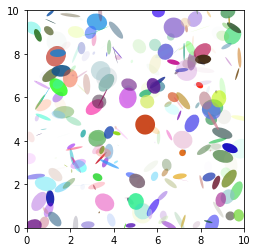

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

45.0 50.0 21.79449471770337 0.5235987755982988


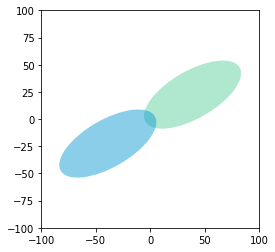

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
theta0deg=theta0*180/math.pi
signs=[1,-1]
ells = [Ellipse(xy=[focus*signi*np.cos(theta0),focus*signi*np.sin(theta0)],
                width=2*rad0, height=2*b,
                angle=theta0deg)
                for signi in signs]
                    

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(-2*rad0,2*rad0)
ax.set_ylim(-2*rad0, 2*rad0)

print(focus, rad0,b,theta0)
plt.show()